# Sparse and Non Negative Shallow Auto Encoder without AMD
* Sparsity Regularizer : KL Divergence (KLdivSum), applied to the activation.
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: Linear
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.01, 0.05, 0.1, 0.2
* Sparsity weight: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5



In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from nonNegSparseShallowAE import Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [3]:
results = pd.read_csv("../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08results")
results

Unnamed: 0  sparsity_objective  sparsity_weight  test_error  test_kl_loss  \
0            0                0.01           0.0001    0.016257      0.001092   
1            1                0.05           0.0001    0.012895      0.001037   
2            2                0.10           0.0001    0.010651      0.000784   
3            3                0.20           0.0001    0.009607      0.000305   
4            4                0.01           0.0005    0.018964      0.002503   
5            5                0.05           0.0005    0.015114      0.001759   
6            6                0.10           0.0005    0.012017      0.001007   
7            7                0.20           0.0005    0.010091      0.000301   
8            8                0.01           0.0010    0.020786      0.003148   
9            9                0.05           0.0010    0.016292      0.001899   
10          10                0.10           0.0010    0.012935      0.000896   
11          11                0.20           0.0010    0.010167      0.000248   
12          12                0.01           0.0050    0.031452      0.003641   
13          13                0.05           0.0050    0.018045      0.001418   
14          14                0.10           0.0050    0.013998      0.000565   
15          15                0.20           0.0050    0.010462      0.000393   
16          16                0.01           0.0100    0.039890      0.006306   
17          17                0.05           0.0100    0.018938      0.001320   
18          18                0.10           0.0100    0.014382      0.000706   
19          19                0.20           0.0100    0.010254      0.000646   
20          20                0.01           0.0500    0.085191      0.001027   
21          21                0.05           0.0500    0.022840      0.002505   
22          22                0.10           0.0500    0.015900      0.002097   
23          23                0.20           0.0500    0.010885      0.002772   
24          24                0.01           0.1000    0.086644      0.000642   
25          25                0.05           0.1000    0.026039      0.002932   
26          26                0.10           0.1000    0.016945      0.004452   
27          27                0.20           0.1000    0.012972      0.006511   
28          28                0.01           0.5000    0.086643      0.000706   
29          29                0.05           0.5000    0.086642      0.001426   
30          30                0.10           0.5000    0.030764      0.049184   
31          31                0.20           0.5000    0.020575      0.056634   

    test_max_approx_error_toOriginal_dilatation  \
0                                      0.573428   
1                                      0.983822   
2                                      1.482944   
3                                      1.981358   
4                                      0.198901   
5                                      0.341315   
6                                      0.656419   
7                                      1.352958   
8                                      0.106506   
9                                      0.220323   
10                                     0.453334   
11                                     1.172928   
12                                     0.035047   
13                                     0.073364   
14                                     0.251418   
15                                     1.068228   
16                                     0.045578   
17                                     0.062621   
18                                     0.244672   
19                                     1.090207   
20                                     0.108356   
21                                     0.062650   
22                                     0.248599   
23                                     1.198796   
24                                     0.110664   
25  

In [4]:
max_values = results.max(axis=0)
max_idx = results.idxmax()
min_values = results.min(axis=0)
min_idx = results.idxmin()
median_values = results.median()
std_values = results.std()
sparsity_objectives = results['sparsity_objective']
sparsity_weights = results['sparsity_weight']

In [5]:

print('***********************Maximum values**********************')
print(max_values[1:])
print('\n')
print('***********************Minimum values**********************')
print(min_values[1:])
print('\n')
print('***********************Median values**********************')
print(median_values[1:])


***********************Maximum values**********************
sparsity_objective                                 0.200000
sparsity_weight                                    0.500000
test_error                                         0.086644
test_kl_loss                                       0.056634
test_max_approx_error_toOriginal_dilatation        1.981358
test_max_approx_error_toRec_dilatation             2.023399
test_sparsity                                      0.791618
training_error                                     0.087013
training_kl_loss                                   0.056833
training_max_approx_error_toOriginal_dilatation    1.978715
training_max_approx_error_toRec_dilatation         2.020376
training_sparsity                                  0.788276
dtype: float64


***********************Minimum values**********************
sparsity_objective                                 0.010000
sparsity_weight                                    0.000100
test_error             

In [6]:
print('\033[1m'+'Lowest error: '+'\033[0m' , round(min_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_error']], ', sparsity_weight=', sparsity_weights[min_idx['test_error']], '\n')
print('\033[1m'+'Highest error: '+'\033[0m', round(max_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_error']], ', sparsity_weight=', sparsity_weights[max_idx['test_error']], '\n')
print('\033[1m'+'Least sparse: '+'\033[0m' , round(min_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[min_idx['test_sparsity']], '\n')
print('\033[1m'+'Most sparse: '+'\033[0m', round(max_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[max_idx['test_sparsity']], '\n')
print('\033[1m'+'Lowest Max-approximation error to dilatation of the originals: '+'\033[0m' , round(min_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Highest  Max-approximation error to dilatation of the originals: '+'\033[0m', round(max_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Lowest KL-loss: '+'\033[0m' , round(min_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[min_idx['test_kl_loss']], '\n')
print('\033[1m'+'Highest KL-loss: '+'\033[0m', round(max_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[max_idx['test_kl_loss']], '\n')
print('\033[1m'+'Lowest max-approximation error to dilatation of the reconstruction: '+'\033[0m' , round(min_values['test_max_approx_error_toRec_dilatation'], 5), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toRec_dilatation']], '\n')
print('\033[1m'+'Highest max-approximation error to dilatation of the reconstruction: '+'\033[0m', round(max_values['test_max_approx_error_toRec_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toRec_dilatation']], '\n')


Lowest error:  0.0096 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Highest error:  0.0866 , sparsity_objective= 0.01 , sparsity_weight= 0.1 

Least sparse:  0.0026 , sparsity_objective= 0.05 , sparsity_weight= 0.5 

Most sparse:  0.7916 , sparsity_objective= 0.01 , sparsity_weight= 0.01 

Lowest Max-approximation error to dilatation of the originals:  0.035 , sparsity_objective= 0.01 , sparsity_weight= 0.005 

Highest  Max-approximation error to dilatation of the originals:  1.9814 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Lowest KL-loss:  0.0002 , sparsity_objective= 0.2 , sparsity_weight= 0.001 

Highest KL-loss:  0.0566 , sparsity_objective= 0.2 , sparsity_weight= 0.5 

Lowest max-approximation error to dilatation of the reconstruction:  3e-05 , sparsity_objective= 0.01 , sparsity_weight= 0.1 

Highest max-approximation error to dilatation of the reconstruction:  2.0234 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 



Nb:
* Lowest error reached with weakest sparsity constraints.
* Highest error **Not** reached with strongest sparsity constraints (almost).
* The lowest sparsity measuer is not significant, as if all coefficients are very close to zero but are similar, then the sparsity measure from Hoyer 2004 is close to 0.
* Highest max-approximation error to dilatation of the originals and of the reconstruction reached with the weakest sparsity constraint.

In [3]:
sparsity_objectives = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_test_errors_dim100.npy')
train_mse = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_training_errors_dim100.npy')
test_kl_loss = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_08_training_sparsity_dim100.npy')

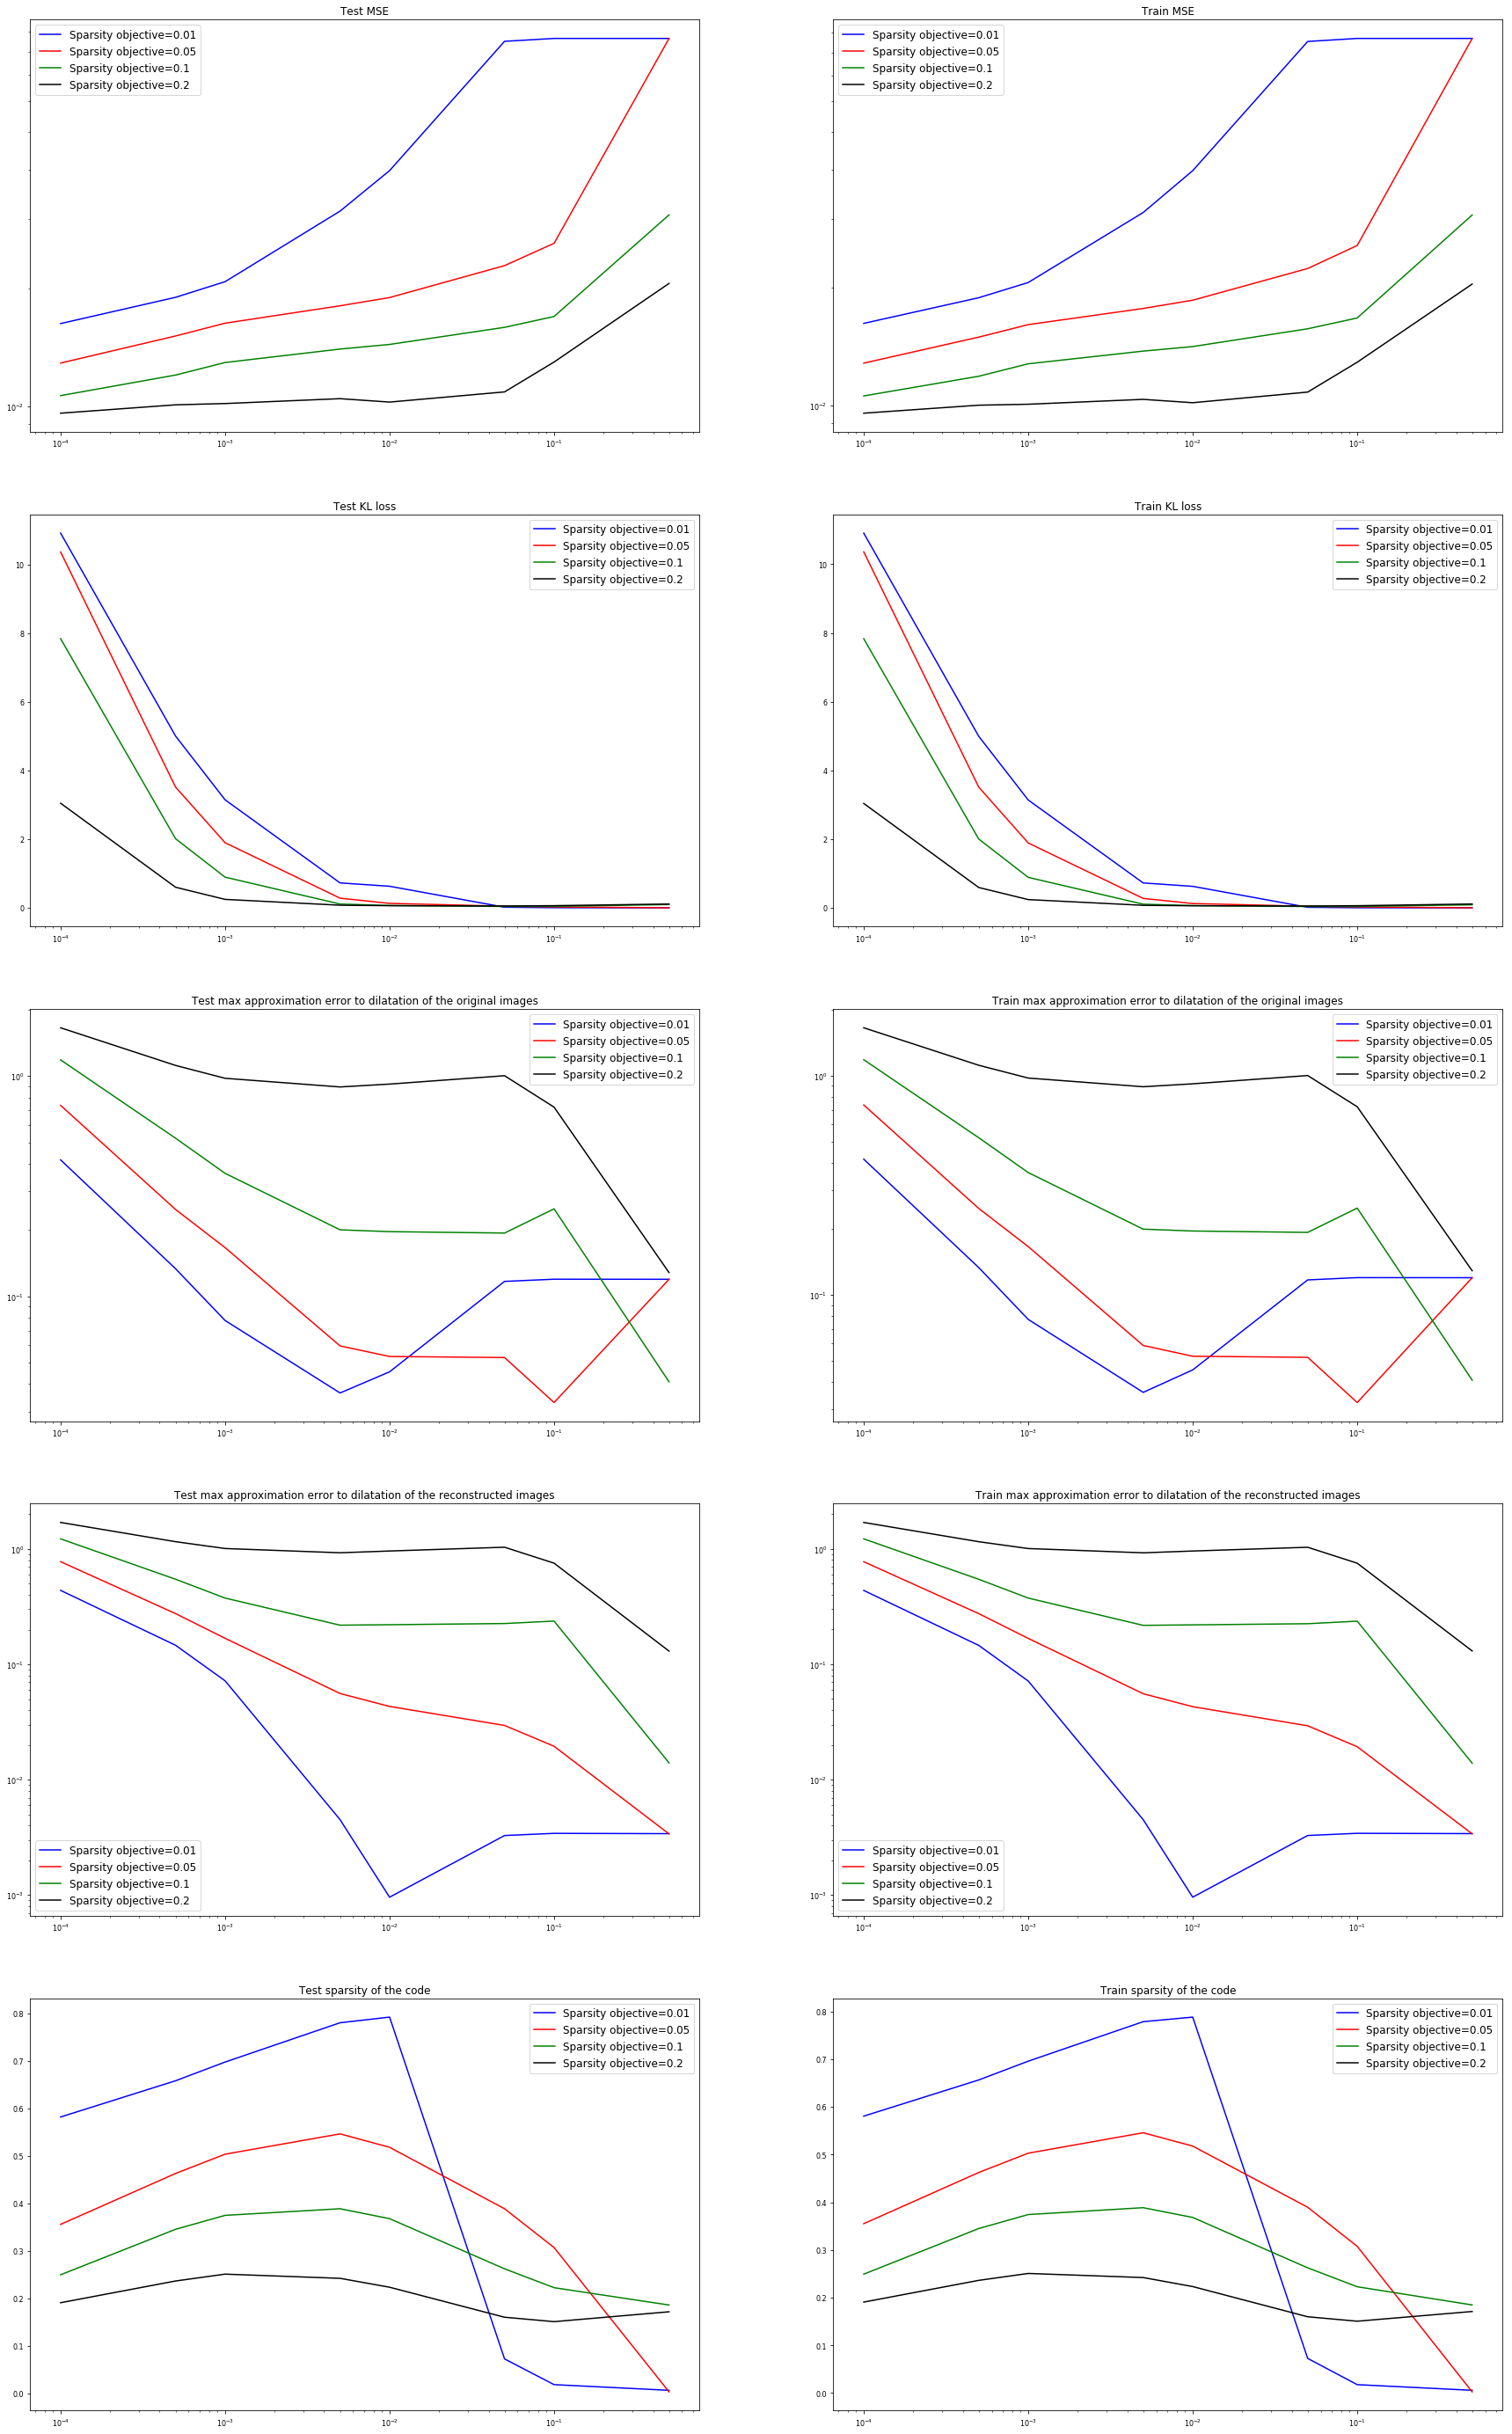

In [14]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, train_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.plot(sparsity_weights, train_mse[:,2], 'g')
ax.plot(sparsity_weights, train_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

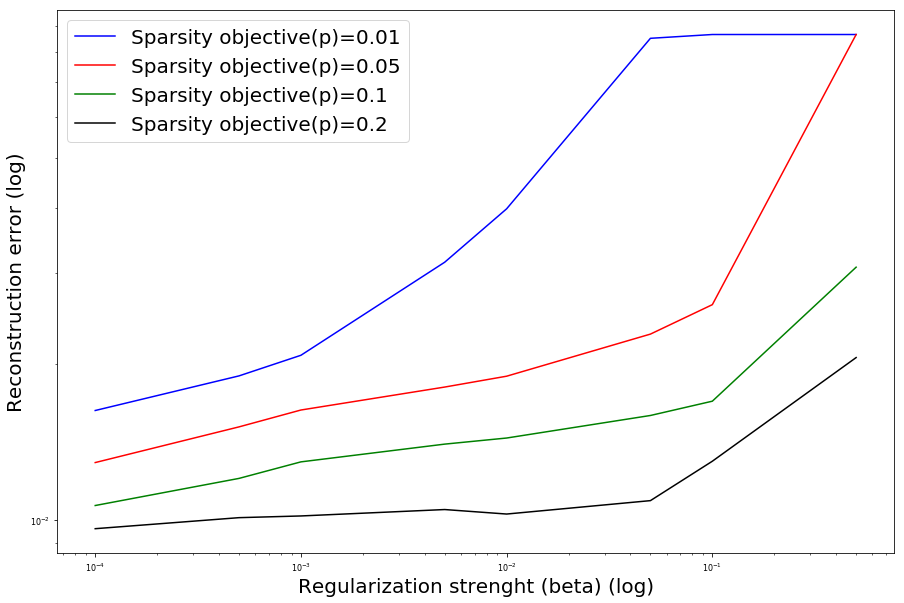

In [34]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_mse[:,0], 'b')
plt.plot(sparsity_weights, test_mse[:,1], 'r')
plt.plot(sparsity_weights, test_mse[:,2], 'g')
plt.plot(sparsity_weights, test_mse[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Reconstruction error (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

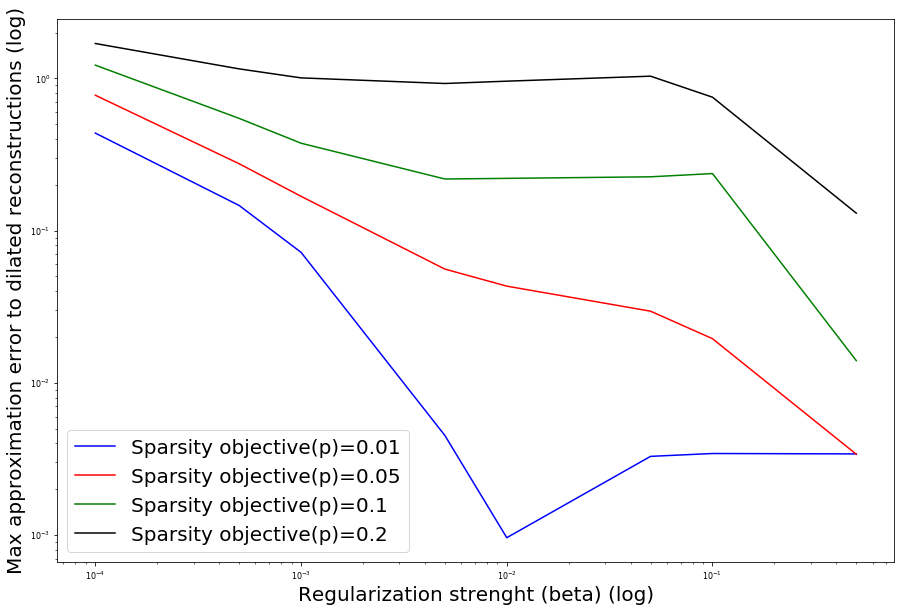

In [36]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilated reconstructions (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

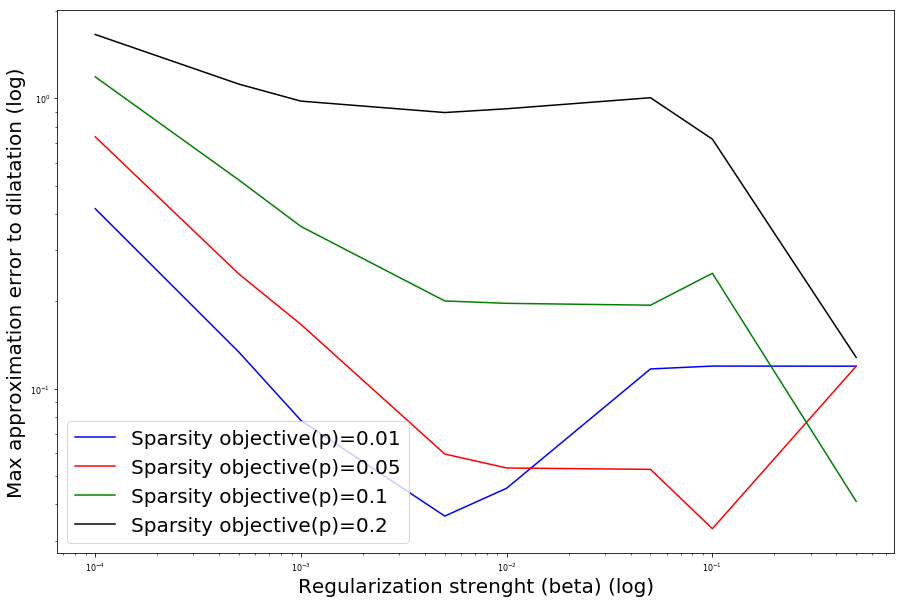

In [37]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilatation (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

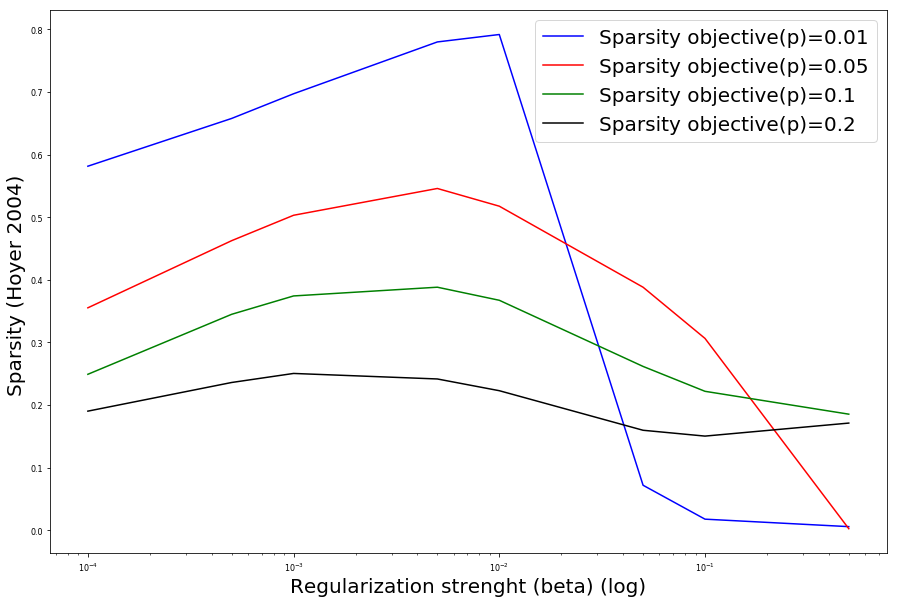

In [38]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_sparsity[:,0], 'b')
plt.plot(sparsity_weights, test_sparsity[:,1], 'r')
plt.plot(sparsity_weights, test_sparsity[:,2], 'g')
plt.plot(sparsity_weights, test_sparsity[:,3], 'k')
plt.xscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Sparsity (Hoyer 2004) ')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

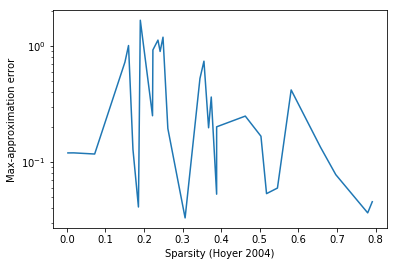

In [54]:
flat_sprs = test_sparsity.flatten()
idx_sort = flat_sprs.argsort()
sorted_sparse = flat_sprs[idx_sort]
sorted_maxapprox = test_max_approx_to_Original.flatten()[idx_sort]
plt.plot(sorted_sparse, sorted_maxapprox)
plt.yscale('log')
plt.xlabel('Sparsity (Hoyer 2004)')
plt.ylabel('Max-approximation error')
plt.show()

# 1. Sparsity_Objective = 0.01

## 1.1 Sparsity_weight = 0.0001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.016366513311862944


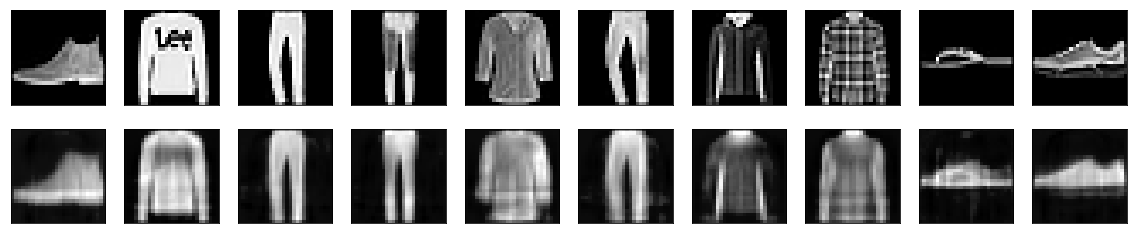

Histograms of the encodings - Sparsity (Hoyer):  0.5812769532203674


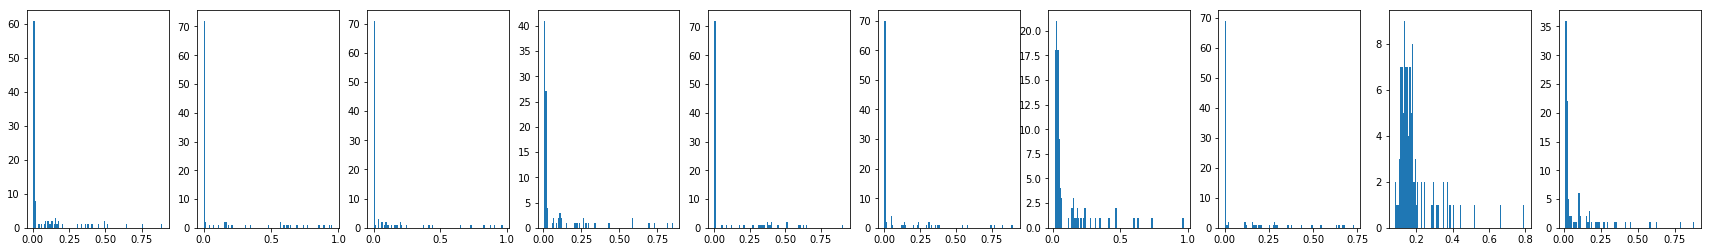

Atom images of the decoder


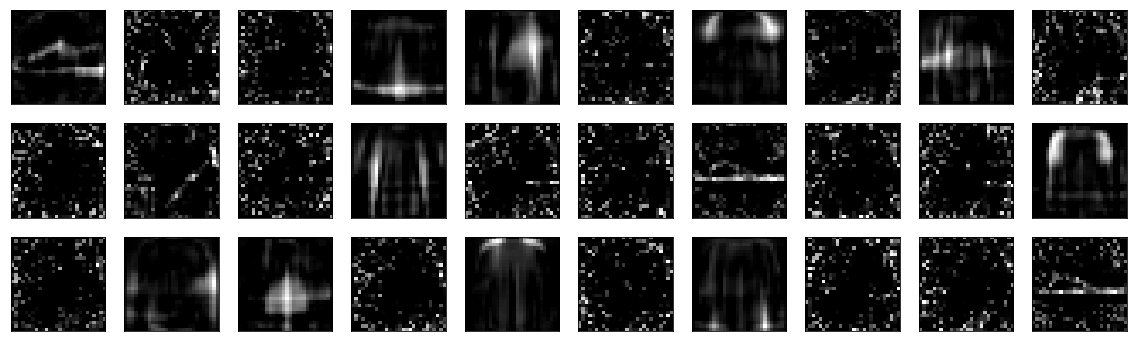

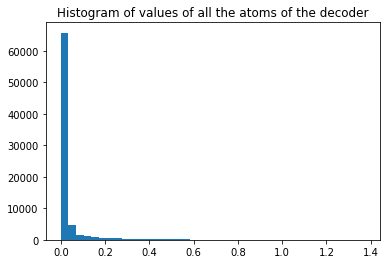

In [14]:
i = np.arange(8)[sparsity_weights==0.0001][0]
j = np.arange(4)[sparsity_objectives==0.01][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_0.0001_0.01_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


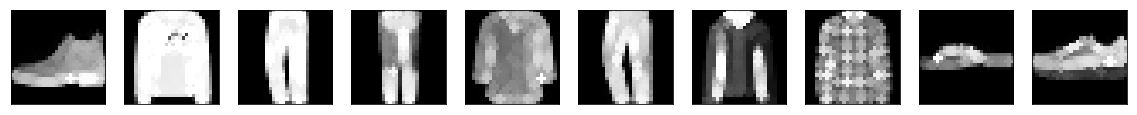

Dilatation of the reconstructions


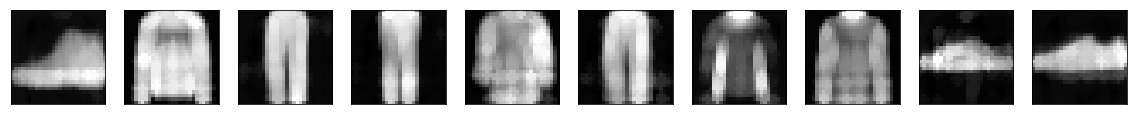

Original images and max-approximation to dilatation
Max-approx error to original:  0.5356065855979919  - Max-approx error to reconstruction:  0.5847213834762574


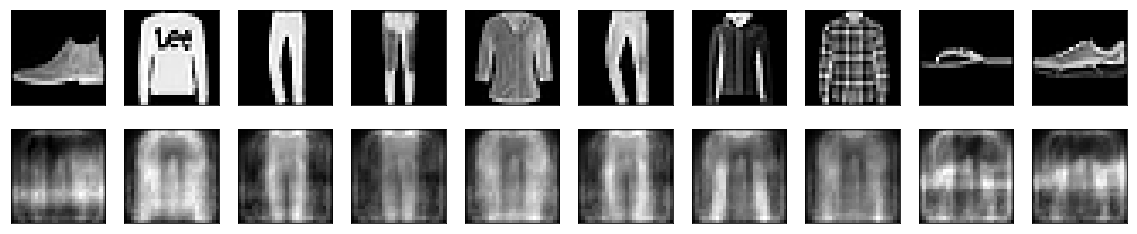

Dilated of the atom images of the decoder


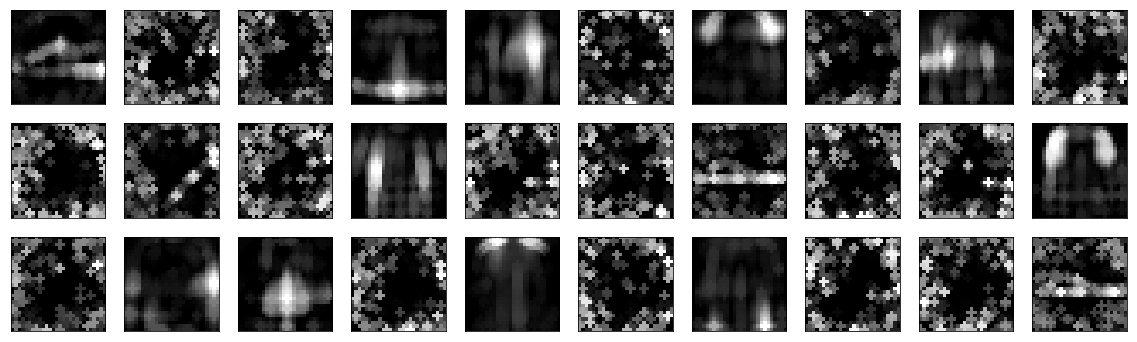

In [15]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.0005 (sp_o = 0.01)

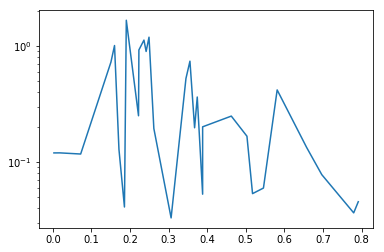

In [51]:
plt.plot(sorted_sparse, sorted_maxapprox)
plt.yscale('log')
plt.show()

Original images and reconstructions - Reconstruction error:  0.01828599081039429


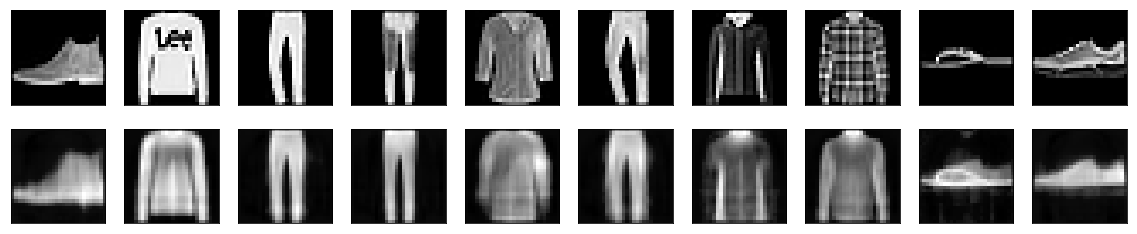

Histograms of the encodings - Sparsity (Hoyer):  0.6489828824996948


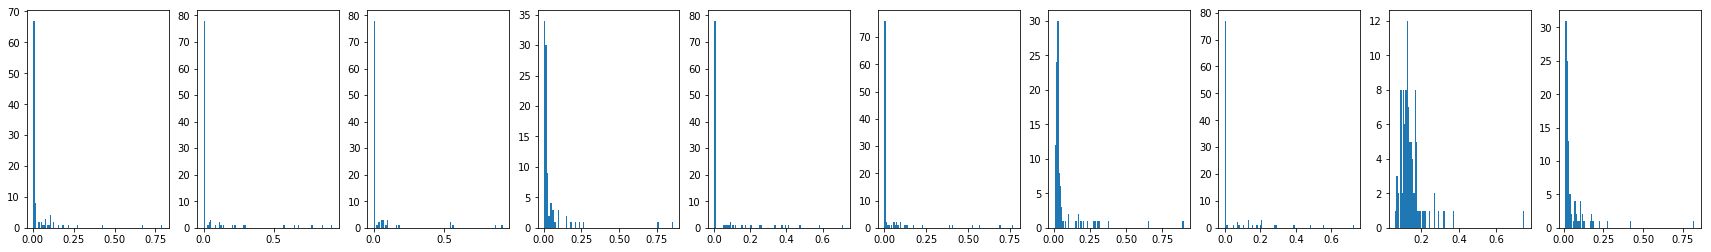

Atom images of the decoder


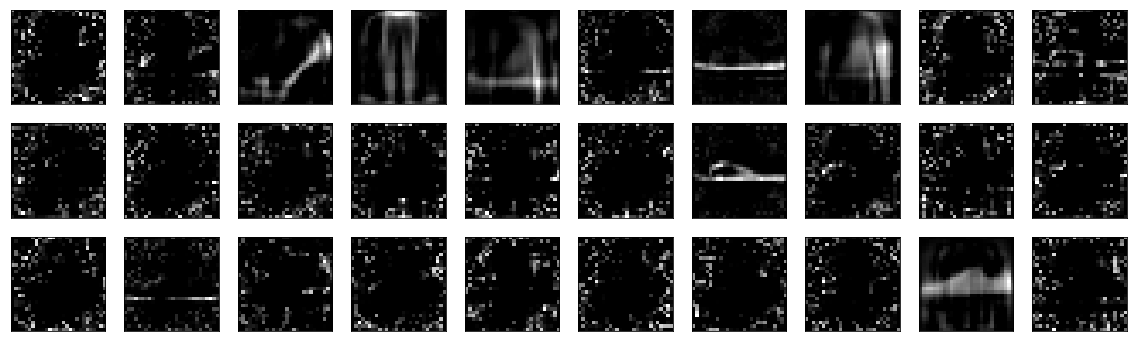

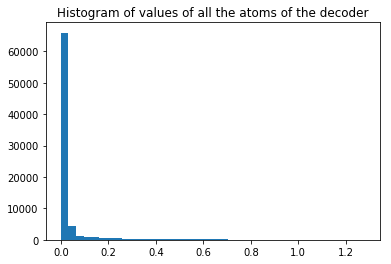

In [16]:
sp_o = 0.01
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


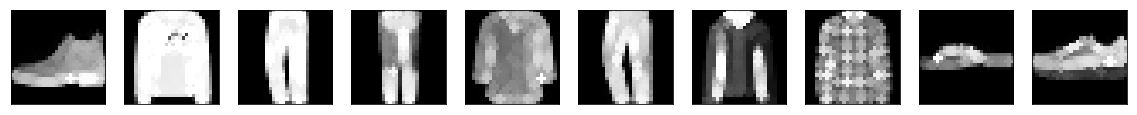

Dilatation of the reconstructions


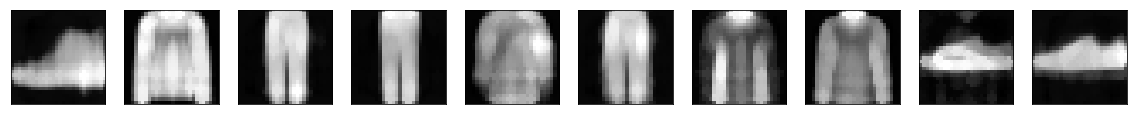

Original images and max-approximation to dilatation
Max-approx error to original:  0.21589301652908324  - Max-approx error to reconstruction:  0.22557576451301575


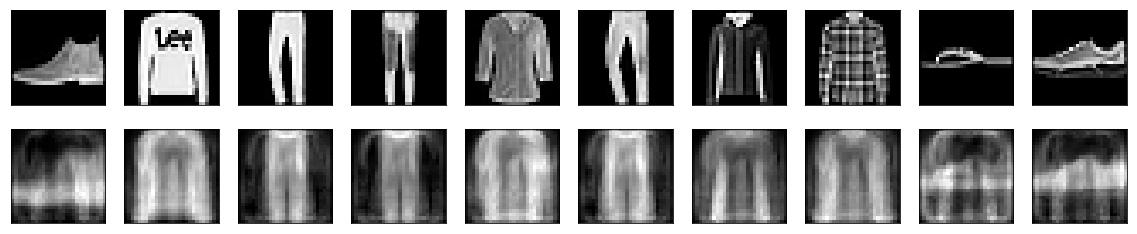

Dilated of the atom images of the decoder


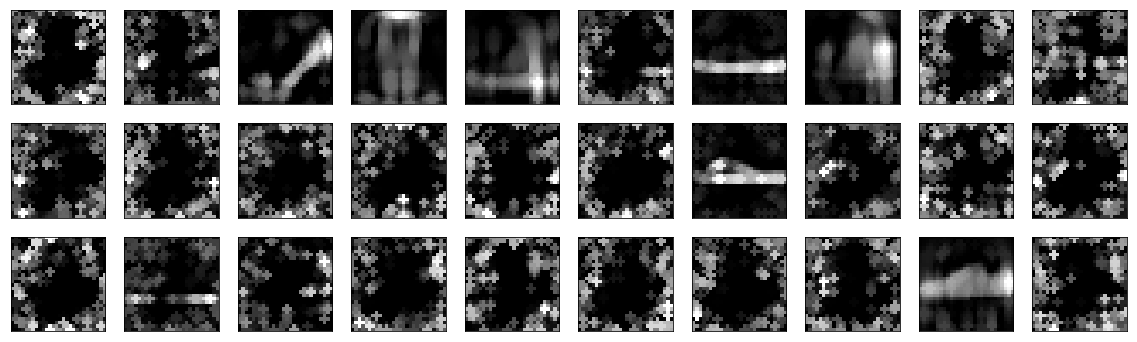

In [17]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 0.001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.021309411349892615


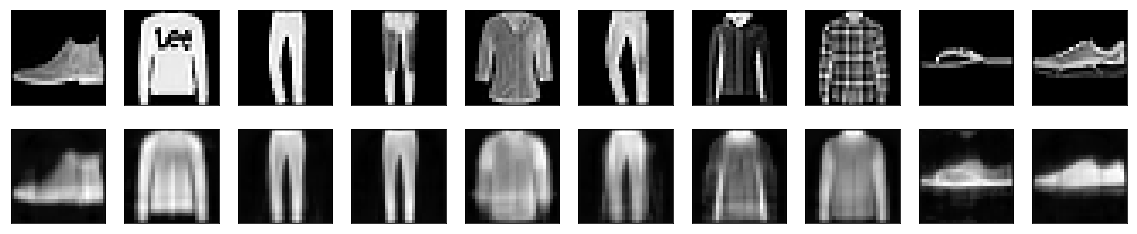

Histograms of the encodings - Sparsity (Hoyer):  0.7082303762435913


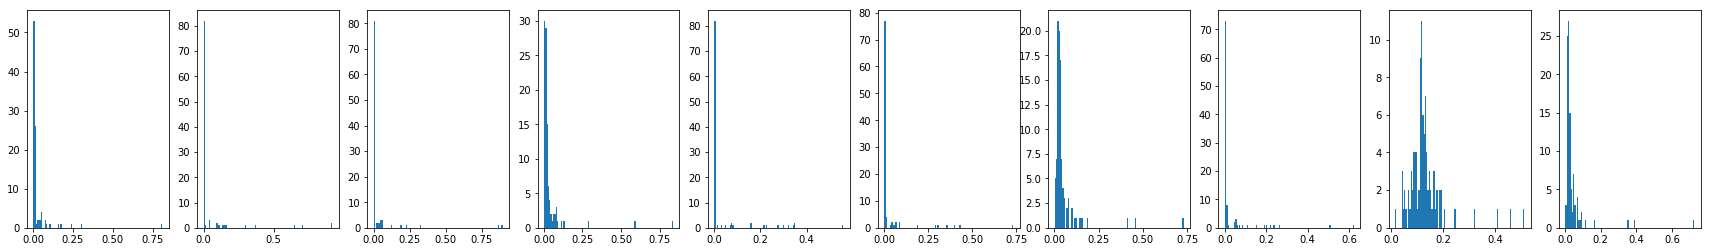

Atom images of the decoder


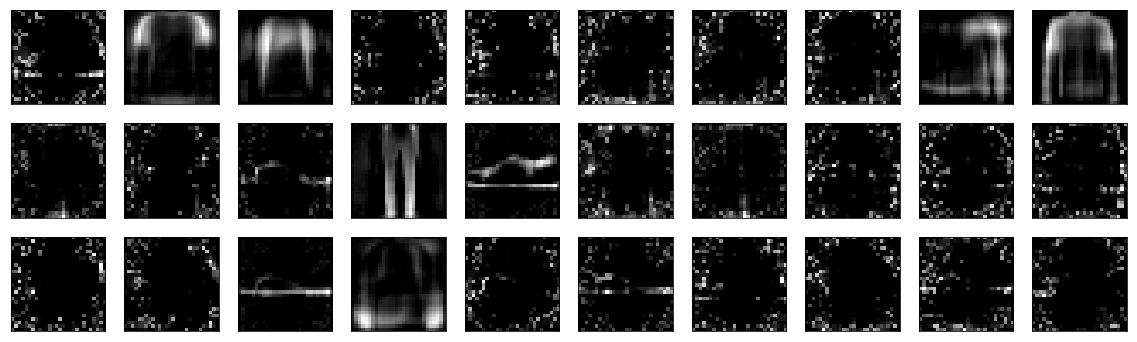

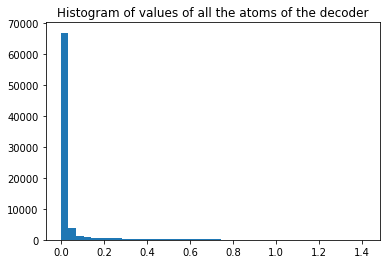

In [18]:
sp_o = 0.01
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

In [9]:
test_mse.shape

(8, 4)

Dilatation of the original images


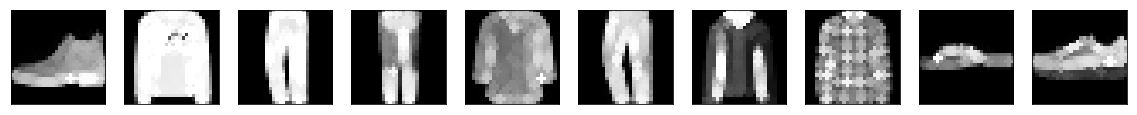

Dilatation of the reconstructions


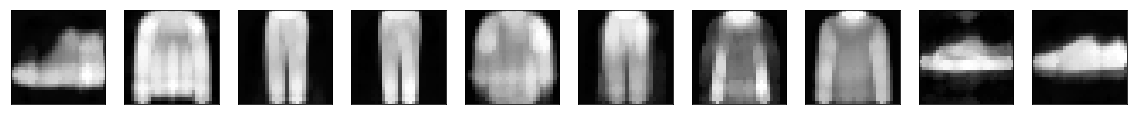

Original images and max-approximation to dilatation
Max-approx error to original:  0.10908848938941955  - Max-approx error to reconstruction:  0.0986226412653923


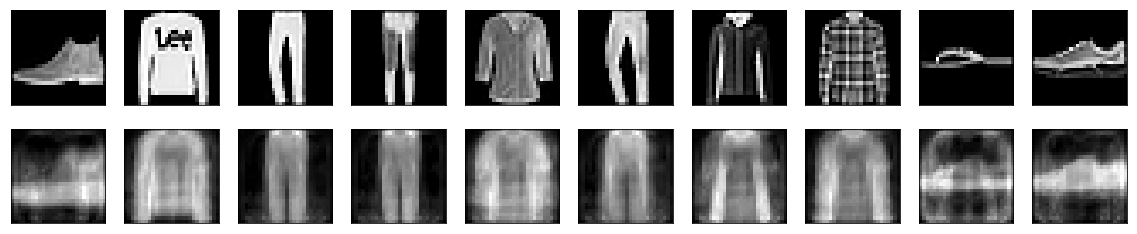

Dilated of the atom images of the decoder


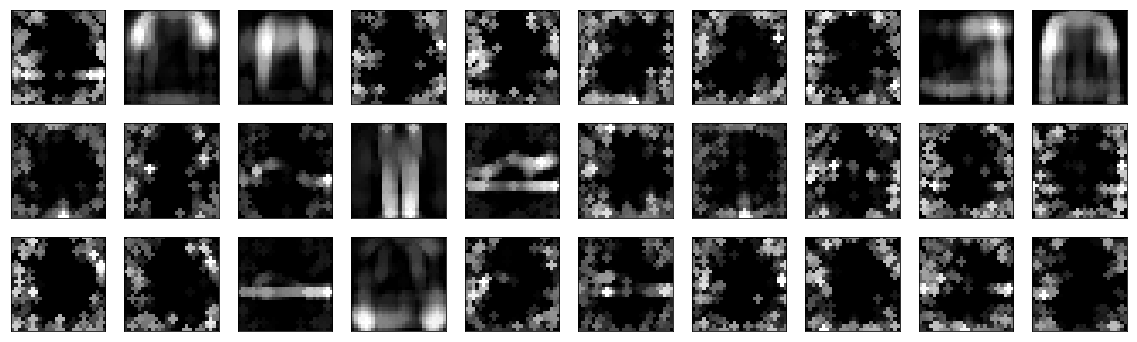

In [19]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.4 Sparsity_weight = 0.005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.03145198769569397


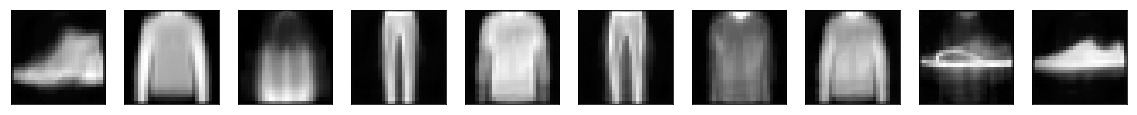

Histograms of the encodings - Sparsity (Hoyer):  0.7797566652297974


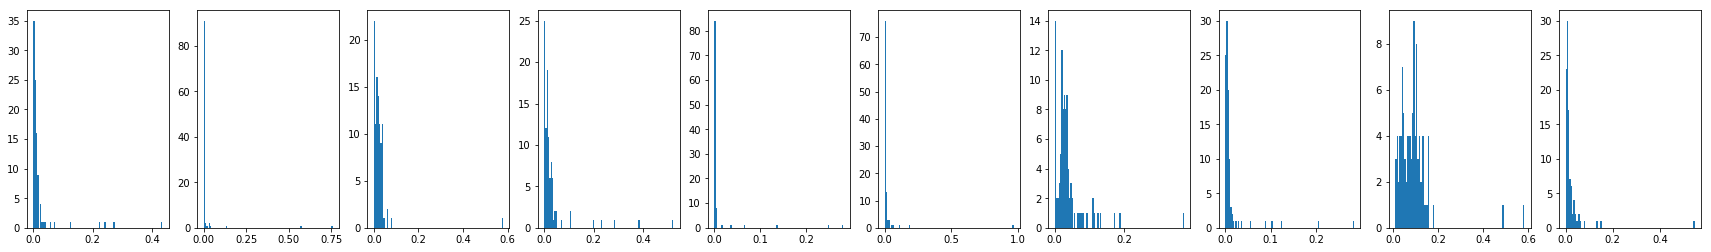

Atom images of the decoder


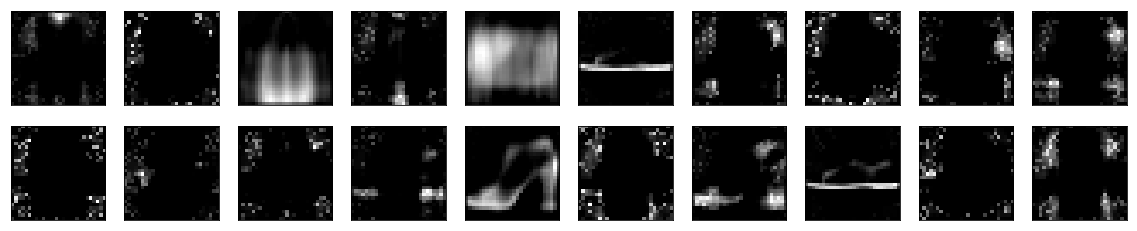

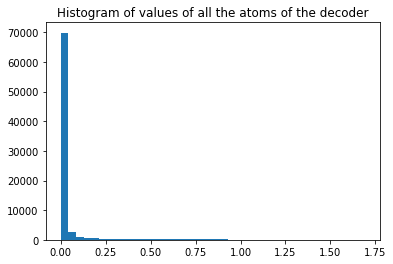

In [9]:
sp_o = 0.01
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


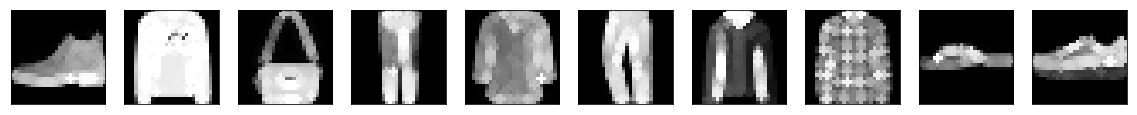

Dilatation of the reconstructions


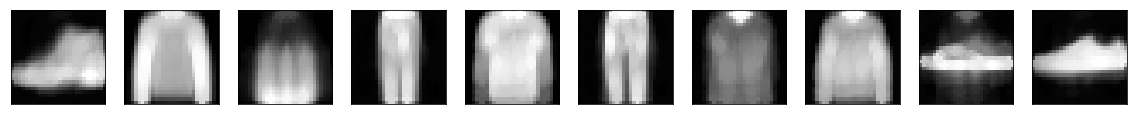

Original images and max-approximation to dilatation
Max-approx error to original:  0.03646732341647148  - Max-approx error to reconstruction:  0.0045110502369701865


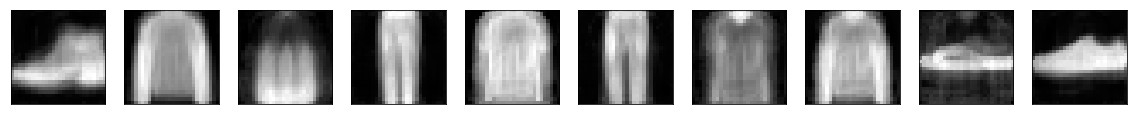

Dilated of the atom images of the decoder


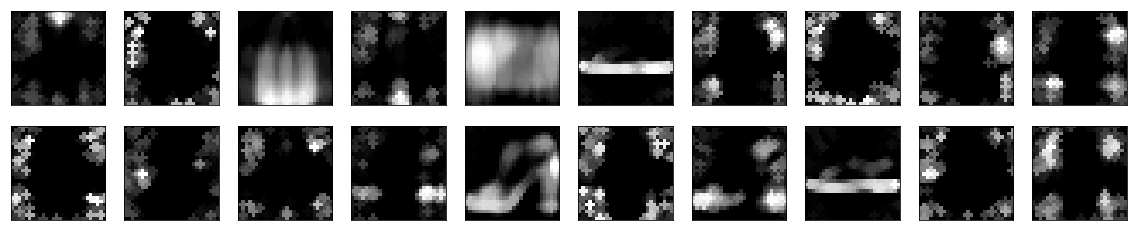

In [10]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

In [5]:
AE.best_linearSVM_classification_score(x_test, y_test, nb_values_C=20)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.20691380811147891, total=   1.2s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   1.2s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   1.5s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   1.2s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   1.3s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   1.3s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   1.3s
[CV] C=0.37926901907322497 ...........................................
[CV] .

[CV] .............................. C=7.847599703514606, total=   2.1s
[CV] C=7.847599703514606 .............................................
[CV] .............................. C=7.847599703514606, total=   2.0s
[CV] C=7.847599703514606 .............................................
[CV] .............................. C=7.847599703514606, total=   2.0s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   2.6s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   2.4s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   2.6s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   2.4s
[CV] C=14.38449888287663 .............................................
[CV] .

[CV] ............................. C=297.63514416313194, total=   7.7s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   9.4s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   7.7s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=  13.5s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=  11.1s
[CV] C=545.5594781168514 .............................................
[CV] .............................. C=545.5594781168514, total=  10.2s
[CV] C=545.5594781168514 .............................................
[CV] .............................. C=545.5594781168514, total=  13.9s
[CV] C=545.5594781168514 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.6min finished


(0.7555, {'C': 1000.0})

In [6]:
AE.best_linearSVM_classification_score(x_test, y_test, nb_values_C=20)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.2s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.20691380811147891, total=   2.1s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.8s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.4s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.2s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.1s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.2s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.1s
[CV] C=0.37926901907322497 ...........................................
[CV] .

[CV] .............................. C=7.847599703514606, total=   3.8s
[CV] C=7.847599703514606 .............................................
[CV] .............................. C=7.847599703514606, total=   4.1s
[CV] C=7.847599703514606 .............................................
[CV] .............................. C=7.847599703514606, total=   3.9s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   6.3s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   5.7s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   4.6s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   4.6s
[CV] C=14.38449888287663 .............................................
[CV] .

[CV] ............................. C=297.63514416313194, total=   9.4s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   8.2s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   8.6s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   9.4s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   9.6s
[CV] C=545.5594781168514 .............................................
[CV] .............................. C=545.5594781168514, total=  20.2s
[CV] C=545.5594781168514 .............................................
[CV] .............................. C=545.5594781168514, total=  13.4s
[CV] C=545.5594781168514 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 16.2min finished


(0.76, {'C': 1000.0})

In [7]:
AE.best_linearSVM_classification_score(x_test, y_test, nb_values_C=20)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.5s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.6s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.20691380811147891, total=   2.1s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.4s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   3.3s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   3.2s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.6s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.4s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.5s
[CV] C=0.37926901907322497 ...........................................
[CV] .

[CV] .............................. C=7.847599703514606, total=   3.8s
[CV] C=7.847599703514606 .............................................
[CV] .............................. C=7.847599703514606, total=   4.0s
[CV] C=7.847599703514606 .............................................
[CV] .............................. C=7.847599703514606, total=   3.9s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   4.2s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   5.4s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   4.3s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   4.4s
[CV] C=14.38449888287663 .............................................
[CV] .

[CV] ............................. C=297.63514416313194, total=   6.7s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   8.1s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=  10.3s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   8.9s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   8.1s
[CV] C=545.5594781168514 .............................................
[CV] .............................. C=545.5594781168514, total=  12.2s
[CV] C=545.5594781168514 .............................................
[CV] .............................. C=545.5594781168514, total=  11.7s
[CV] C=545.5594781168514 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 14.9min finished


(0.7584000000000001, {'C': 1000.0})

In [8]:
AE.best_linearSVM_classification_score(x_test, y_test, nb_values_C=20)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.4s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   2.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.6s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.6s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.20691380811147891, total=   1.9s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.1s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.1s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.1s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.0s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.5s
[CV] C=0.37926901907322497 ...........................................
[CV] ............................ C=0.37926901907322497, total=   2.4s
[CV] C=0.37926901907322497 ...........................................
[CV] .

[CV] .............................. C=7.847599703514606, total=   3.8s
[CV] C=7.847599703514606 .............................................
[CV] .............................. C=7.847599703514606, total=   4.1s
[CV] C=7.847599703514606 .............................................
[CV] .............................. C=7.847599703514606, total=   4.1s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   5.1s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   3.8s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   4.4s
[CV] C=14.38449888287663 .............................................
[CV] .............................. C=14.38449888287663, total=   4.0s
[CV] C=14.38449888287663 .............................................
[CV] .

[CV] ............................. C=297.63514416313194, total=   6.5s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   7.6s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   8.3s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   7.2s
[CV] C=297.63514416313194 ............................................
[CV] ............................. C=297.63514416313194, total=   7.5s
[CV] C=545.5594781168514 .............................................
[CV] .............................. C=545.5594781168514, total=   8.5s
[CV] C=545.5594781168514 .............................................
[CV] .............................. C=545.5594781168514, total=   9.2s
[CV] C=545.5594781168514 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 15.1min finished


(0.7756000000000002, {'C': 1000.0})

In [11]:
AE.best_linearSVM_classification_score(x_test, y_test, nb_values_C=30)

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.2s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.03290344562312668, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.7s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.8s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.2s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.8s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.5s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.6s
[CV] C=0.04893900918477494 ...........................................
[CV] .

[CV] ............................ C=0.16102620275609392, total=   1.1s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.3s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.7s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.3s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.3s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.3s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.3s
[CV] C=0.2395026619987486 ............................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   1.4s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.5s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.4s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   2.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.4s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.5s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.7s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=3.856620421163472, total=   3.8s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   4.7s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   3.7s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   2.9s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.9s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   2.2s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   2.8s
[CV] C=5.736152510448681 .............................................
[CV] .

[CV] ............................. C=18.873918221350976, total=   3.7s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   6.1s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   5.8s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   4.3s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   3.0s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   3.9s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   3.8s
[CV] C=18.873918221350976 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   4.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   5.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   5.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   5.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   7.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   5.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   6.5s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................... C=452.035365636025, total=  22.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=  15.3s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   9.7s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=  10.8s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=  10.4s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=  11.8s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=  16.6s
[CV] C=452.035365636025 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 29.9min finished


(0.7672, 0.03504511378209521, {'C': 204.33597178569437})

## 1.5 Sparsity_weight = 0.01 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.038963184249401095


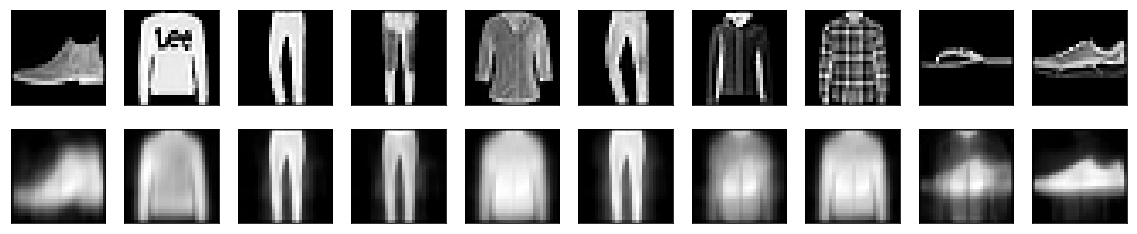

Histograms of the encodings - Sparsity (Hoyer):  0.768884003162384


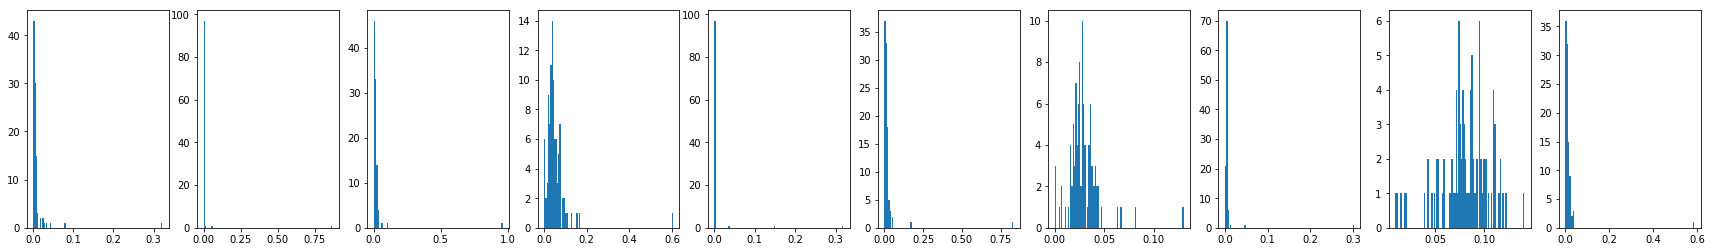

Atom images of the decoder


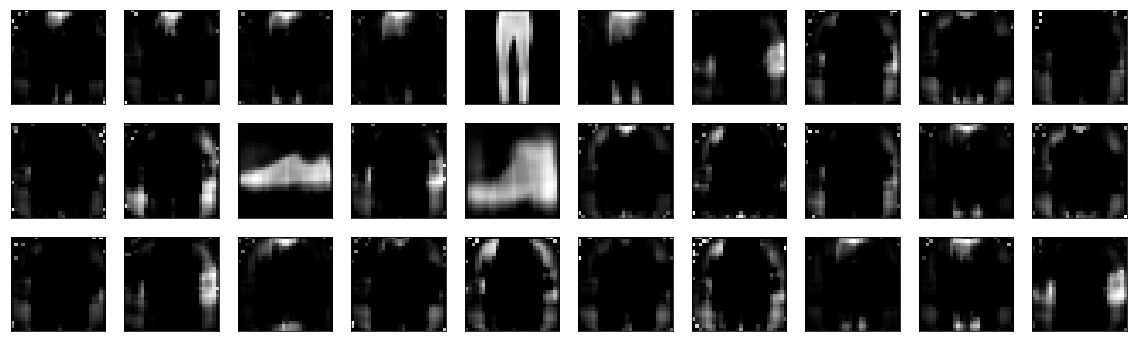

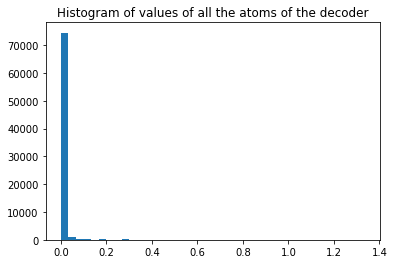

In [22]:
sp_o = 0.01
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


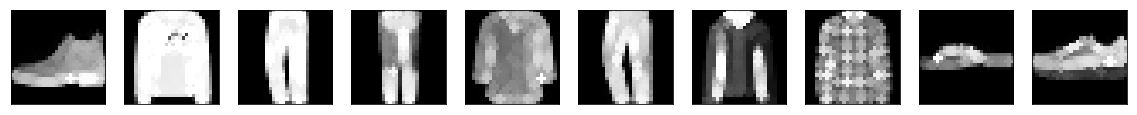

Dilatation of the reconstructions


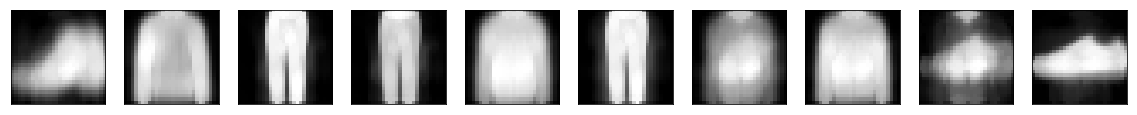

Original images and max-approximation to dilatation
Max-approx error to original:  0.0460025598526001  - Max-approx error to reconstruction:  0.003394167077168822


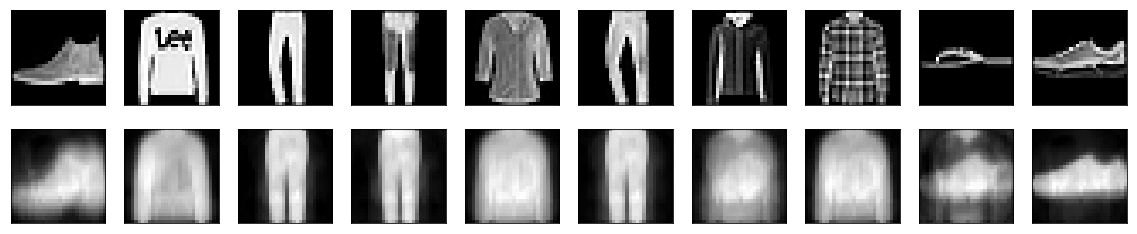

Dilated of the atom images of the decoder


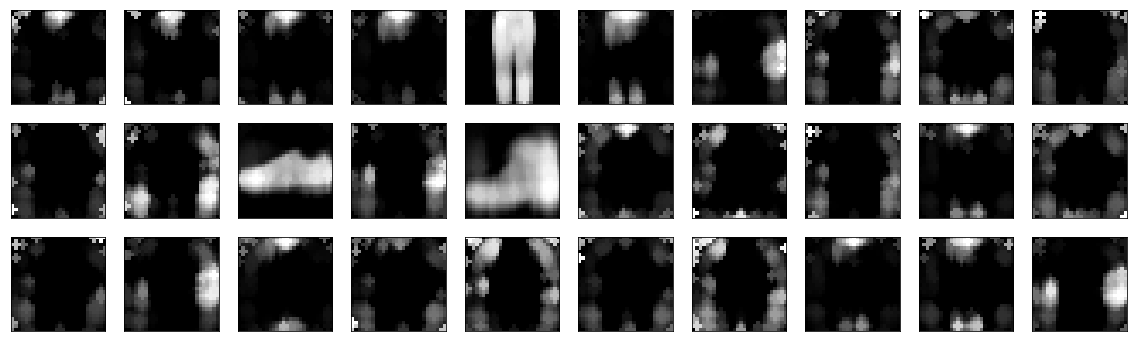

In [23]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.6 Sparsity_weight = 0.05 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.08650327532291413


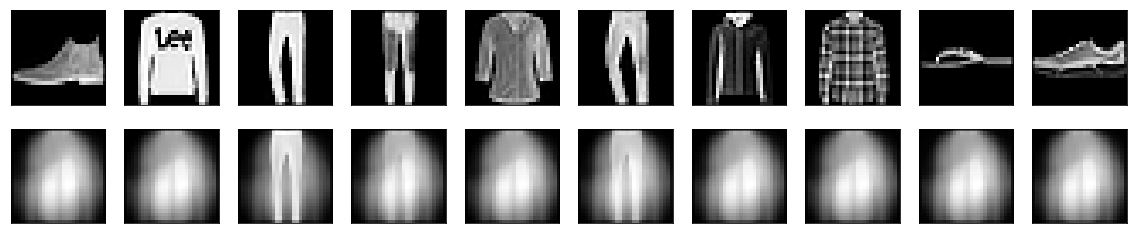

Histograms of the encodings - Sparsity (Hoyer):  0.04845685139298439


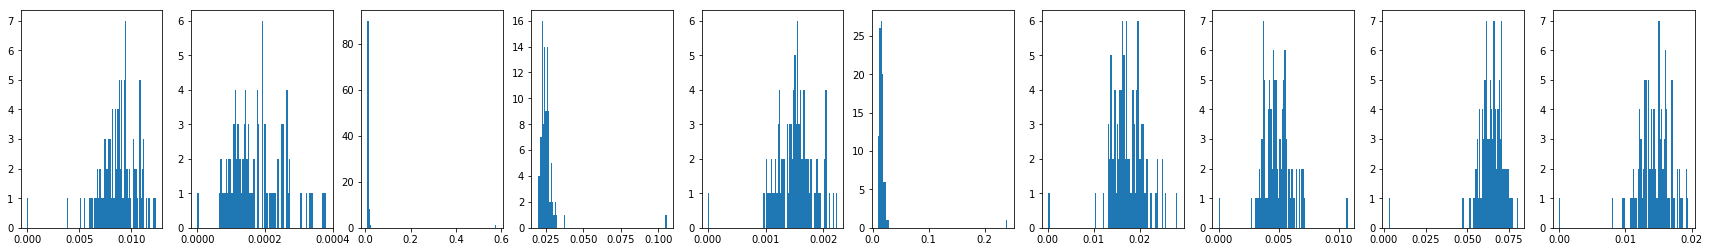

Atom images of the decoder


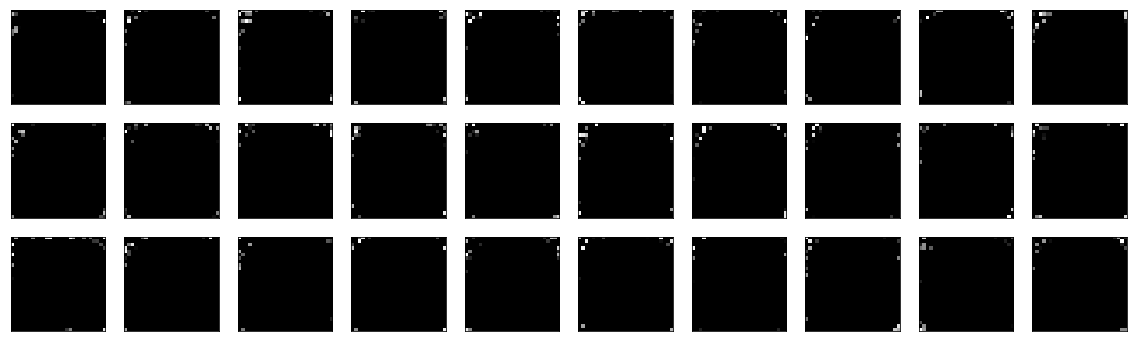

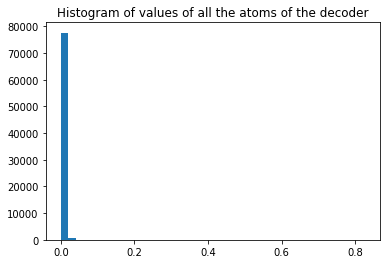

In [24]:
sp_o = 0.01
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


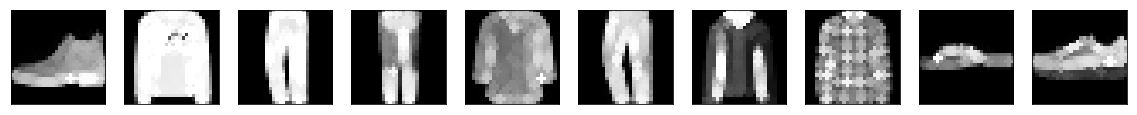

Dilatation of the reconstructions


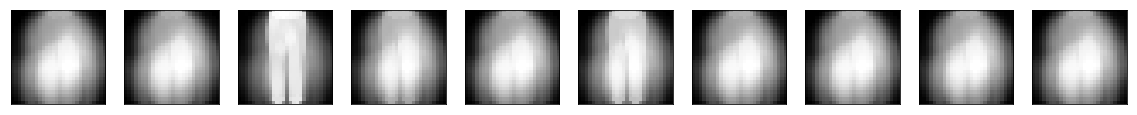

Original images and max-approximation to dilatation
Max-approx error to original:  0.11035568827390671  - Max-approx error to reconstruction:  2.754275358747691e-05


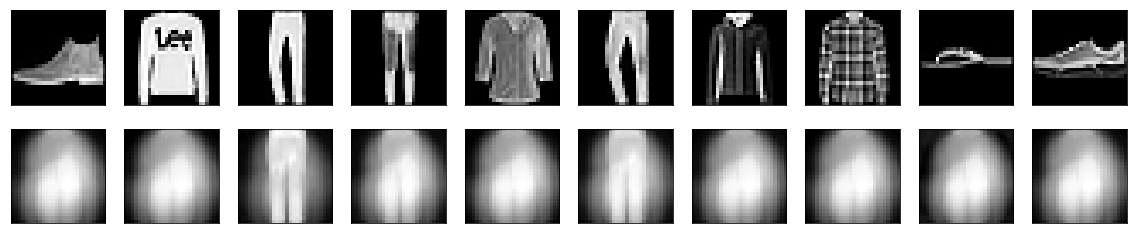

Dilated of the atom images of the decoder


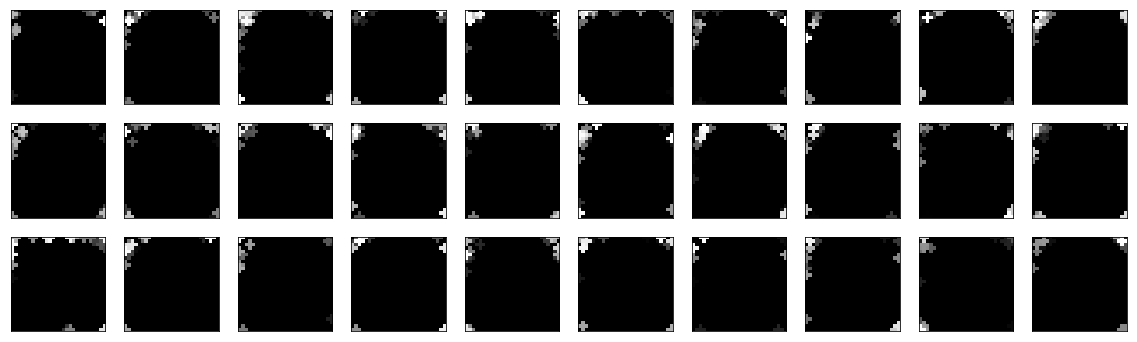

In [25]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.7 Sparsity_weight = 0.1 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.0


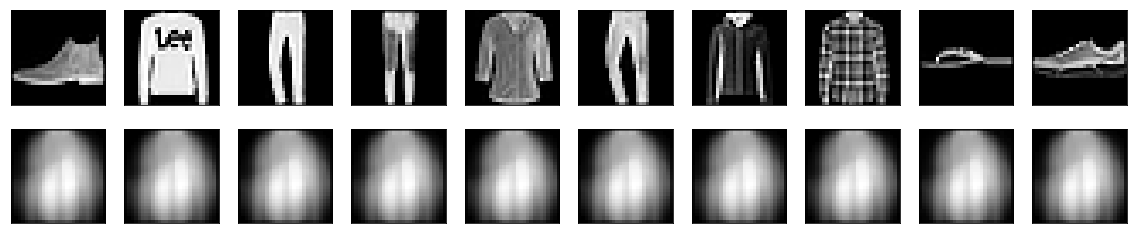

Histograms of the encodings - Sparsity (Hoyer):  0.0


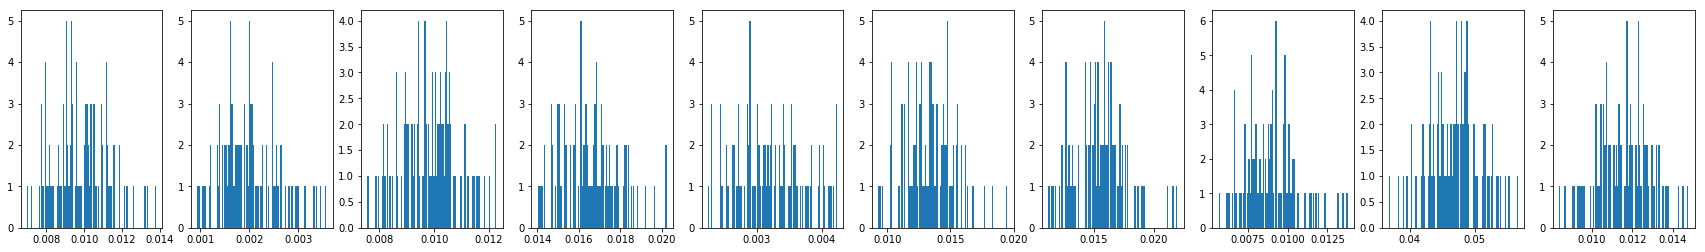

Atom images of the decoder


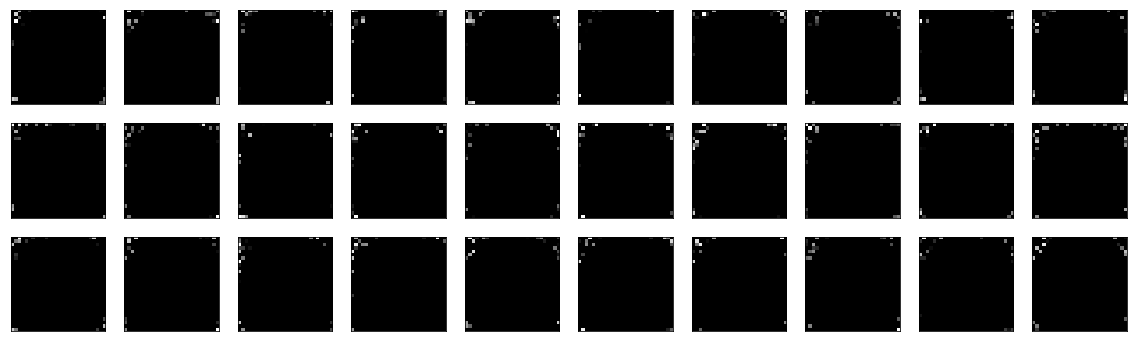

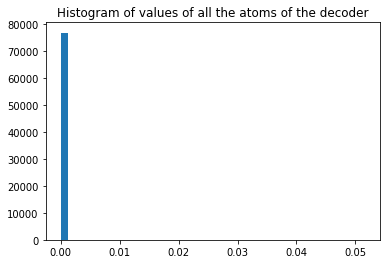

In [26]:
sp_o = 0.01
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


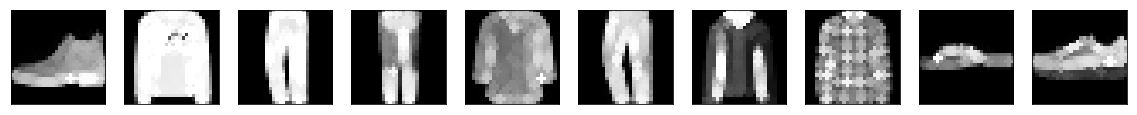

Dilatation of the reconstructions


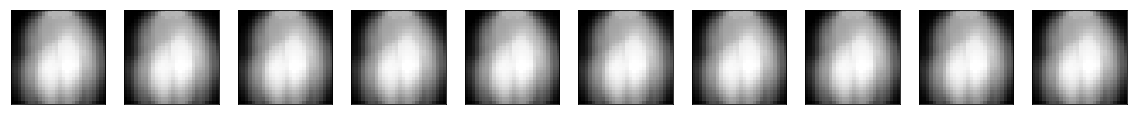

Original images and max-approximation to dilatation
Max-approx error to original:  0.0  - Max-approx error to reconstruction:  0.0


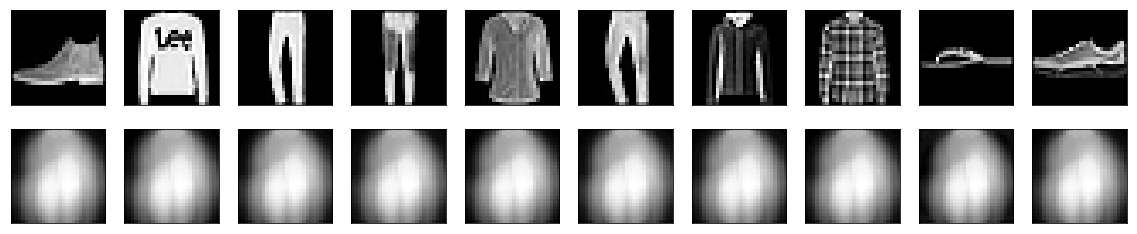

Dilated of the atom images of the decoder


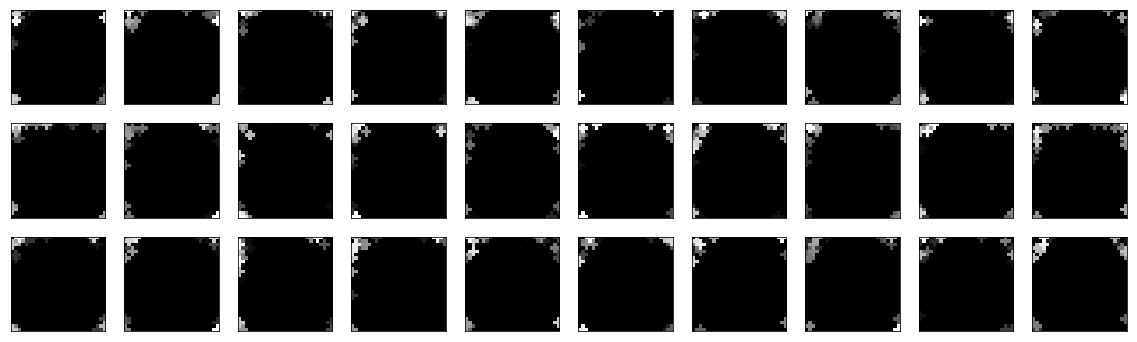

In [27]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.8 Sparsity_weight = 0.5 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.0


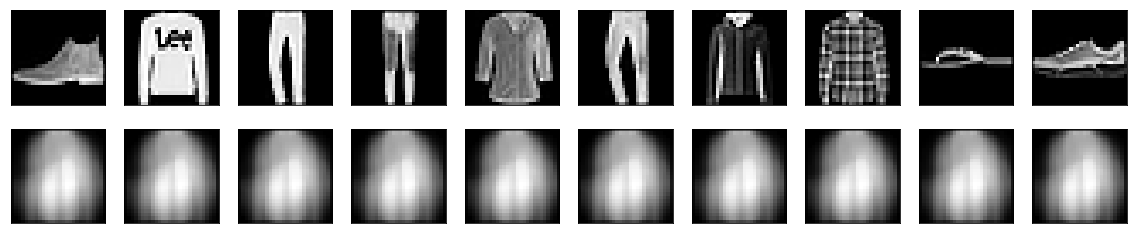

Histograms of the encodings - Sparsity (Hoyer):  0.0


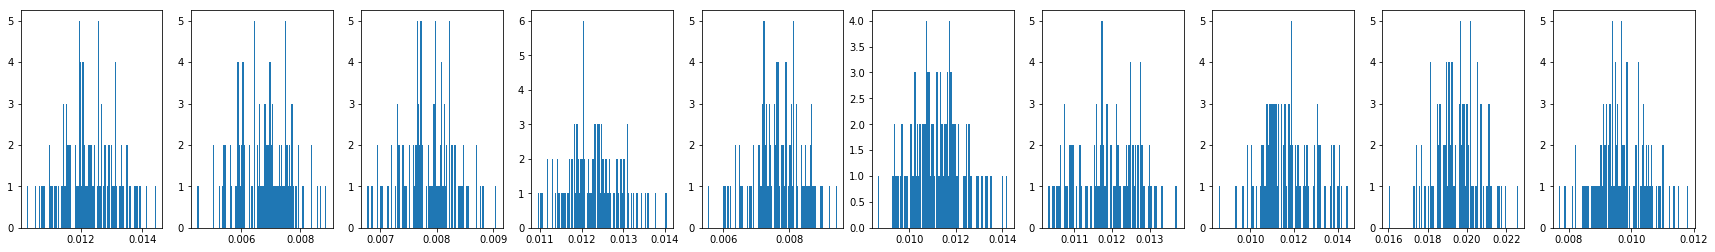

Atom images of the decoder


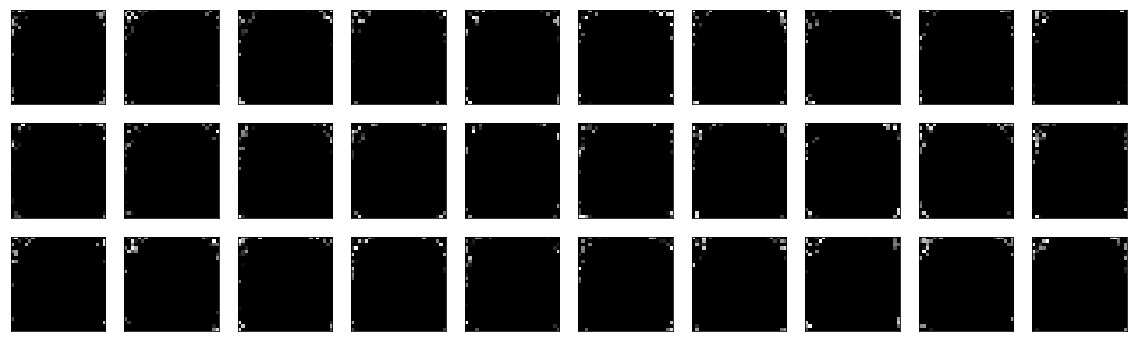

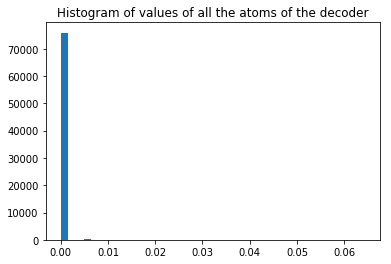

In [28]:
sp_o = 0.01
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


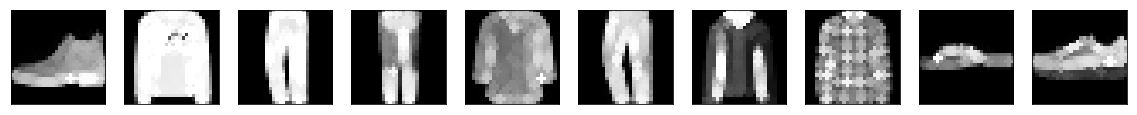

Dilatation of the reconstructions


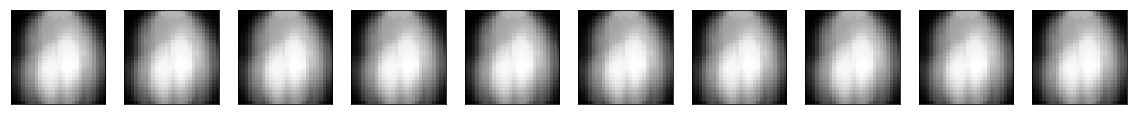

Original images and max-approximation to dilatation
Max-approx error to original:  0.0  - Max-approx error to reconstruction:  0.0


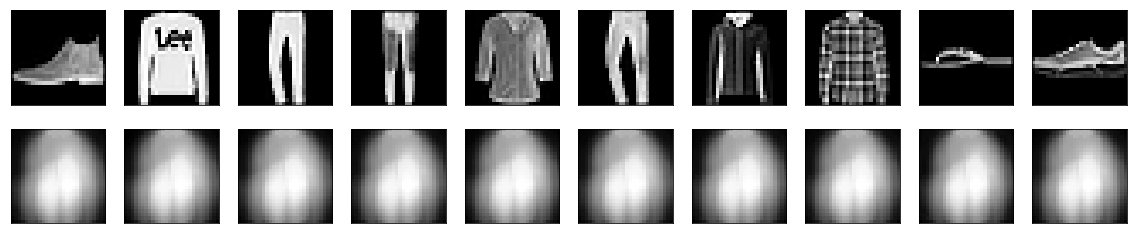

Dilated of the atom images of the decoder


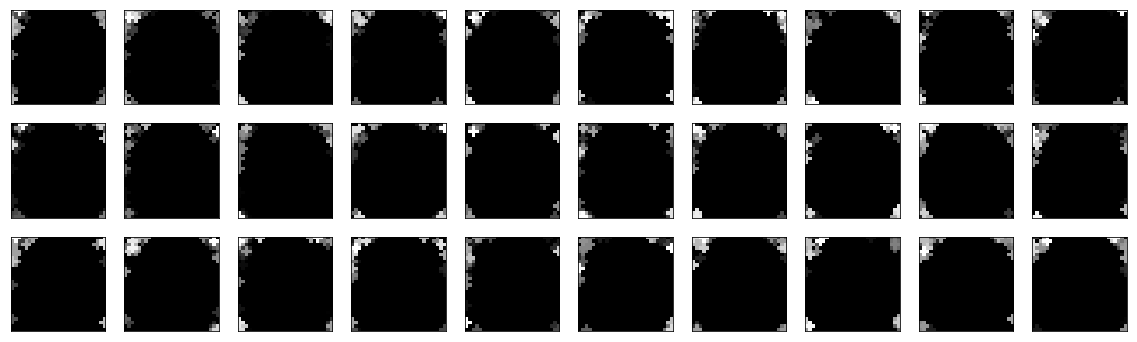

In [29]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. Sparsity_Objective = 0.05

## 2.1 Sparsity_weight = 0.0001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01275645309984684


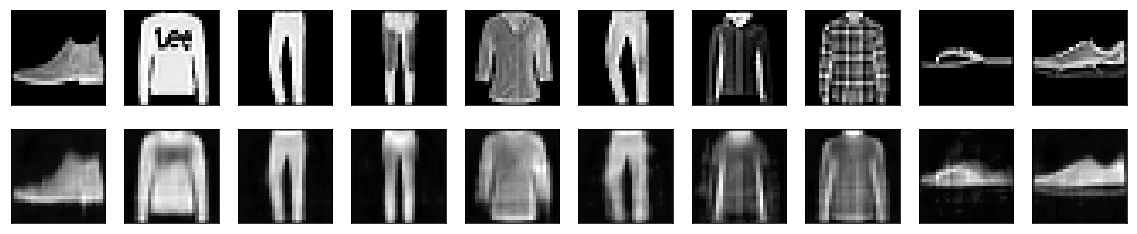

Histograms of the encodings - Sparsity (Hoyer):  0.35105496644973755


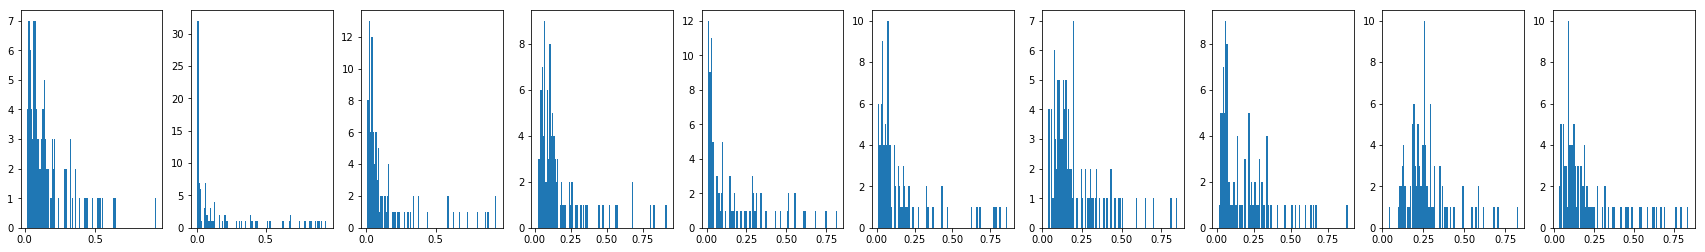

Atom images of the decoder


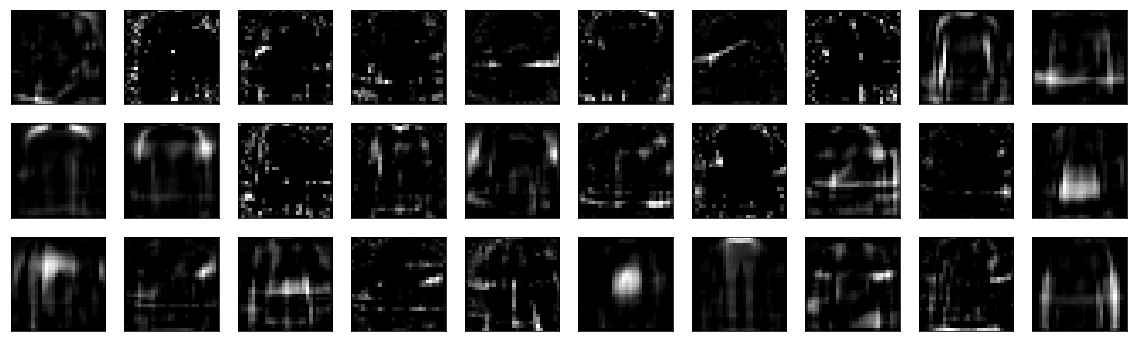

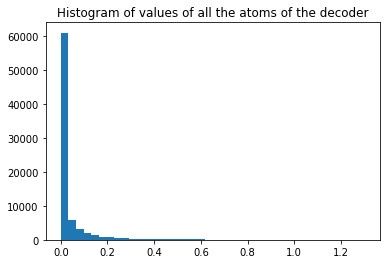

In [30]:
sp_o = 0.05
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


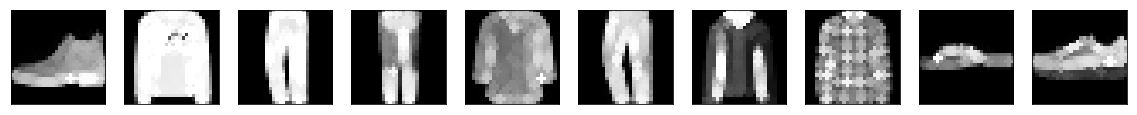

Dilatation of the reconstructions


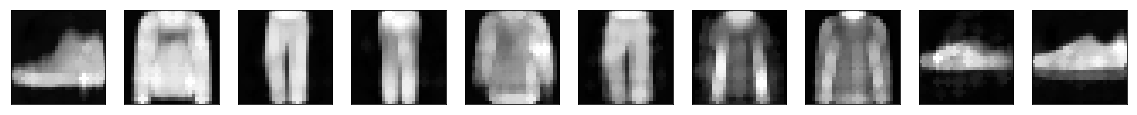

Original images and max-approximation to dilatation
Max-approx error to original:  1.0460014936447144  - Max-approx error to reconstruction:  1.0852659499168396


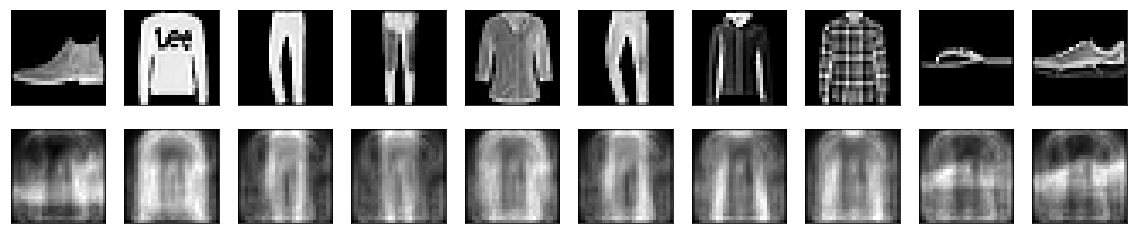

Dilated of the atom images of the decoder


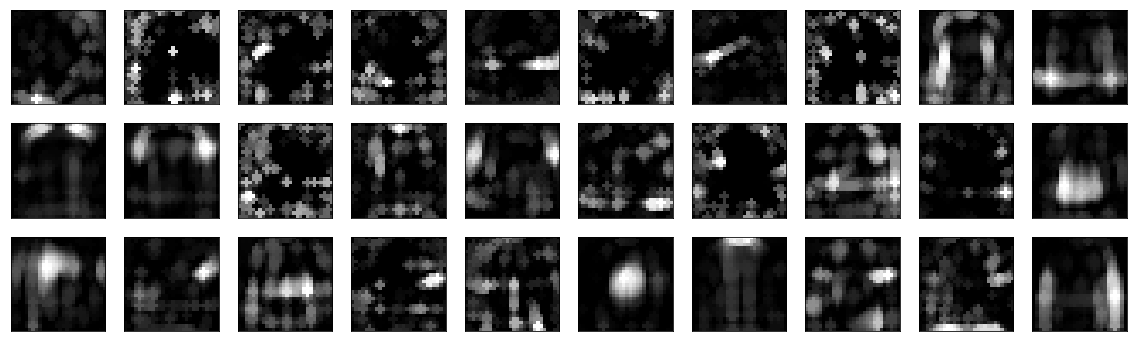

In [31]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.2 Sparsity_weight = 0.0005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.015801740995049475


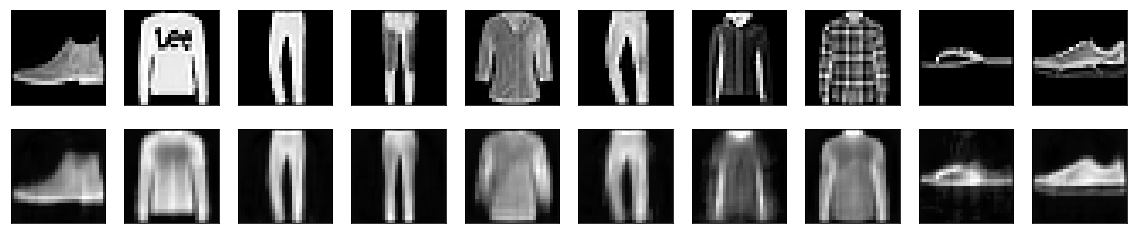

Histograms of the encodings - Sparsity (Hoyer):  0.45873984694480896


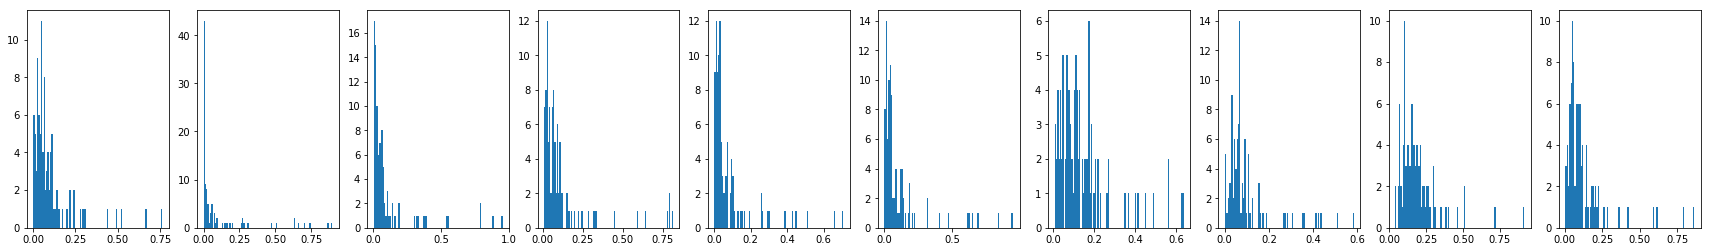

Atom images of the decoder


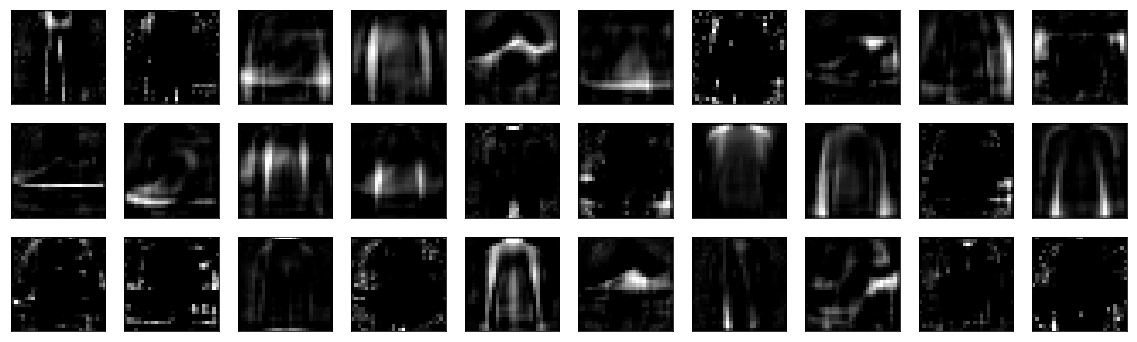

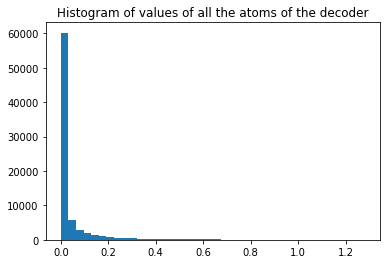

In [32]:
sp_o = 0.05
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


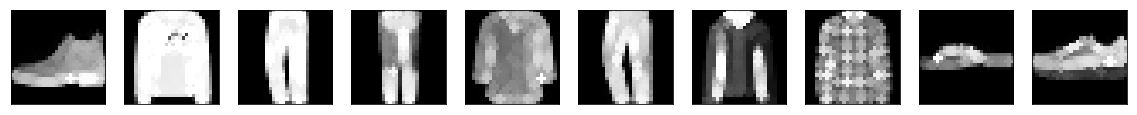

Dilatation of the reconstructions


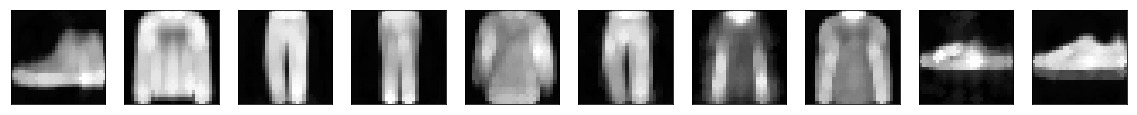

Original images and max-approximation to dilatation
Max-approx error to original:  0.3961101550579071  - Max-approx error to reconstruction:  0.38886845235824585


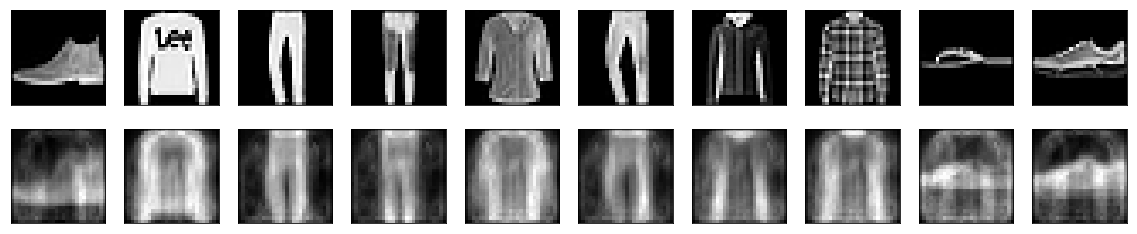

Dilated of the atom images of the decoder


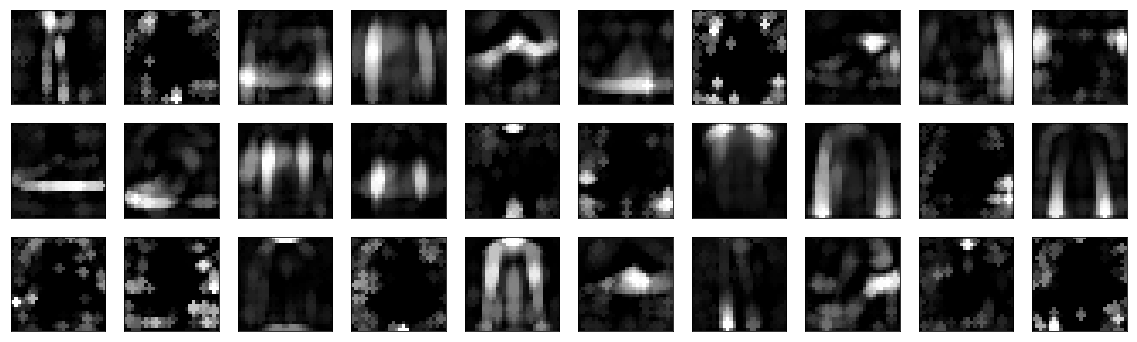

In [33]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.3 Sparsity_weight = 0.001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01629182605743408


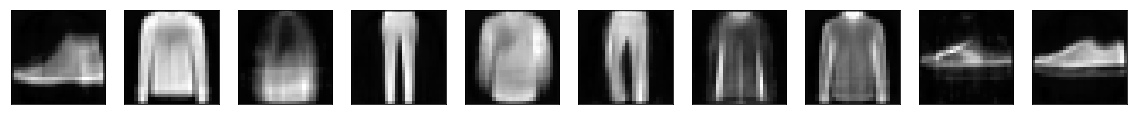

Histograms of the encodings - Sparsity (Hoyer):  0.5030182003974915


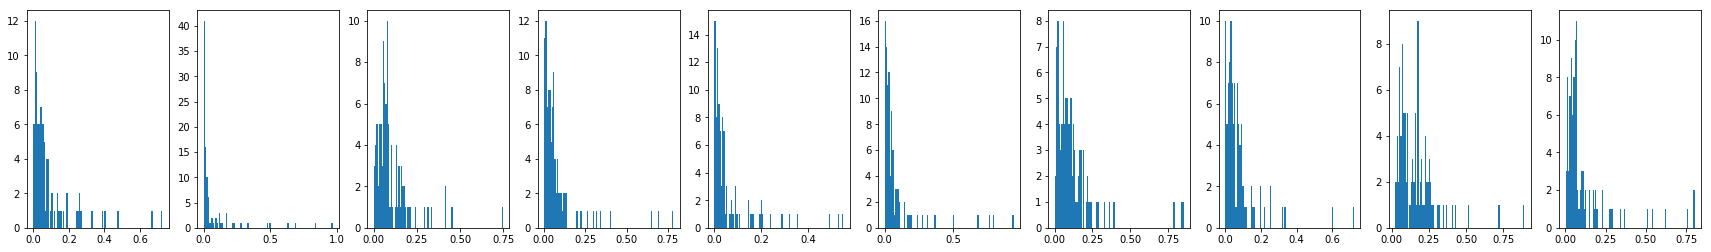

Atom images of the decoder


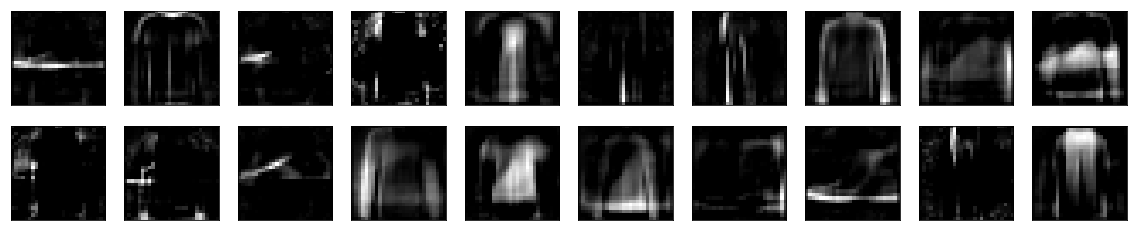

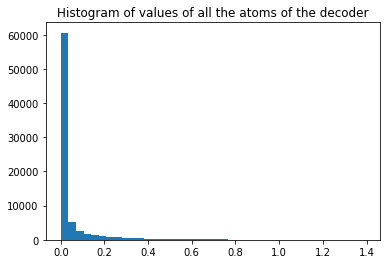

In [4]:
sp_o = 0.05
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


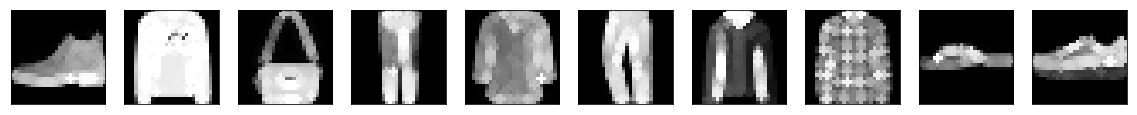

Dilatation of the reconstructions


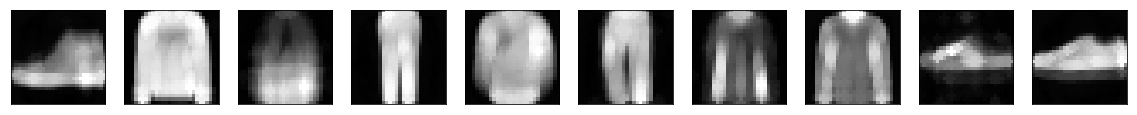

Original images and max-approximation to dilatation
Max-approx error to original:  0.1824727608203888  - Max-approx error to reconstruction:  0.2025909945011139


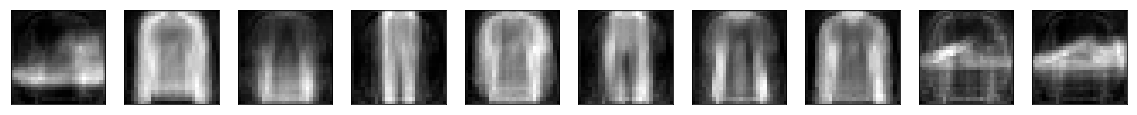

Dilated of the atom images of the decoder


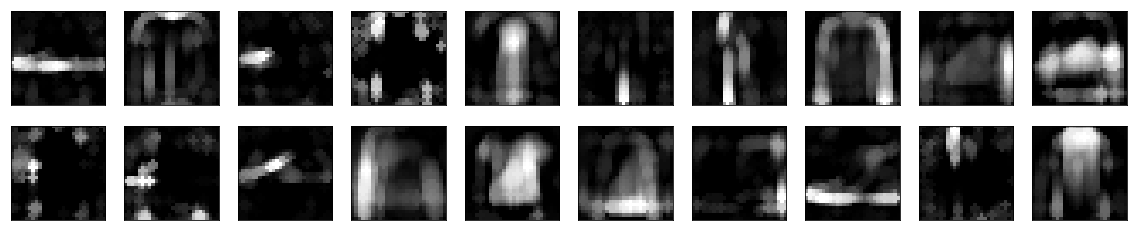

In [97]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

In [7]:
AE.best_linearSVM_classification_score(x_test, y_test, nb_values_C=30)

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.03290344562312668, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.2s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.4s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.4s
[CV] C=0.04893900918477494 ...........................................
[CV] .

[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.6s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.3s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.3s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.4s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.4s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=3.856620421163472, total=   1.6s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.6s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.6s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.6s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.7s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.7s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.7s
[CV] C=5.736152510448681 .............................................
[CV] .

[CV] ............................. C=18.873918221350976, total=   2.3s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.2s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.3s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.2s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.2s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.3s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.3s
[CV] C=18.873918221350976 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   2.6s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.6s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.6s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.7s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.5s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.6s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.5s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................... C=452.035365636025, total=   3.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   3.0s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   3.4s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   3.0s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   3.6s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   3.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   3.5s
[CV] C=452.035365636025 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 15.1min finished


(0.8039999999999999, 0.031368774282716234, {'C': 28.072162039411786})

## 2.4 Sparsity_weight = 0.005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.018199811959266662


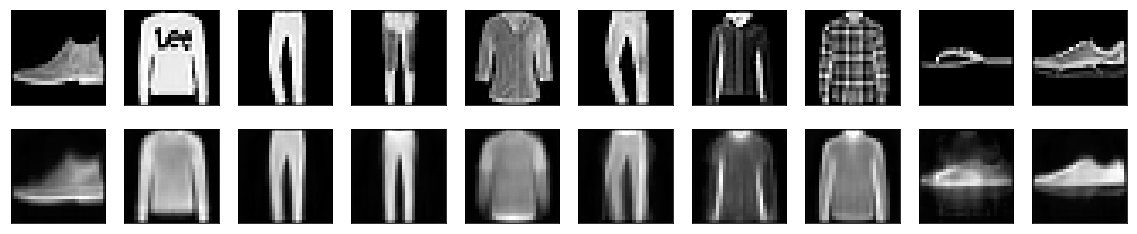

Histograms of the encodings - Sparsity (Hoyer):  0.5352259278297424


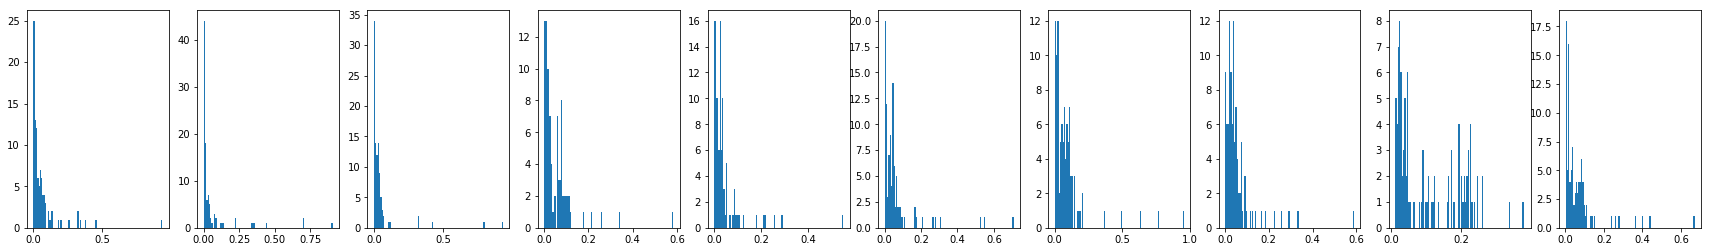

Atom images of the decoder


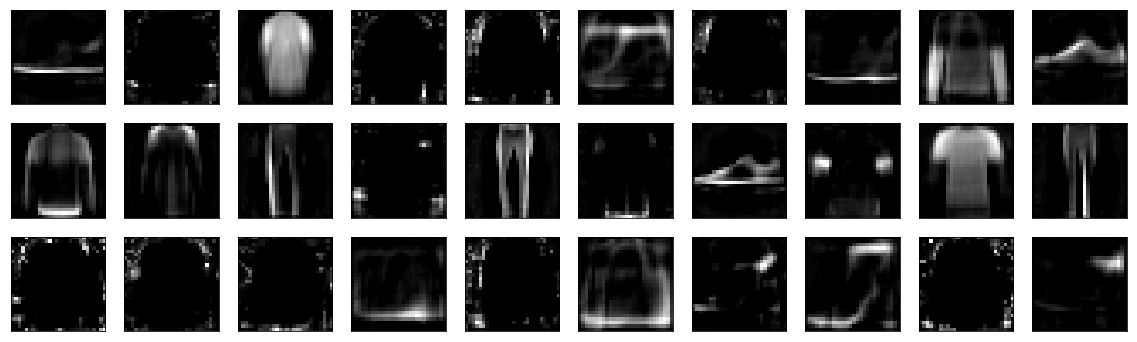

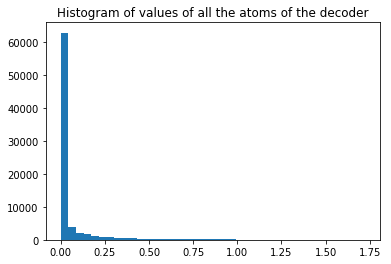

In [36]:
sp_o = 0.05
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


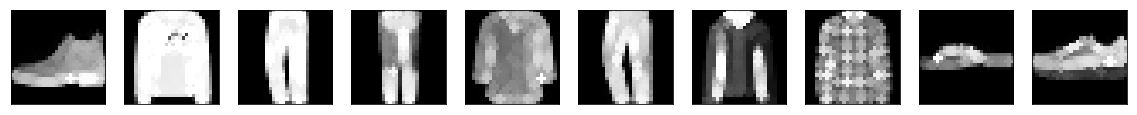

Dilatation of the reconstructions


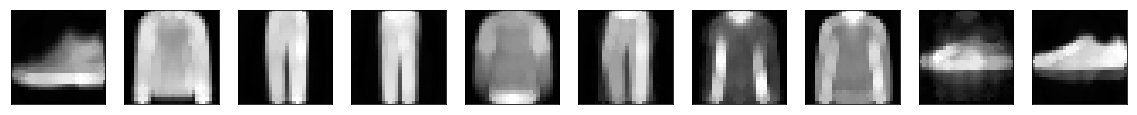

Original images and max-approximation to dilatation
Max-approx error to original:  0.07257788105010986  - Max-approx error to reconstruction:  0.06894913647174836


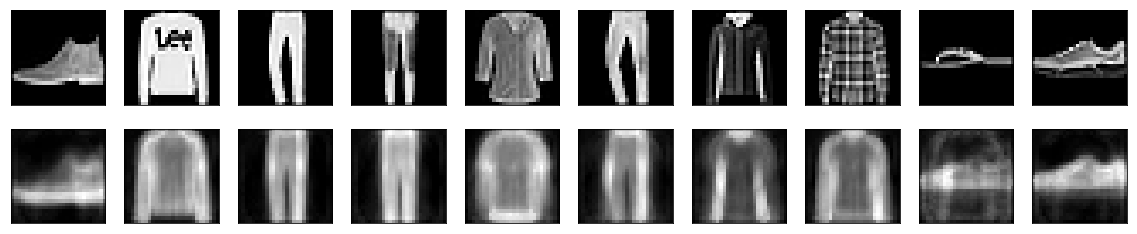

Dilated of the atom images of the decoder


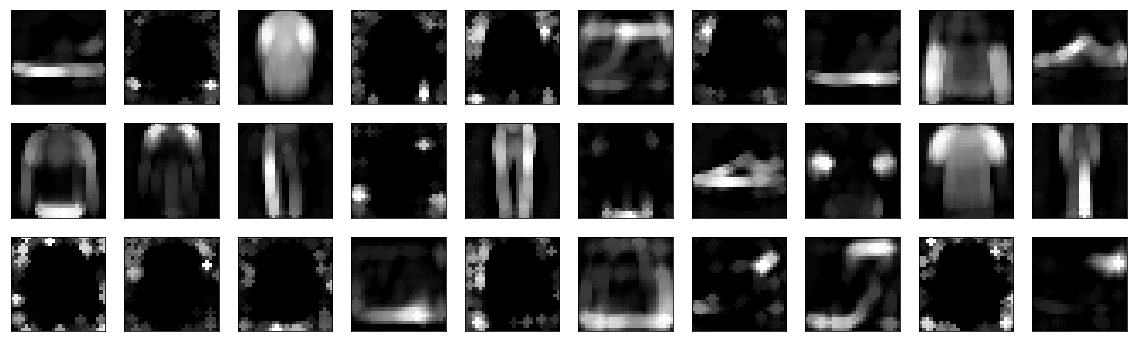

In [37]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.5 Sparsity_weight = 0.01 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01879849414229393


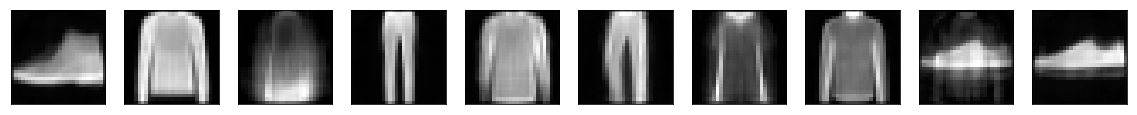

Histograms of the encodings - Sparsity (Hoyer):  0.5296993851661682


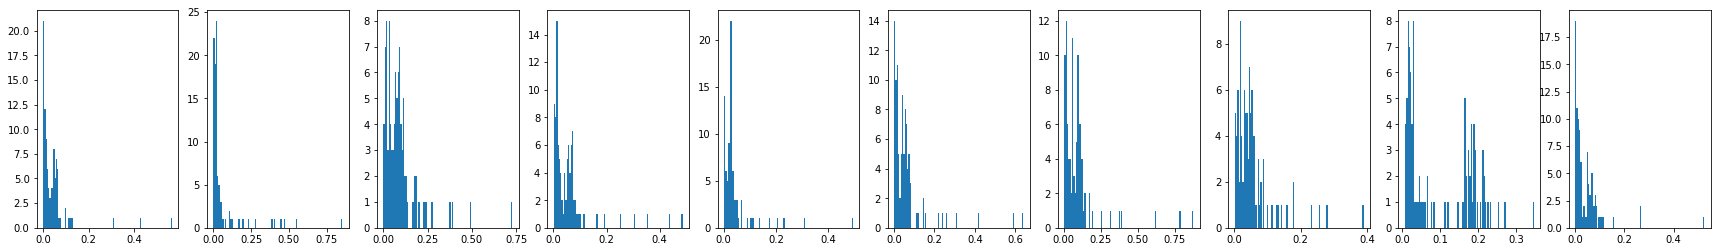

Atom images of the decoder


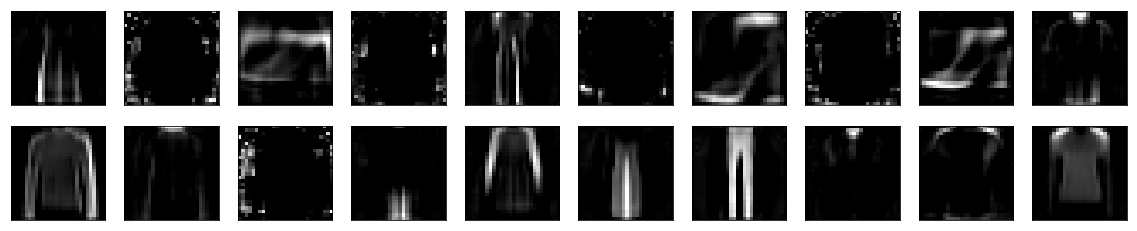

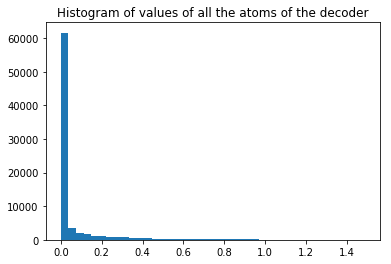

In [98]:
sp_o = 0.05
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


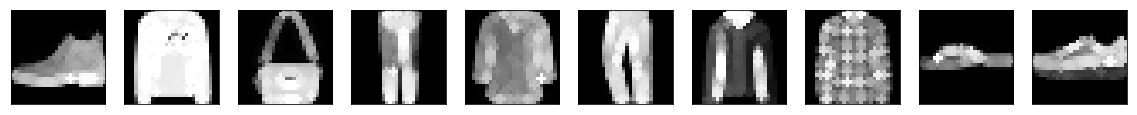

Dilatation of the reconstructions


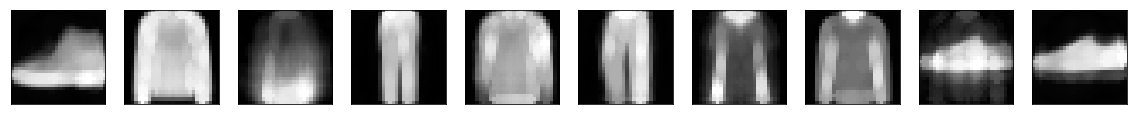

Original images and max-approximation to dilatation
Max-approx error to original:  0.05708525545597076  - Max-approx error to reconstruction:  0.058755497515201566


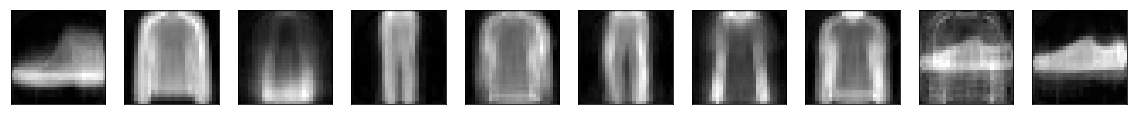

Dilated of the atom images of the decoder


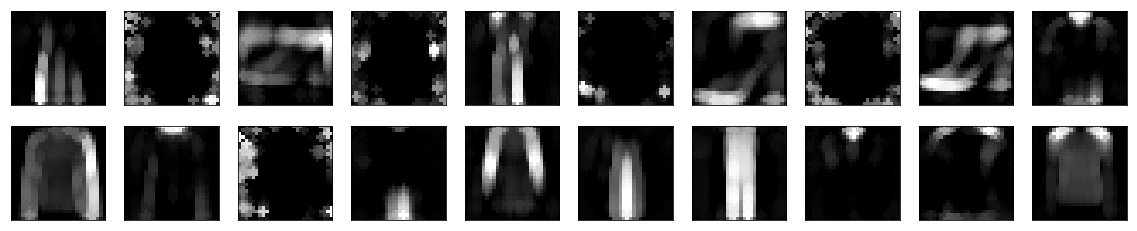

In [99]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 2.6 Sparsity_weight = 0.05 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.022382811459898948


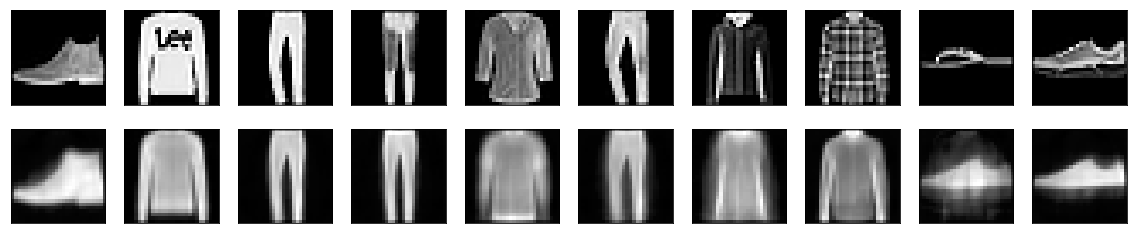

Histograms of the encodings - Sparsity (Hoyer):  0.3859110474586487


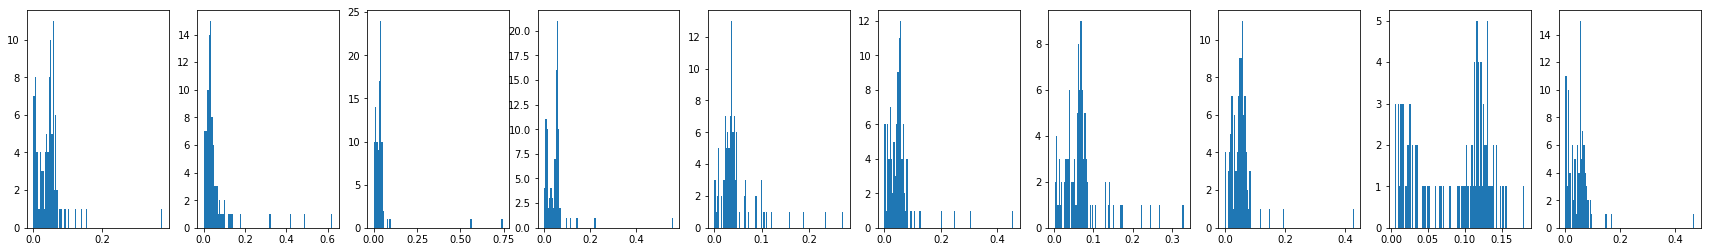

Atom images of the decoder


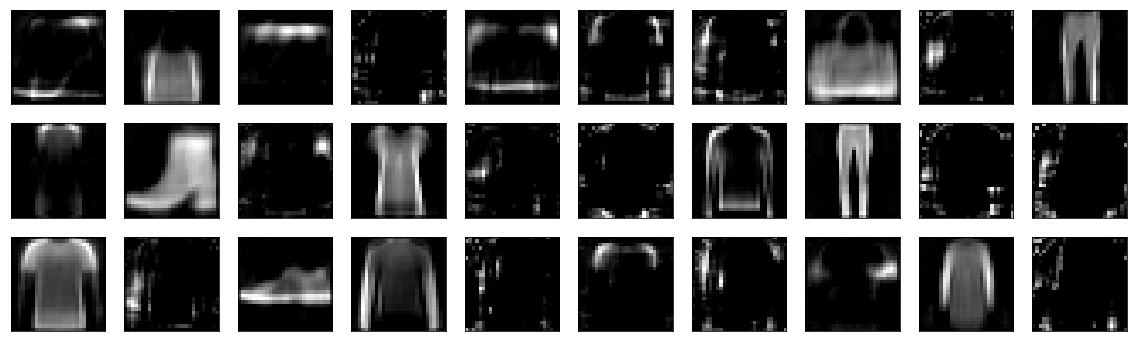

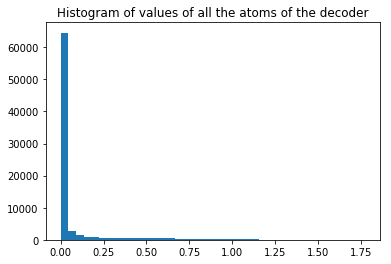

In [40]:
sp_o = 0.05
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


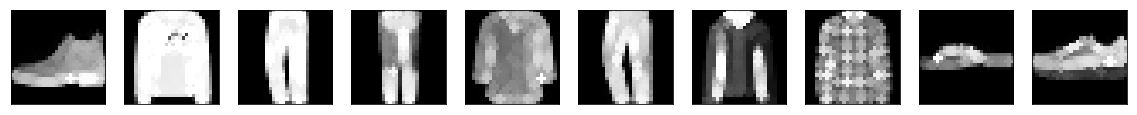

Dilatation of the reconstructions


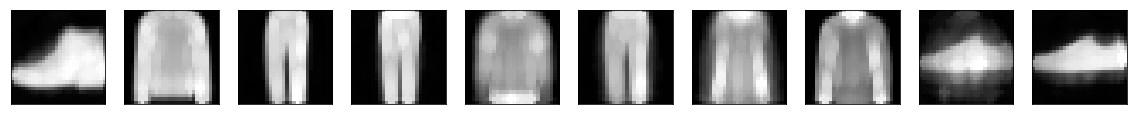

Original images and max-approximation to dilatation
Max-approx error to original:  0.047051837551593784  - Max-approx error to reconstruction:  0.03289962690472603


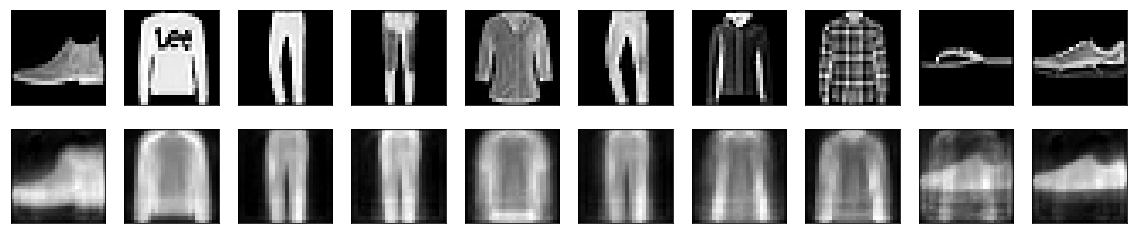

Dilated of the atom images of the decoder


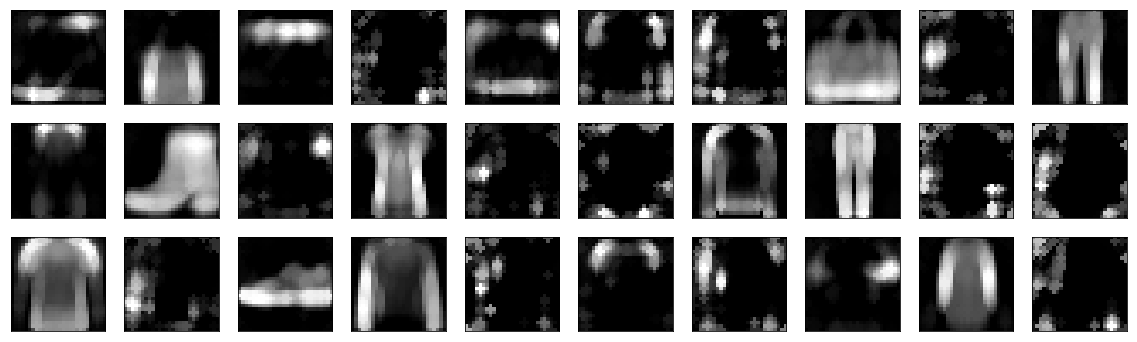

In [41]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.7 Sparsity_weight = 0.1 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.0


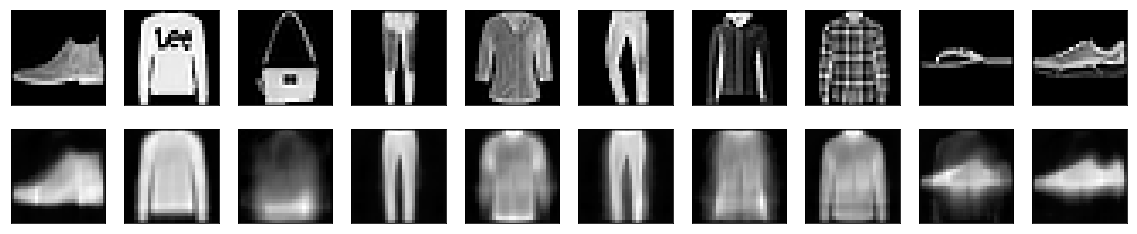

Histograms of the encodings - Sparsity (Hoyer):  0.0


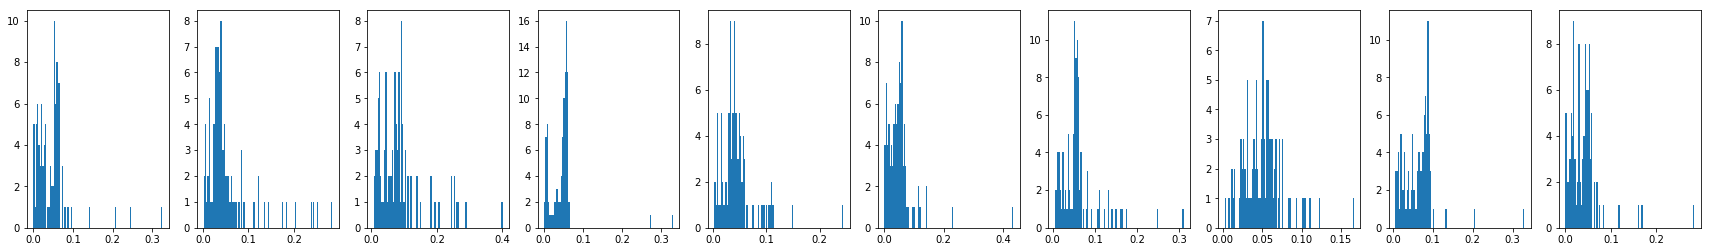

Atom images of the decoder


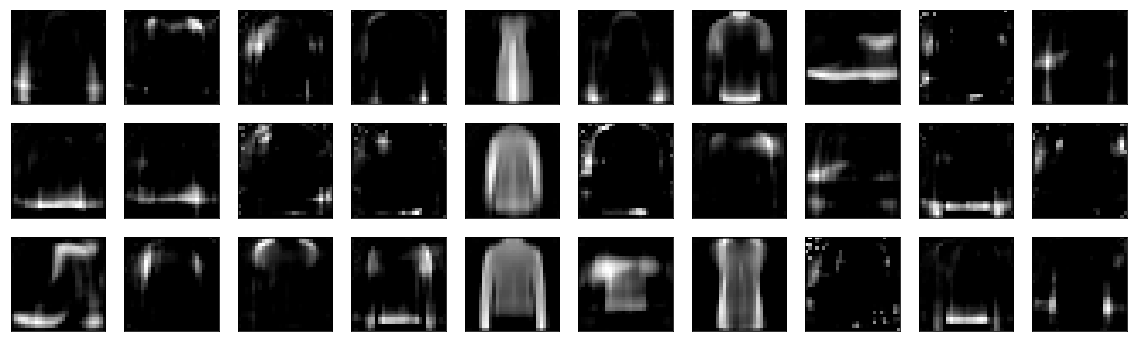

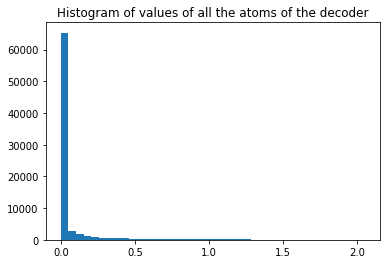

In [21]:
sp_o = 0.05
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


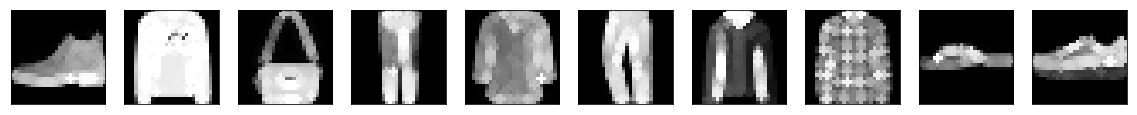

Dilatation of the reconstructions


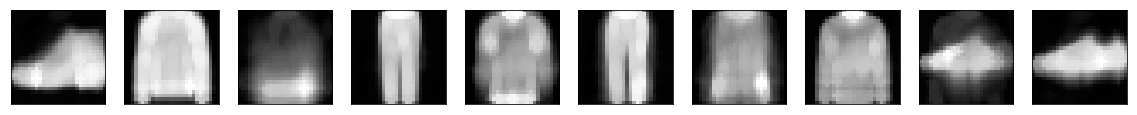

Original images and max-approximation to dilatation
Max-approx error to original:  0.0329983050942421  - Max-approx error to reconstruction:  0.01950160396695137


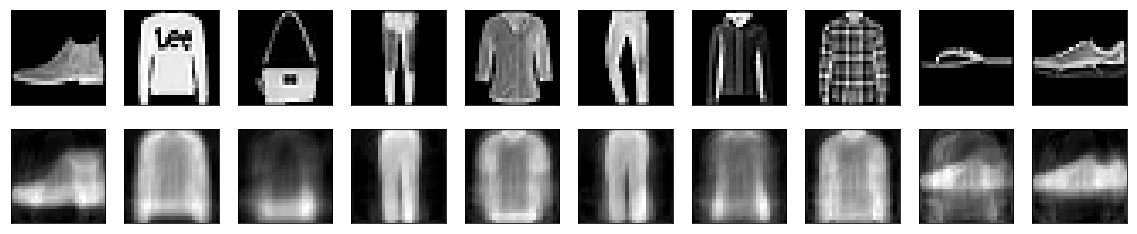

Dilated of the atom images of the decoder


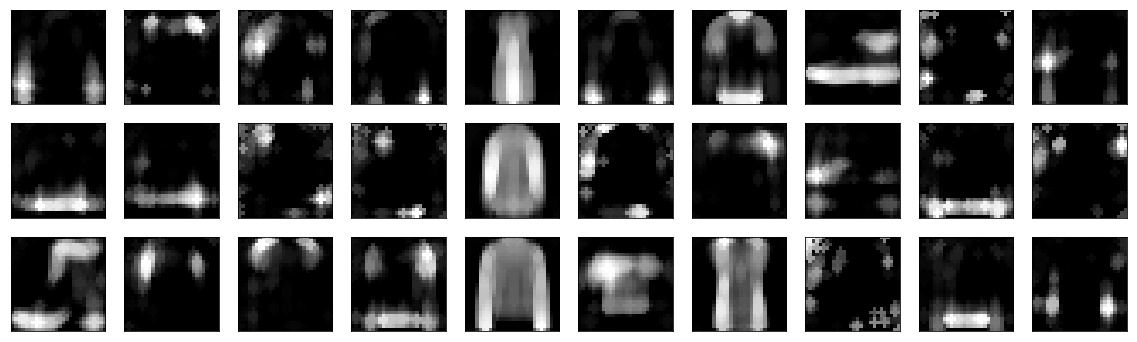

In [22]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.8 Sparsity_weight = 0.5 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.0


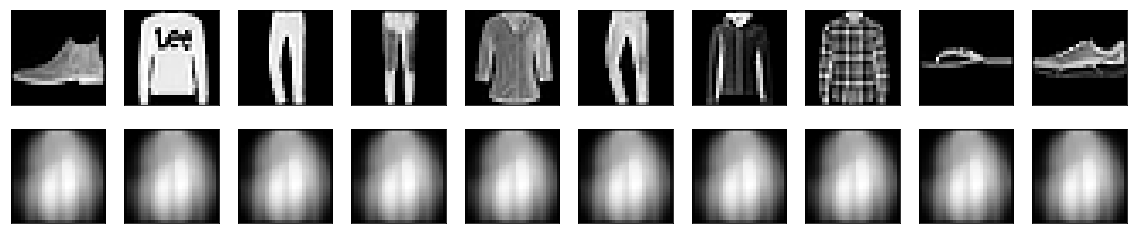

Histograms of the encodings - Sparsity (Hoyer):  0.0


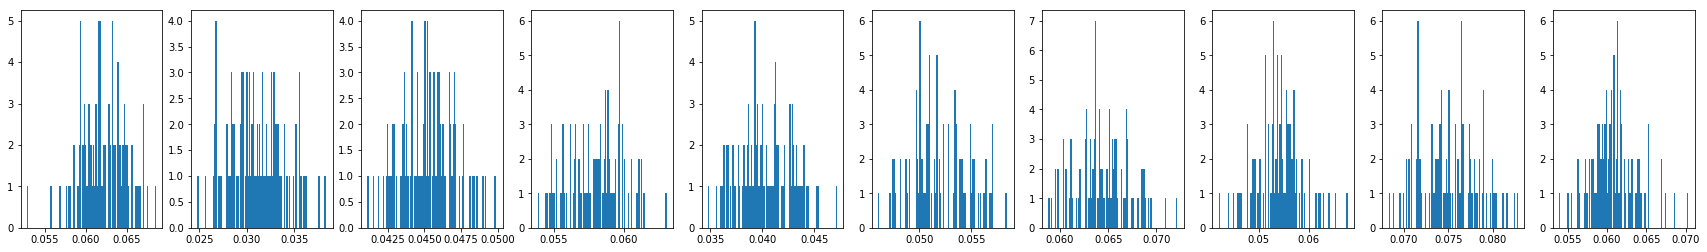

Atom images of the decoder


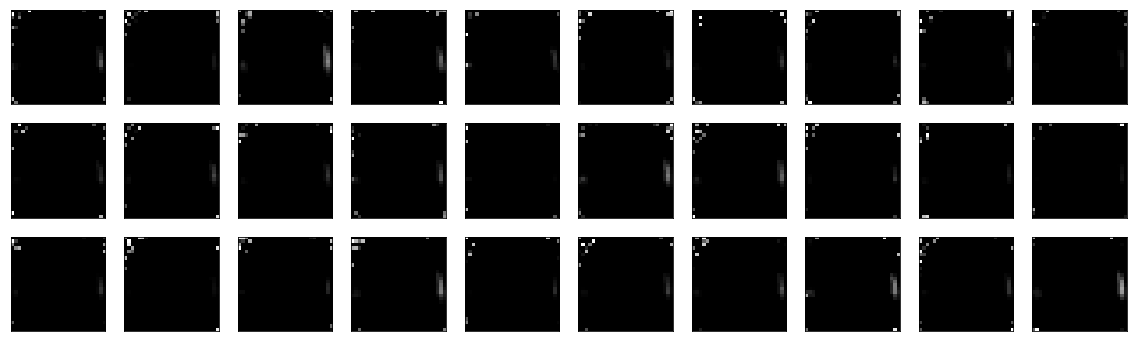

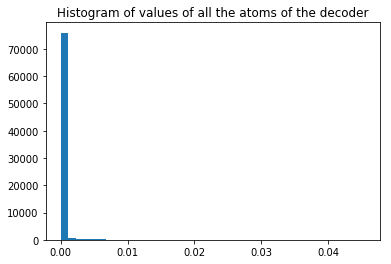

In [44]:
sp_o = 0.05
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


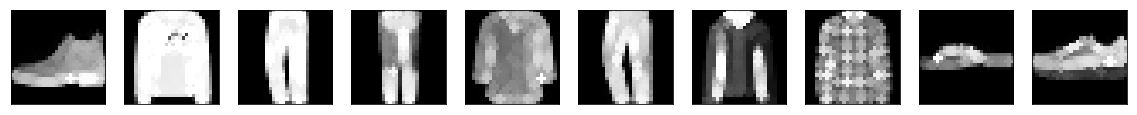

Dilatation of the reconstructions


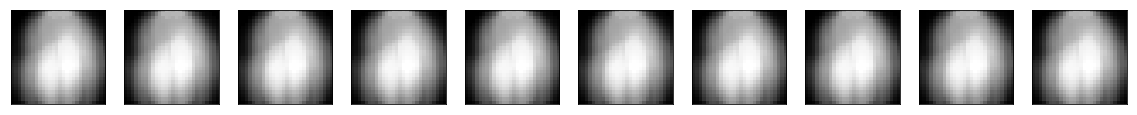

Original images and max-approximation to dilatation
Max-approx error to original:  0.0  - Max-approx error to reconstruction:  0.0


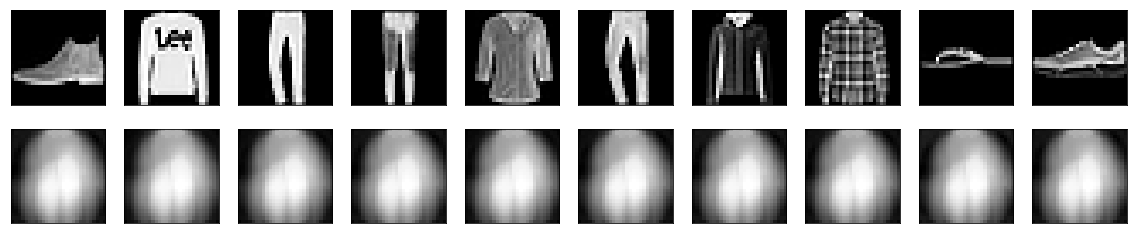

Dilated of the atom images of the decoder


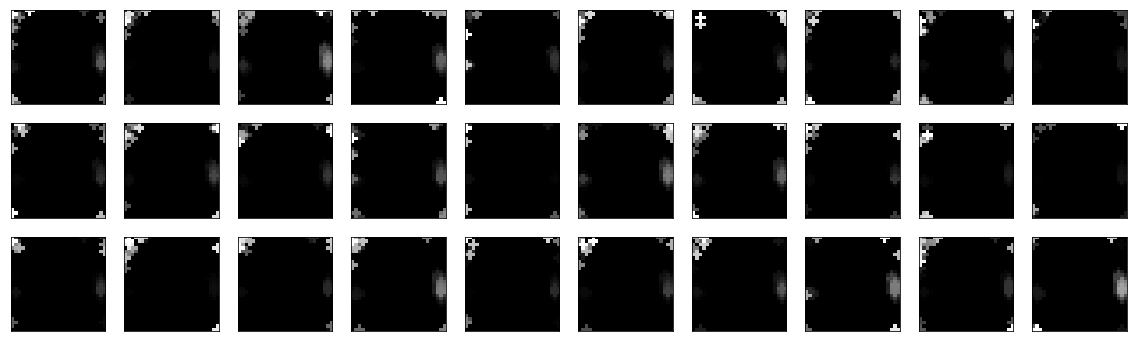

In [45]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 3. Sparsity_Objective = 0.1

## 3.1 Sparsity_weight = 0.0001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.010605078795552253


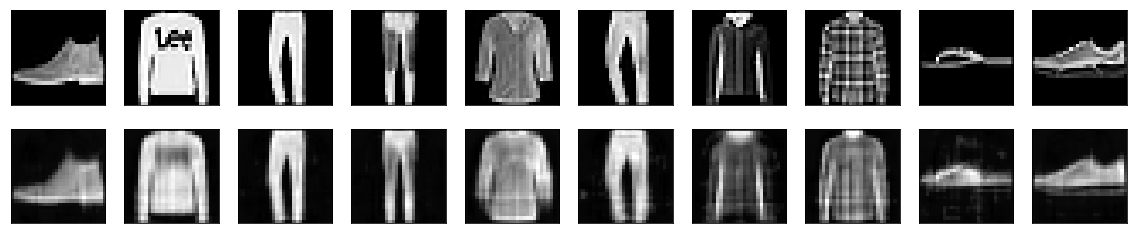

Histograms of the encodings - Sparsity (Hoyer):  0.2510598301887512


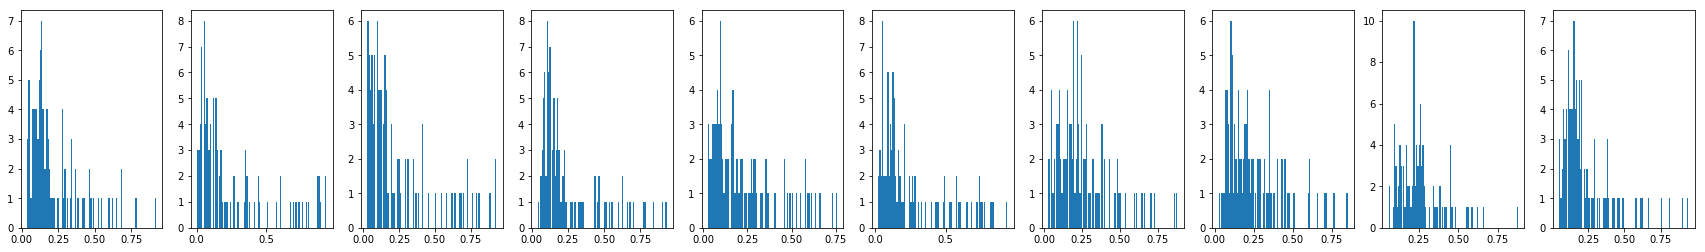

Atom images of the decoder


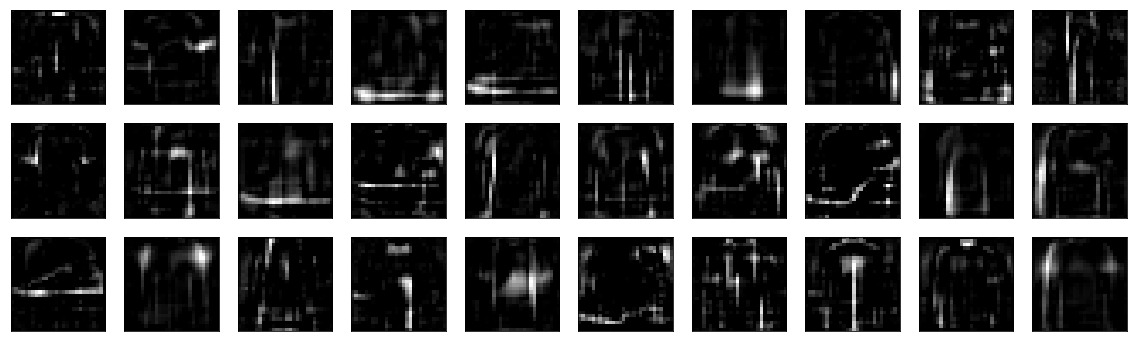

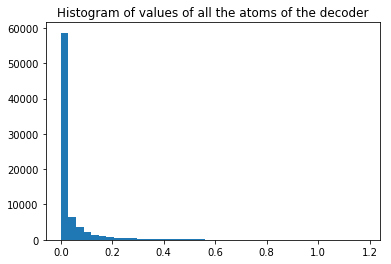

In [46]:
sp_o = 0.1
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


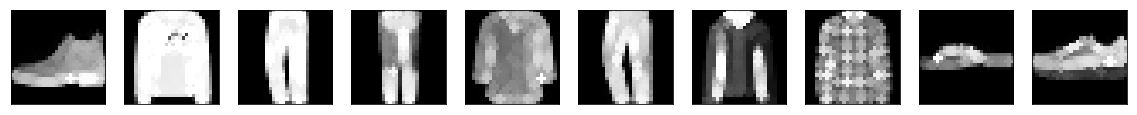

Dilatation of the reconstructions


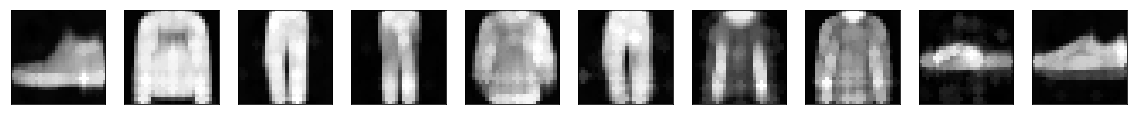

Original images and max-approximation to dilatation
Max-approx error to original:  1.4610754245758057  - Max-approx error to reconstruction:  1.5123008045196533


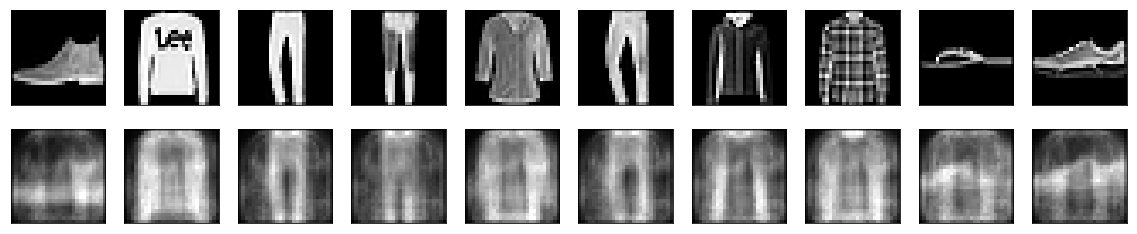

Dilated of the atom images of the decoder


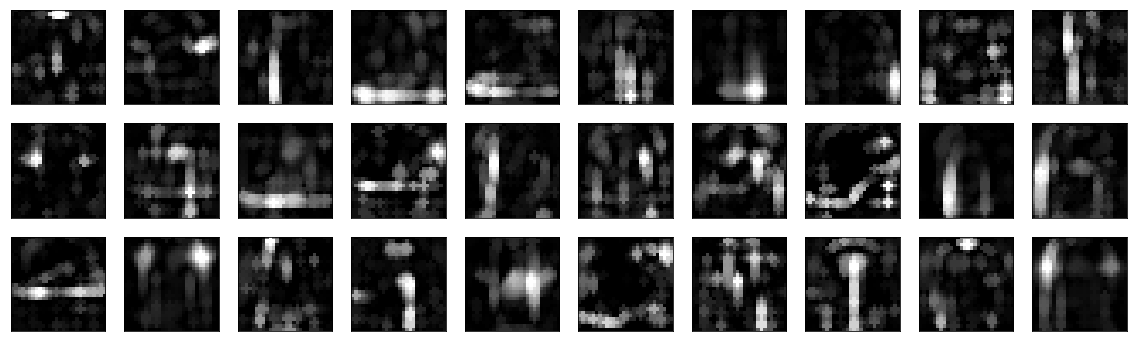

In [47]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.2 Sparsity_weight = 0.0005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.012142649269104003


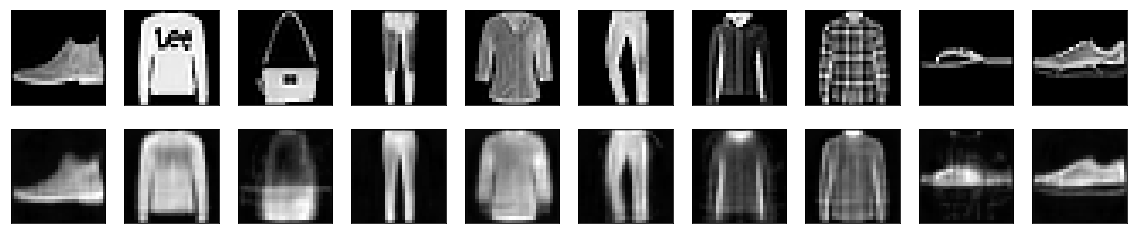

Histograms of the encodings - Sparsity (Hoyer):  0.340761661529541


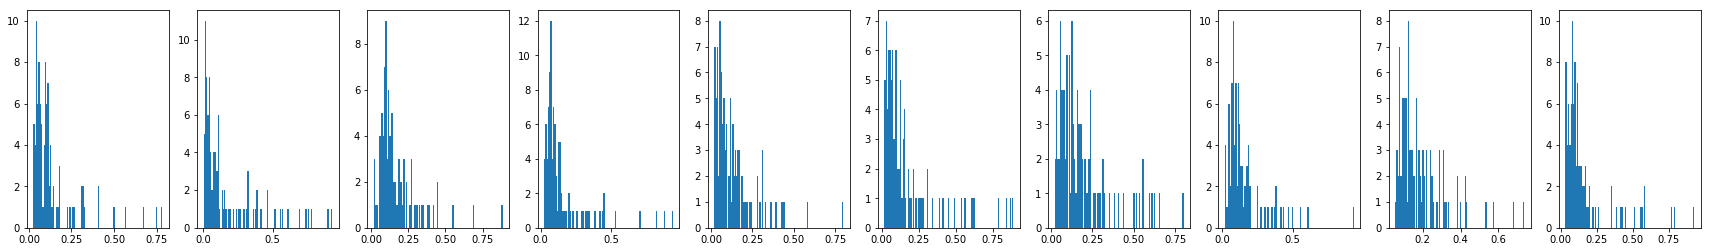

Atom images of the decoder


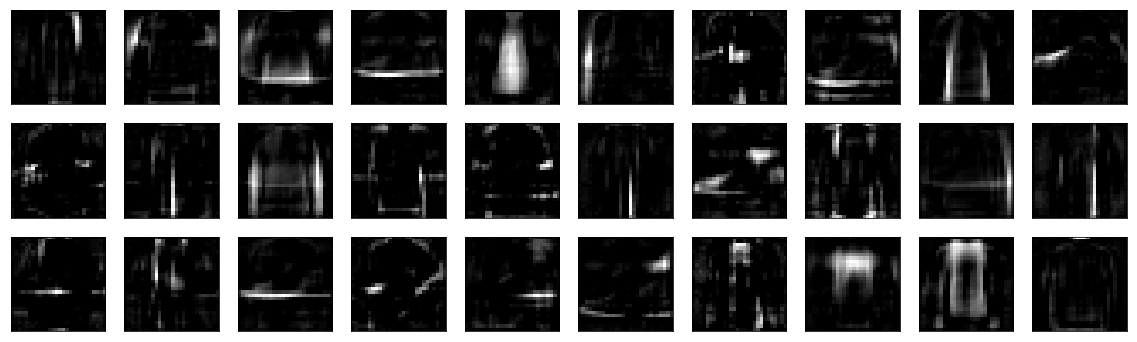

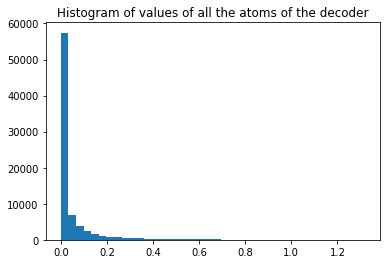

In [81]:
sp_o = 0.1
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


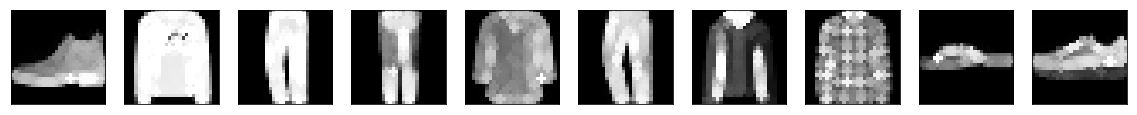

Dilatation of the reconstructions


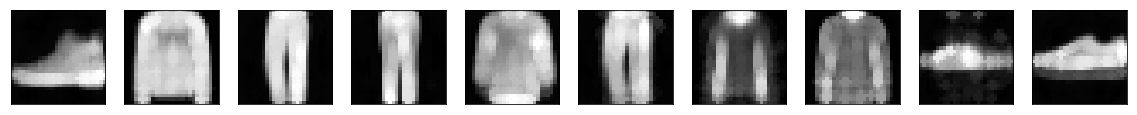

Original images and max-approximation to dilatation
Max-approx error to original:  0.6536187248229981  - Max-approx error to reconstruction:  0.6838911839485169


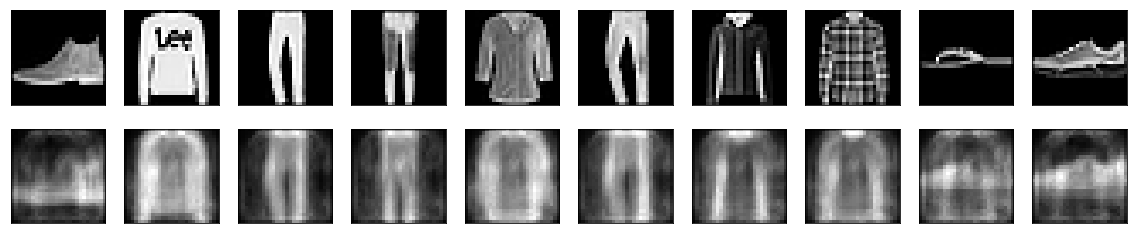

Dilated of the atom images of the decoder


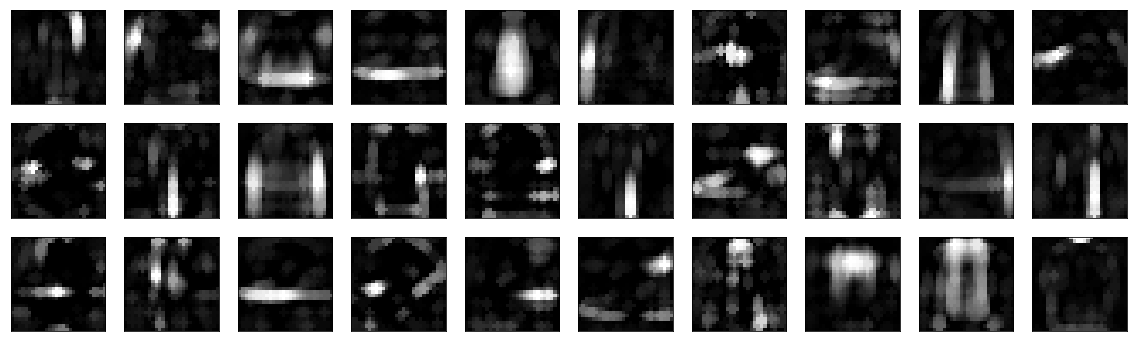

In [49]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.3 Sparsity_weight = 0.001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.01295157119333744


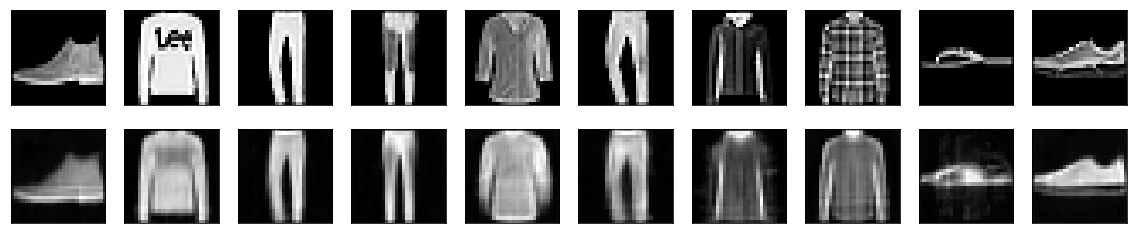

Histograms of the encodings - Sparsity (Hoyer):  0.3778790235519409


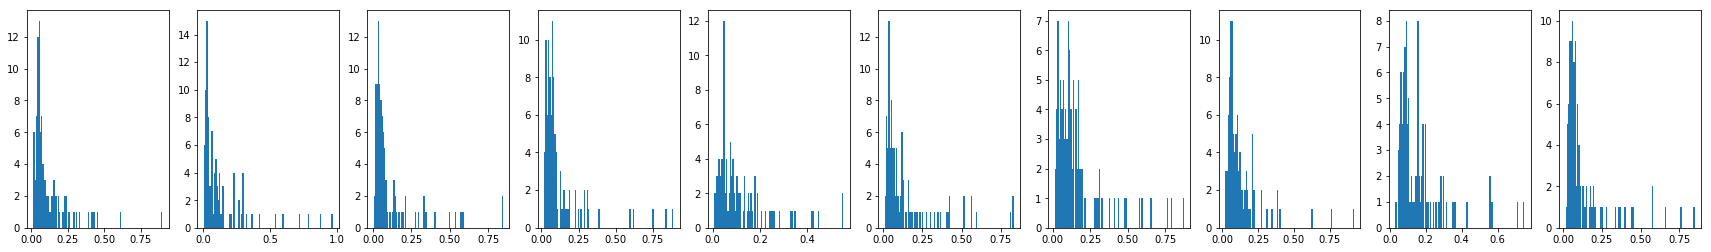

Atom images of the decoder


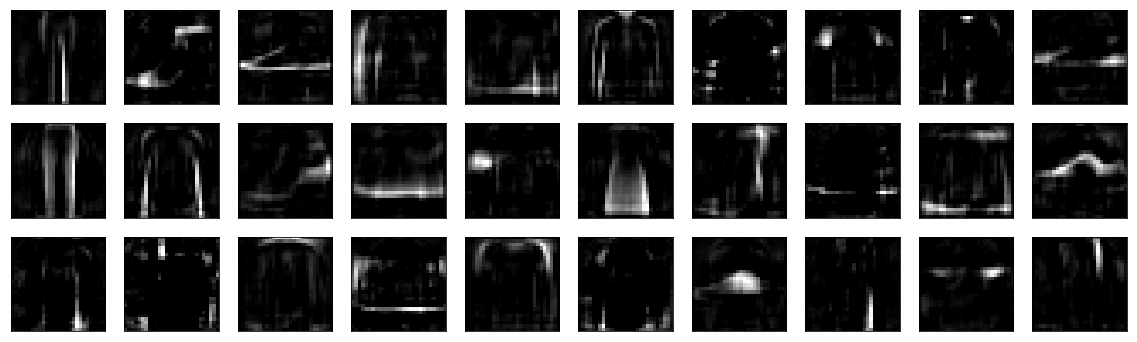

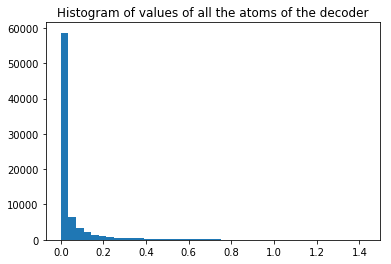

In [50]:
sp_o = 0.1
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


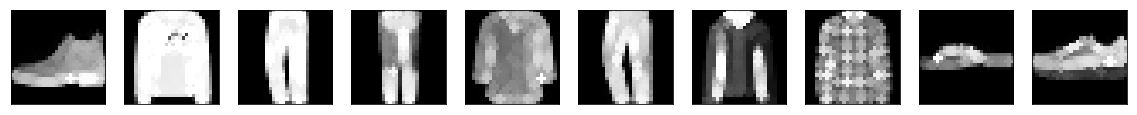

Dilatation of the reconstructions


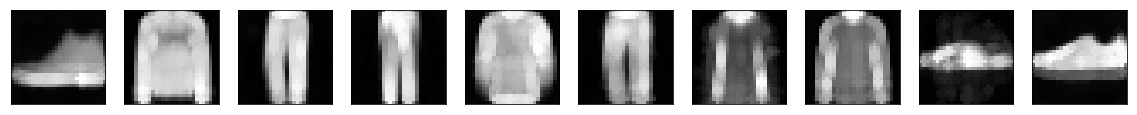

Original images and max-approximation to dilatation
Max-approx error to original:  0.4397014638900757  - Max-approx error to reconstruction:  0.4653852628231049


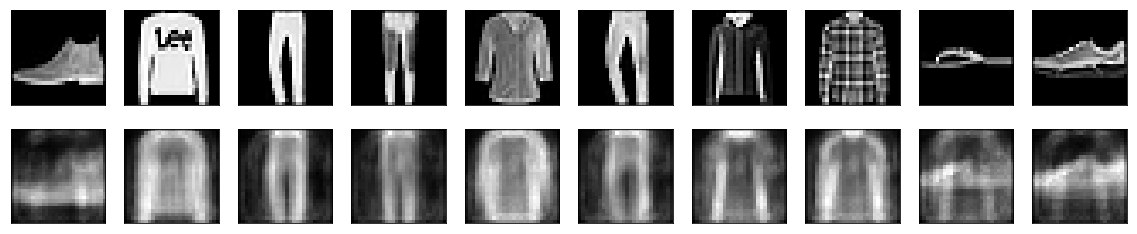

Dilated of the atom images of the decoder


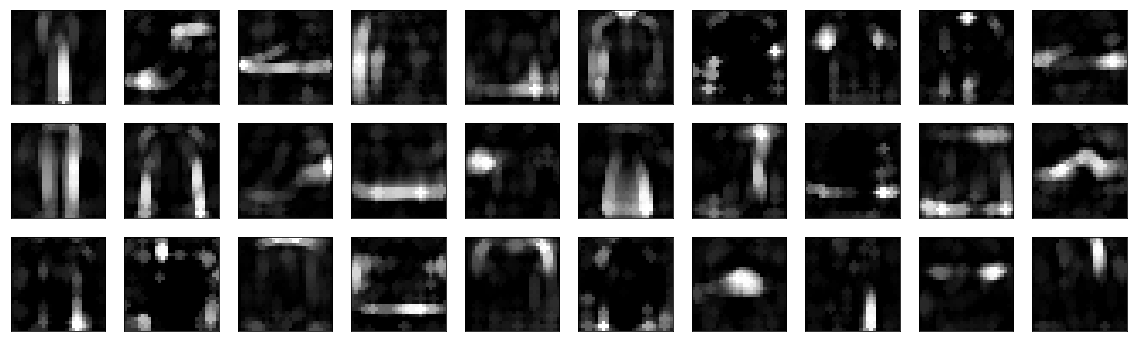

In [51]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.4 Sparsity_weight = 0.005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.014333783206343651


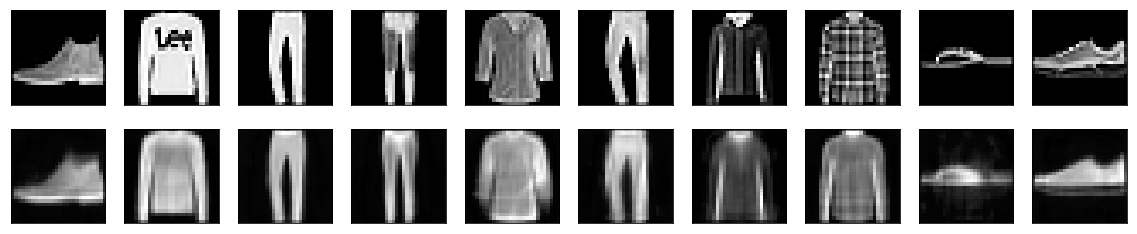

Histograms of the encodings - Sparsity (Hoyer):  0.3860248625278473


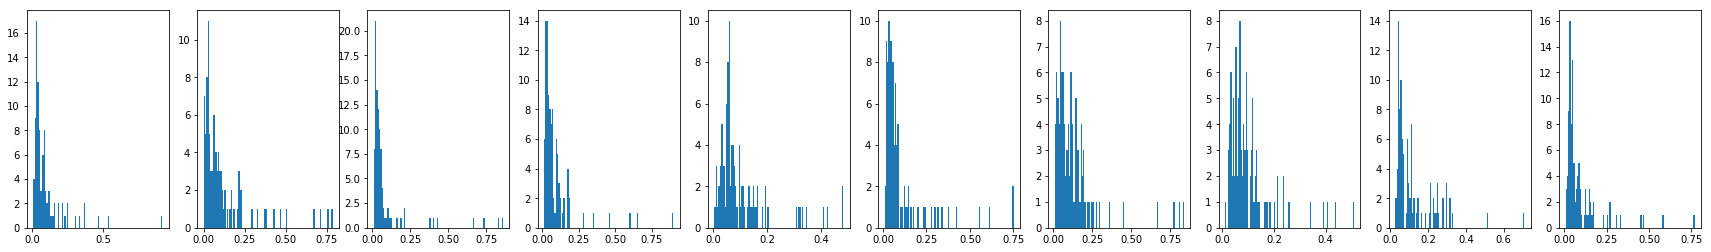

Atom images of the decoder


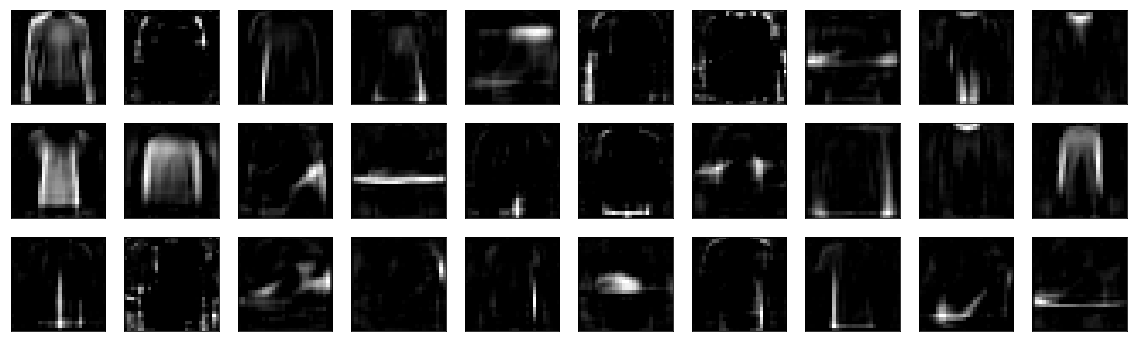

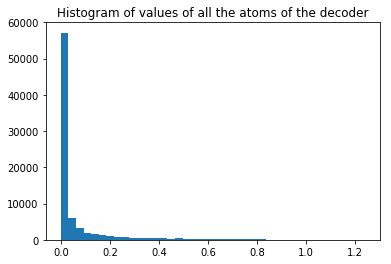

In [52]:
sp_o = 0.1
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


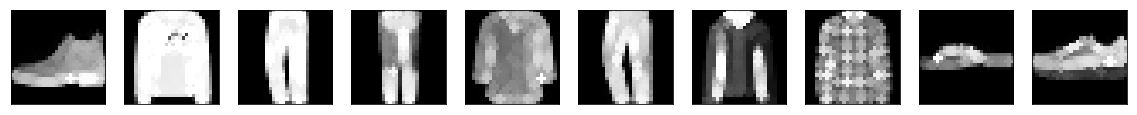

Dilatation of the reconstructions


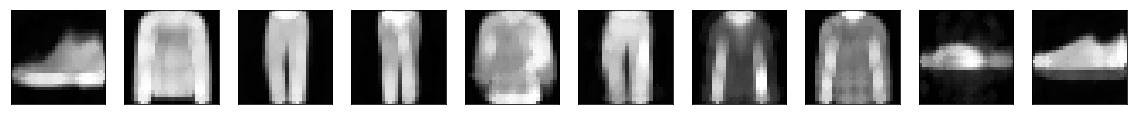

Original images and max-approximation to dilatation
Max-approx error to original:  0.23558381814956664  - Max-approx error to reconstruction:  0.26015147352218626


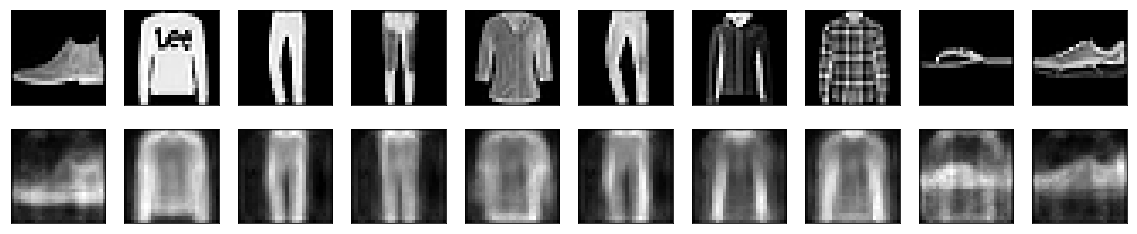

Dilated of the atom images of the decoder


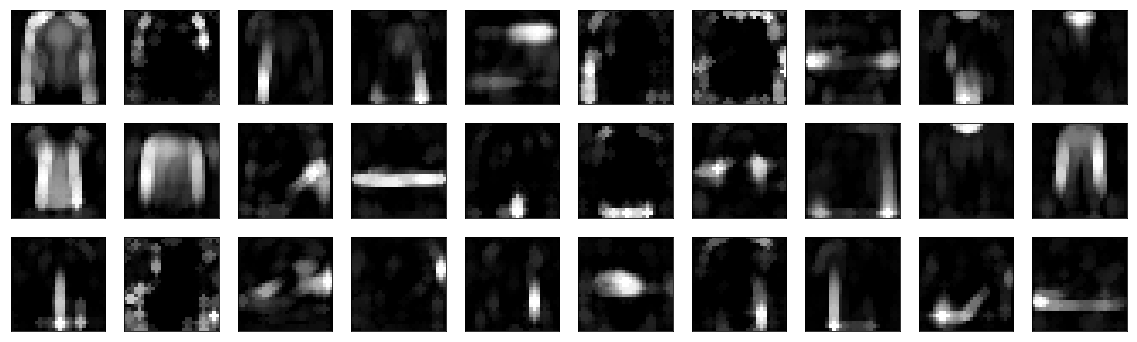

In [53]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.5 Sparsity_weight = 0.01 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.014382498198747637


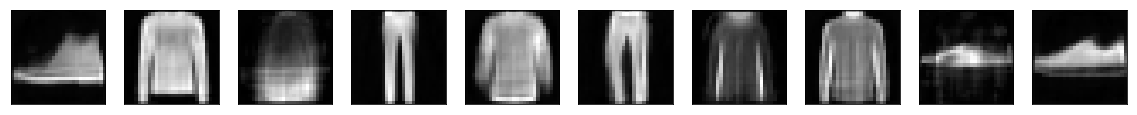

Histograms of the encodings - Sparsity (Hoyer):  0.36728957295417786


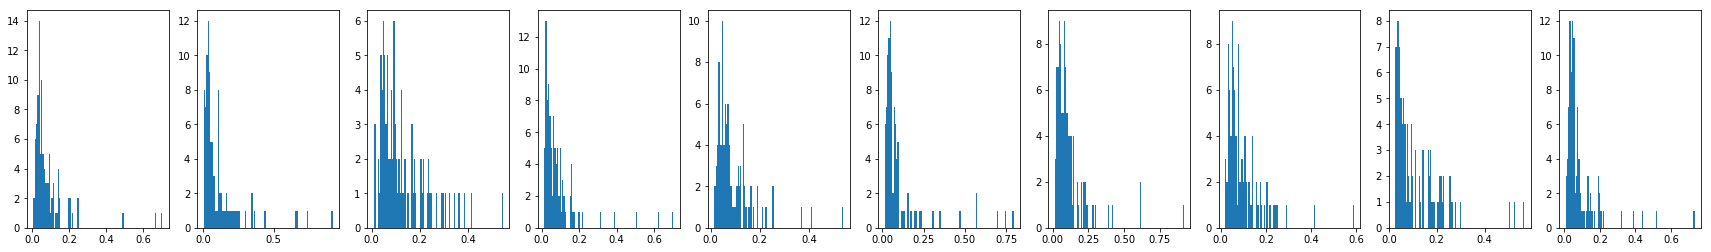

Atom images of the decoder


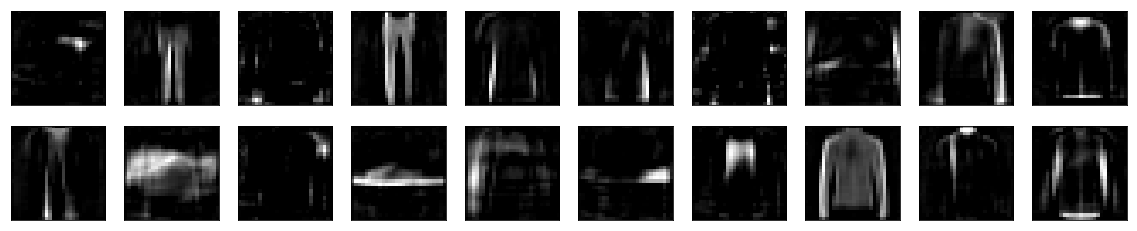

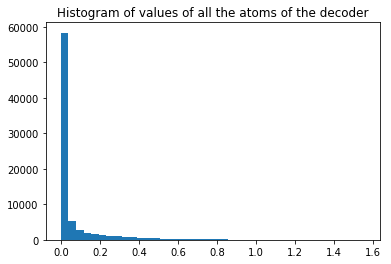

In [6]:
sp_o = 0.1
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


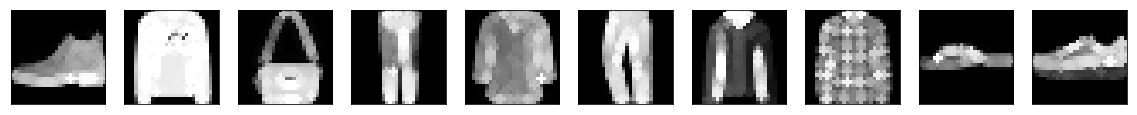

Dilatation of the reconstructions


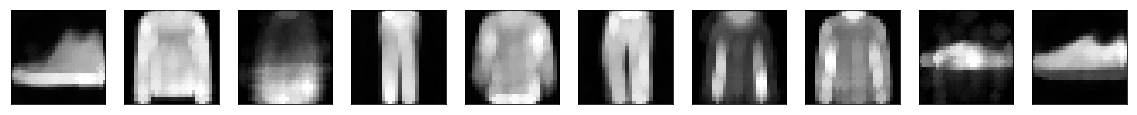

Original images and max-approximation to dilatation
Max-approx error to original:  0.19694332113265992  - Max-approx error to reconstruction:  0.22053011133670808


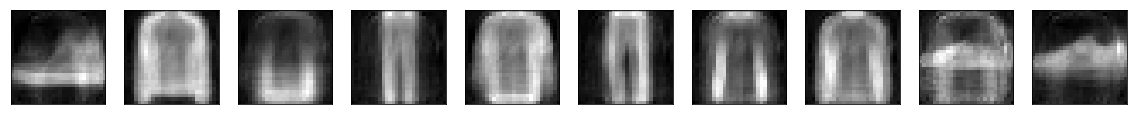

Dilated of the atom images of the decoder


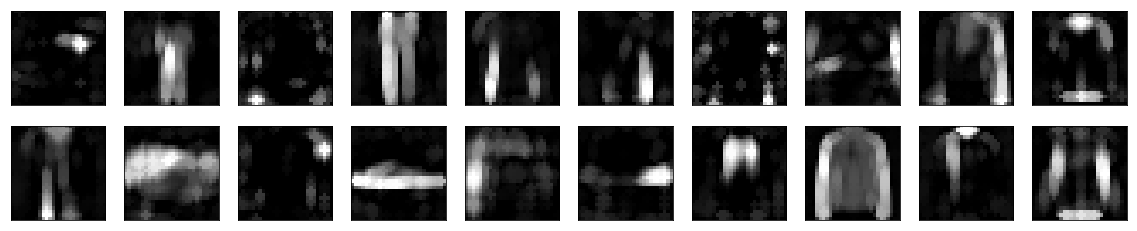

In [7]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

In [8]:
AE.best_linearSVM_classification_score(x_test, y_test, nb_values_C=30)

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.03290344562312668, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] .

[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.1s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   1.3s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.3s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.3s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.4s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.6s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=3.856620421163472, total=   1.6s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.4s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.4s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.5s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.4s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.5s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.5s
[CV] C=5.736152510448681 .............................................
[CV] .

[CV] ............................. C=18.873918221350976, total=   1.7s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.5s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.5s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.3s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.4s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.7s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   2.0s
[CV] C=18.873918221350976 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   2.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.0s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   2.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.7s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.7s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.8s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.8s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................... C=452.035365636025, total=   3.6s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   5.4s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   5.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   3.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   2.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   2.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   2.1s
[CV] C=452.035365636025 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 12.4min finished


(0.7852, 0.03263372488699383, {'C': 137.3823795883264})

## 3.6 Sparsity_weight = 0.05 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.0


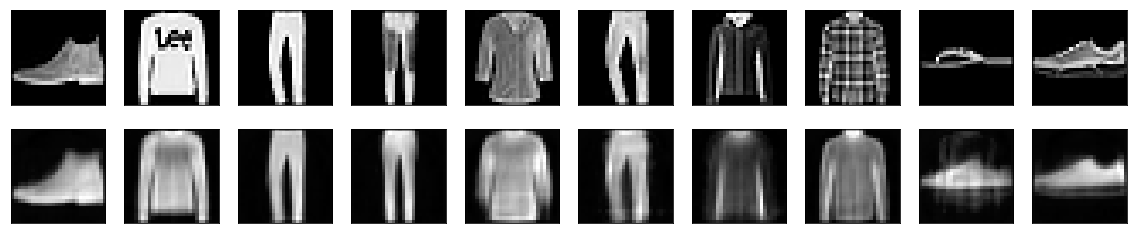

Histograms of the encodings - Sparsity (Hoyer):  0.0


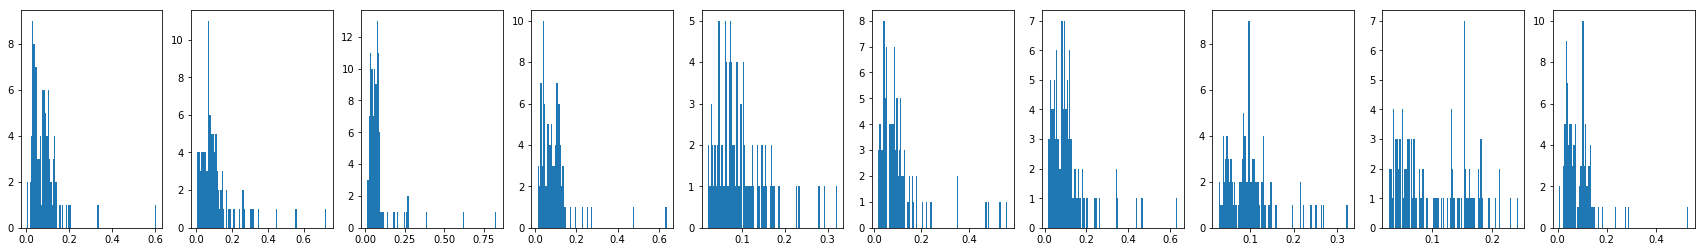

Atom images of the decoder


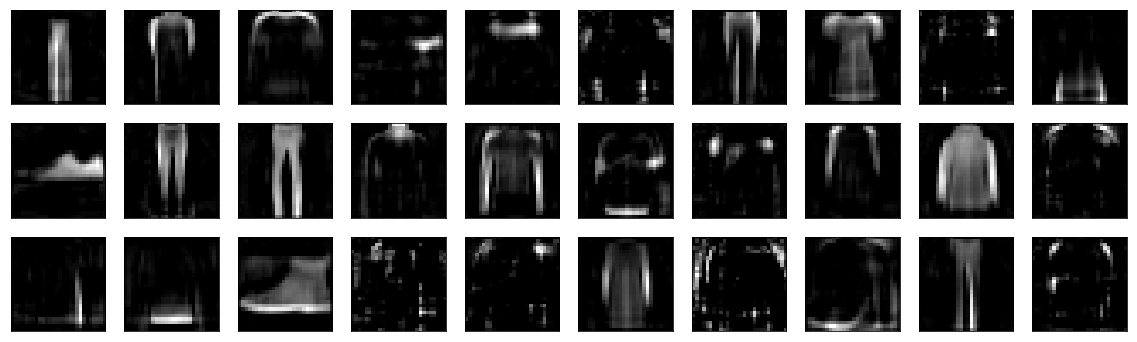

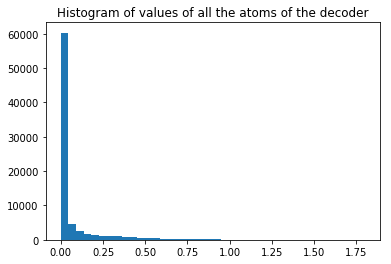

In [56]:
sp_o = 0.1
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


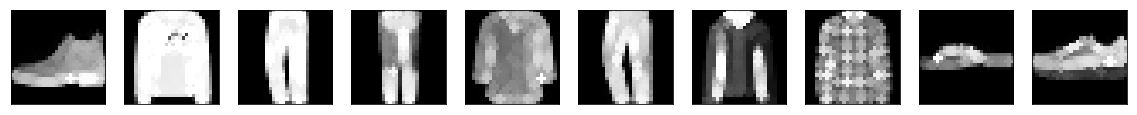

Dilatation of the reconstructions


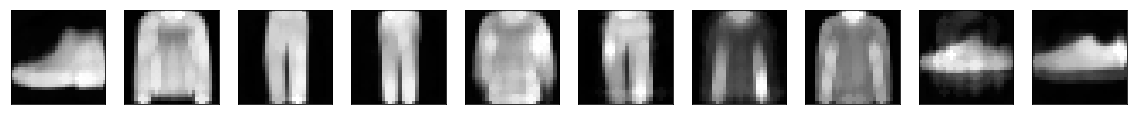

Original images and max-approximation to dilatation
Max-approx error to original:  0.0  - Max-approx error to reconstruction:  0.0


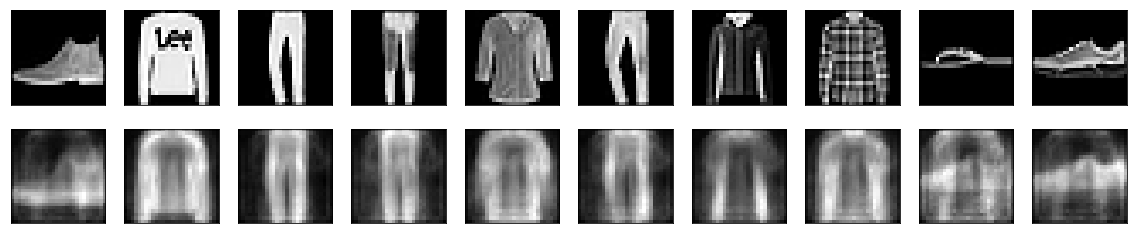

Dilated of the atom images of the decoder


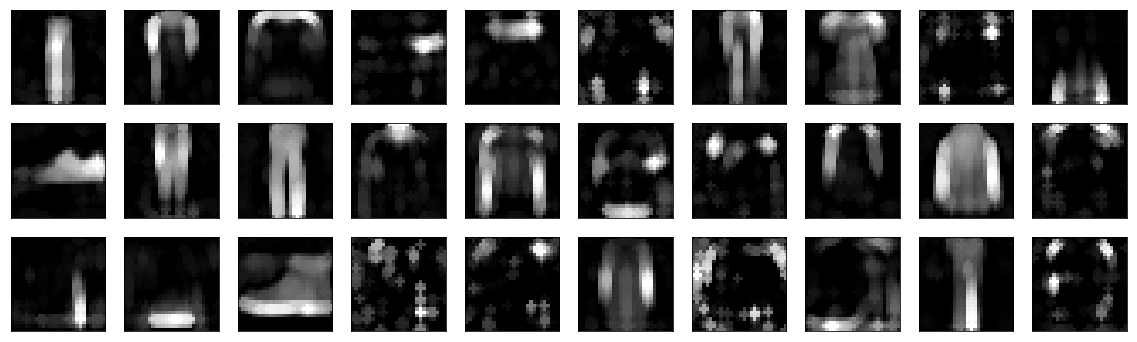

In [57]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.7 Sparsity_weight = 0.1 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.0


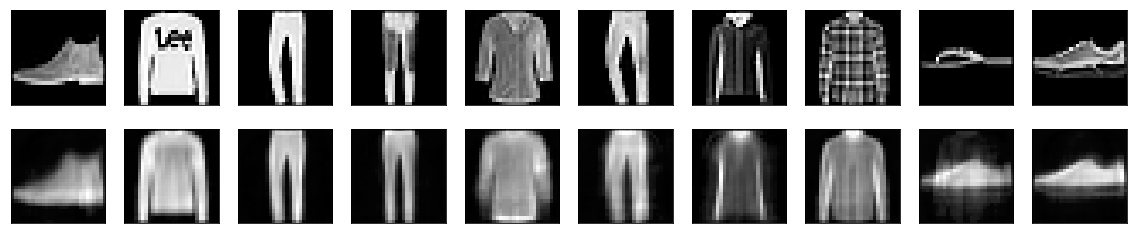

Histograms of the encodings - Sparsity (Hoyer):  0.0


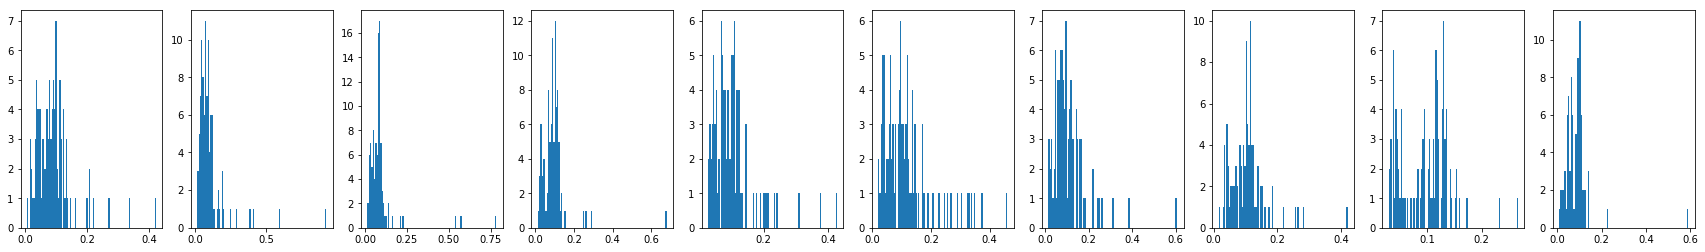

Atom images of the decoder


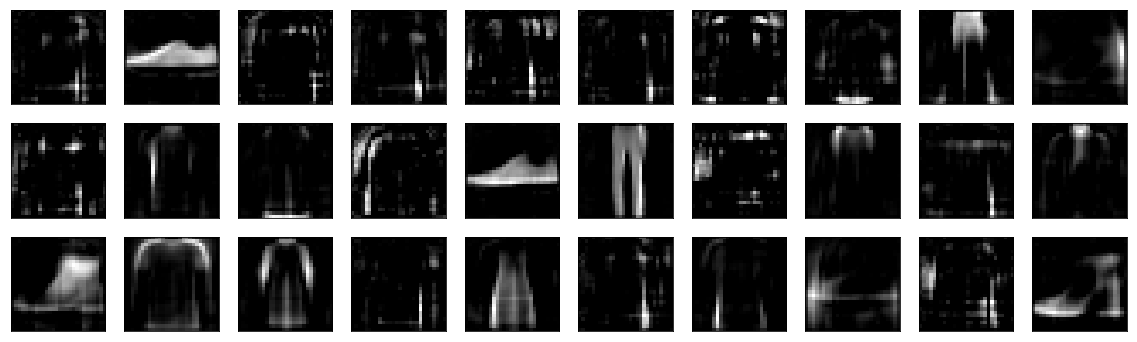

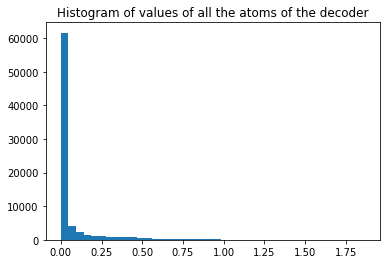

In [58]:
sp_o = 0.1
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


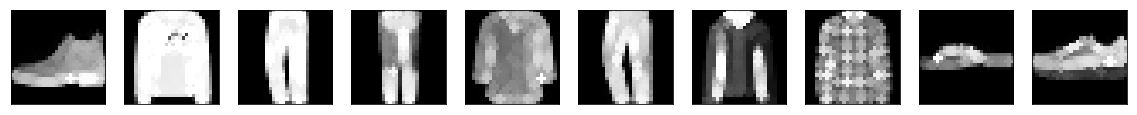

Dilatation of the reconstructions


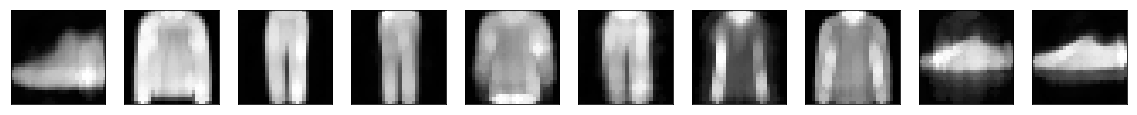

Original images and max-approximation to dilatation
Max-approx error to original:  0.0  - Max-approx error to reconstruction:  0.0


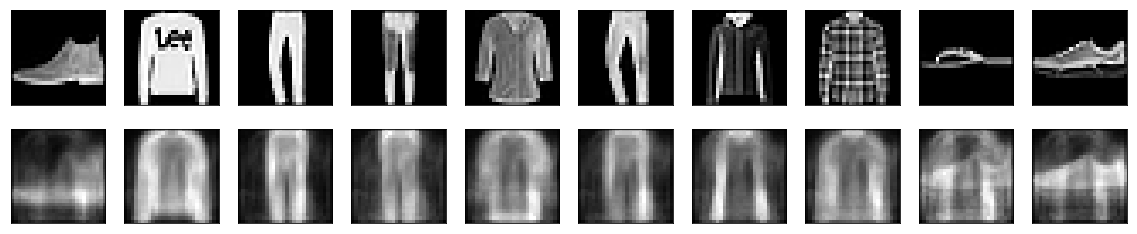

Dilated of the atom images of the decoder


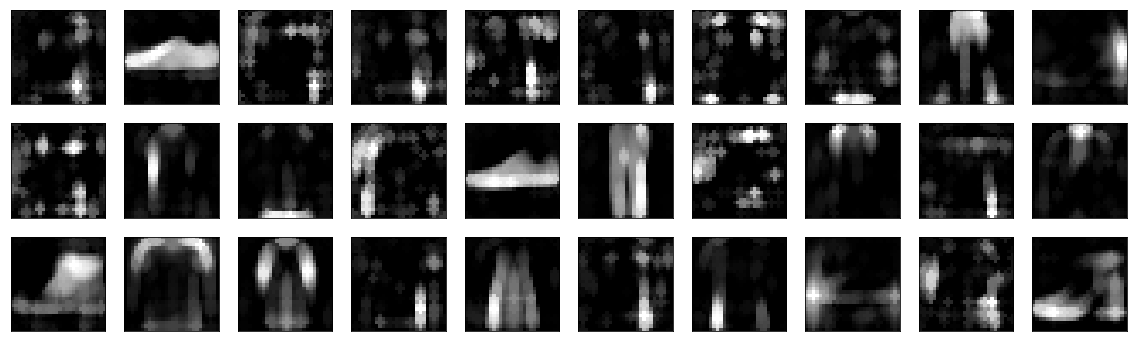

In [59]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.8 Sparsity_weight = 0.5 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.0


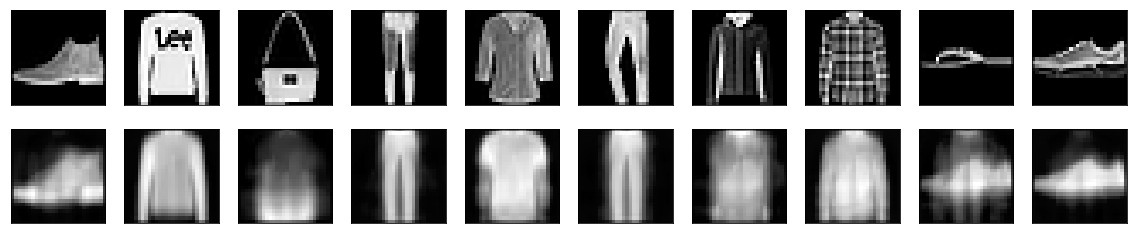

Histograms of the encodings - Sparsity (Hoyer):  0.0


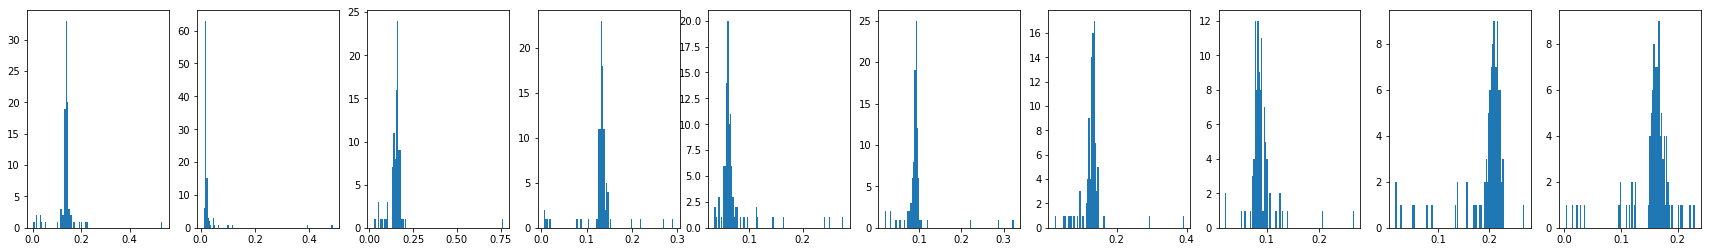

Atom images of the decoder


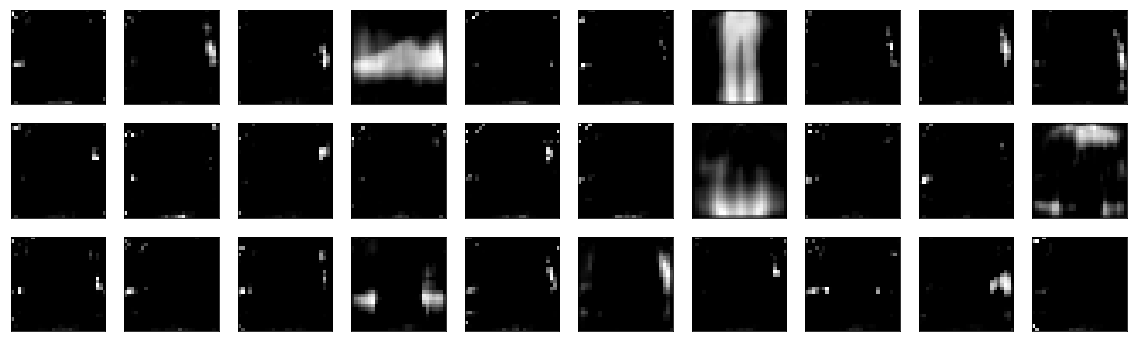

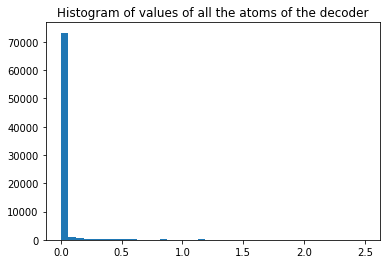

In [19]:
sp_o = 0.1
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


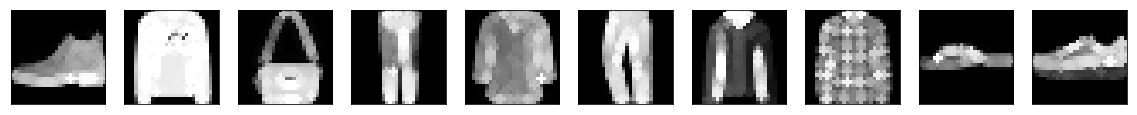

Dilatation of the reconstructions


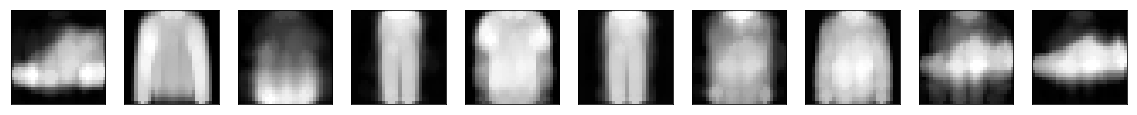

Original images and max-approximation to dilatation
Max-approx error to original:  0.040972486984729765  - Max-approx error to reconstruction:  0.013993068116903306


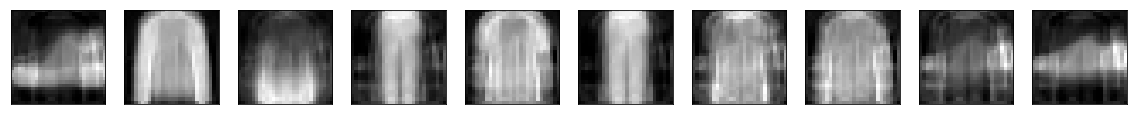

Dilated of the atom images of the decoder


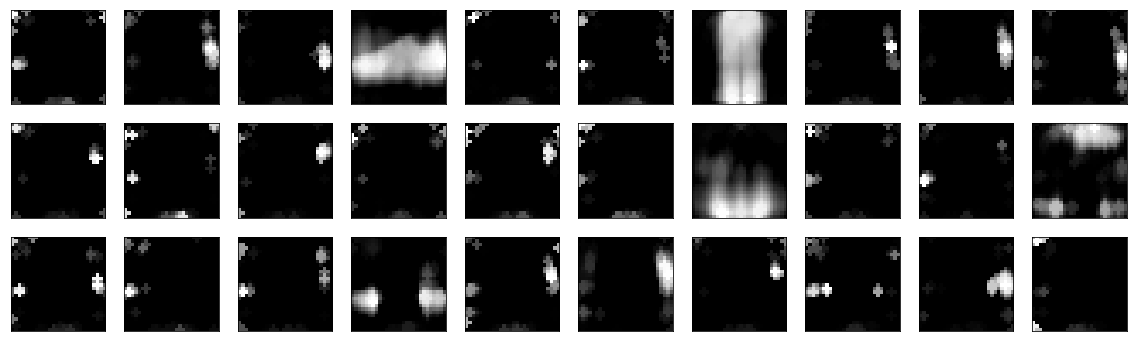

In [20]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 4. Sparsity_Objective = 0.2

## 4.1 Sparsity_weight = 0.0001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009525601725280285


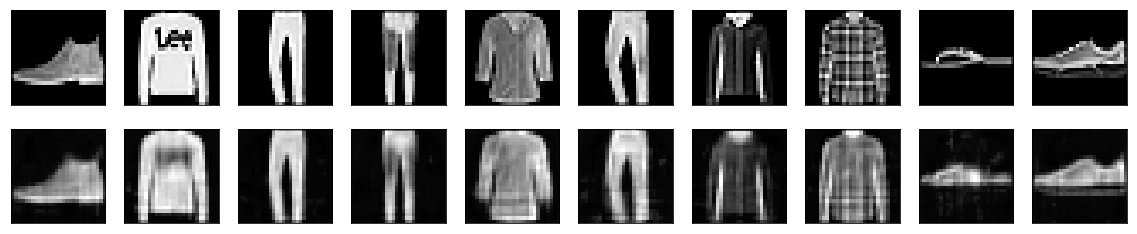

Histograms of the encodings - Sparsity (Hoyer):  0.19193150103092194


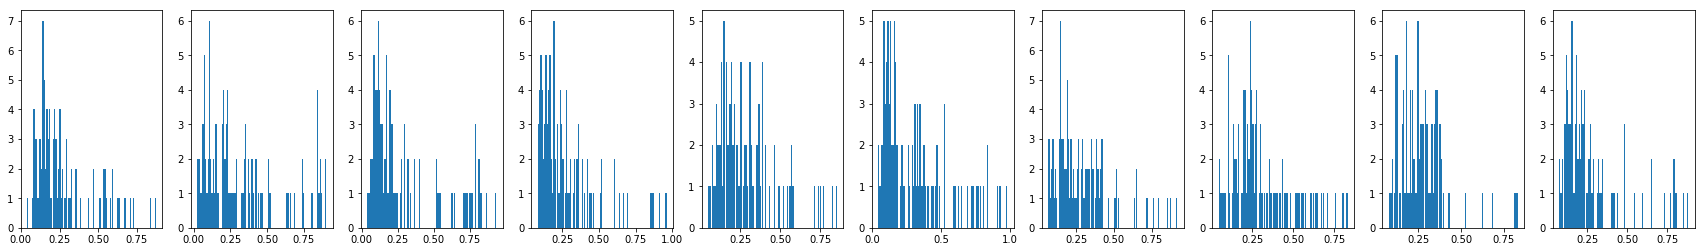

Atom images of the decoder


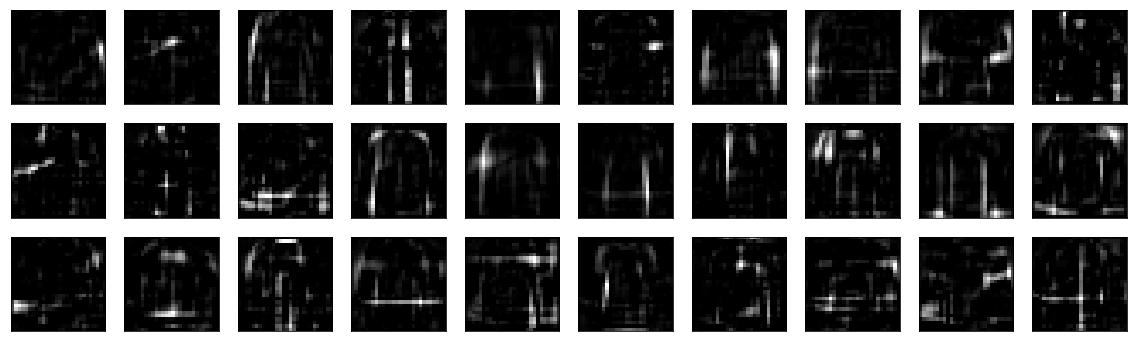

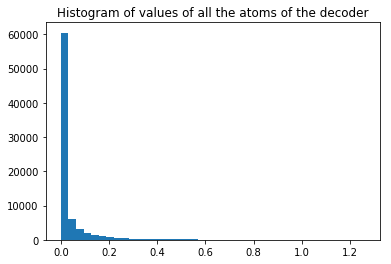

In [62]:
sp_o = 0.2
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


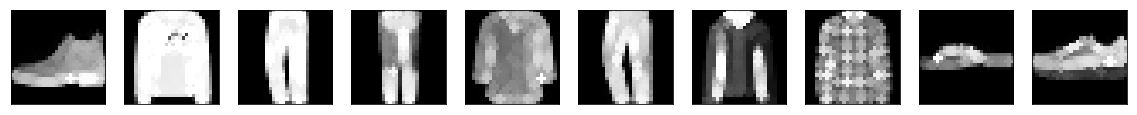

Dilatation of the reconstructions


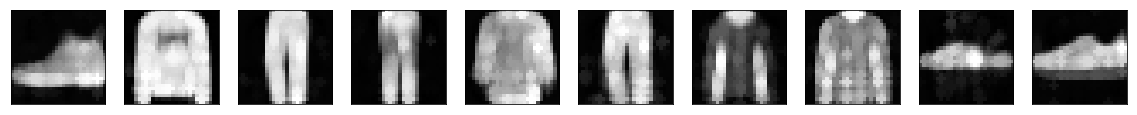

Original images and max-approximation to dilatation
Max-approx error to original:  1.9789746326446533  - Max-approx error to reconstruction:  2.0290227582931517


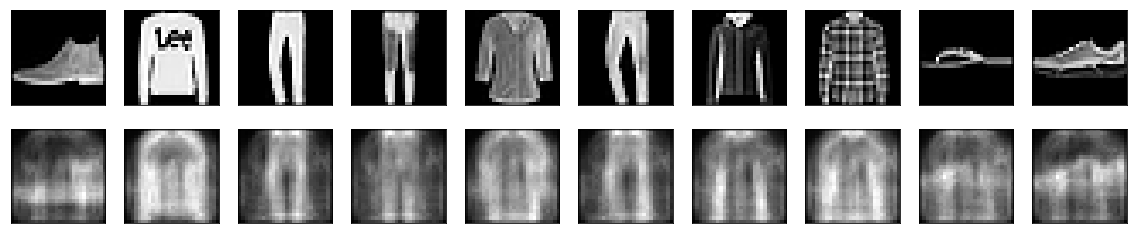

Dilated of the atom images of the decoder


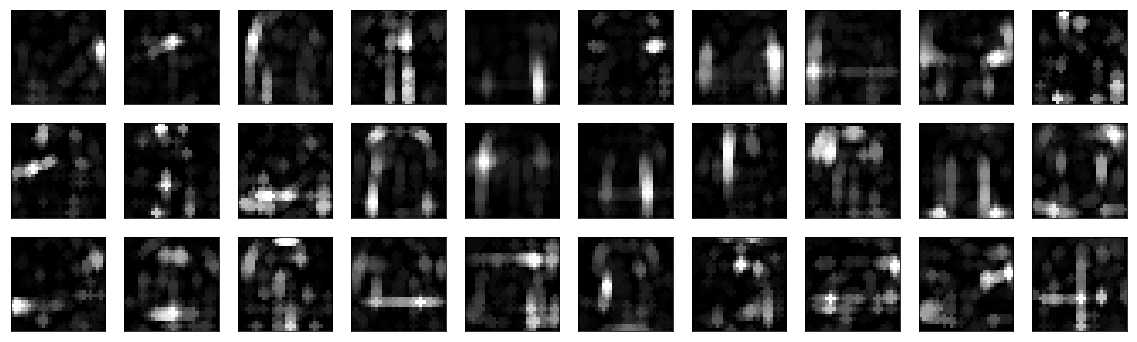

In [63]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.2 Sparsity_weight = 0.0005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.010152542589604855


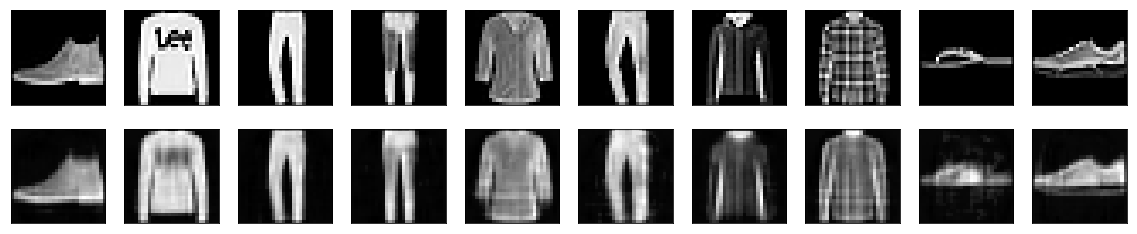

Histograms of the encodings - Sparsity (Hoyer):  0.2342495173215866


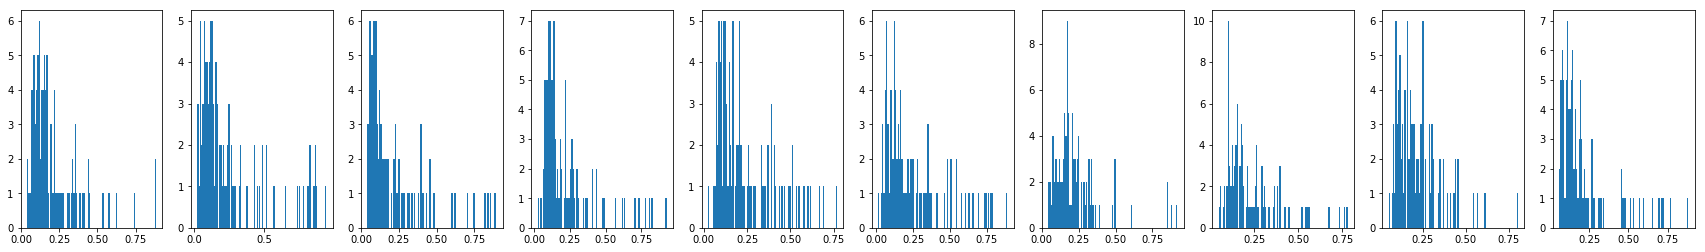

Atom images of the decoder


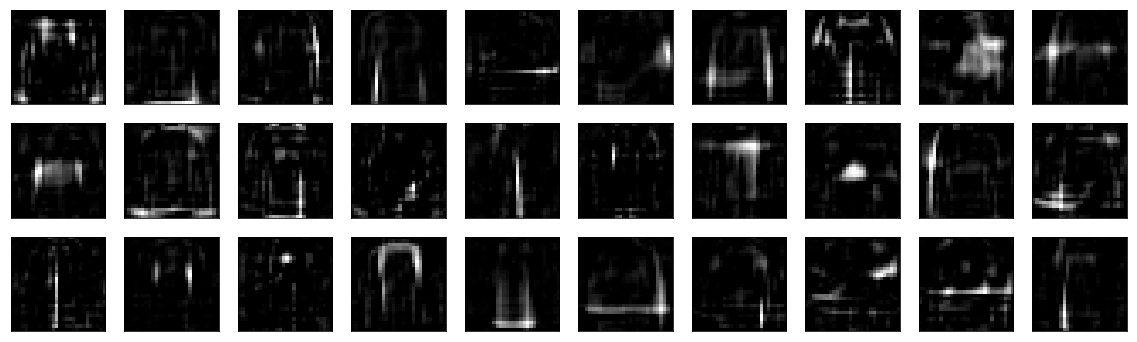

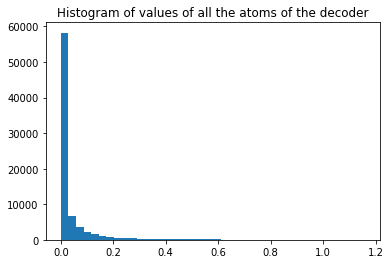

In [64]:
sp_o = 0.2
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


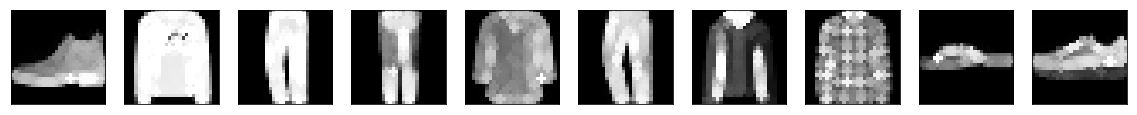

Dilatation of the reconstructions


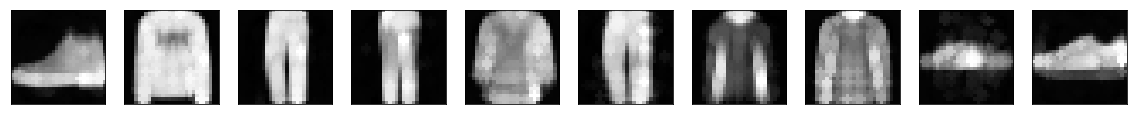

Original images and max-approximation to dilatation
Max-approx error to original:  1.415358462524414  - Max-approx error to reconstruction:  1.446767484664917


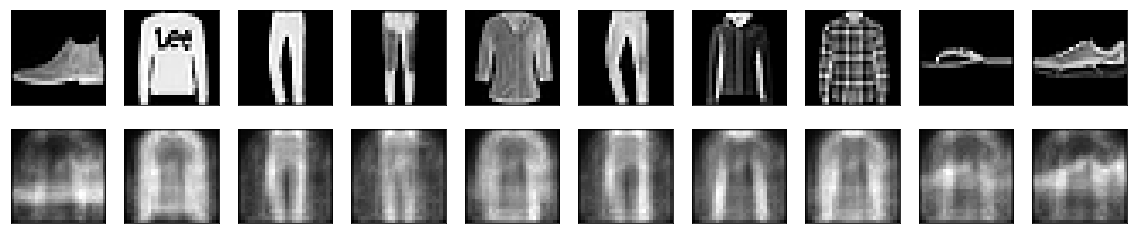

Dilated of the atom images of the decoder


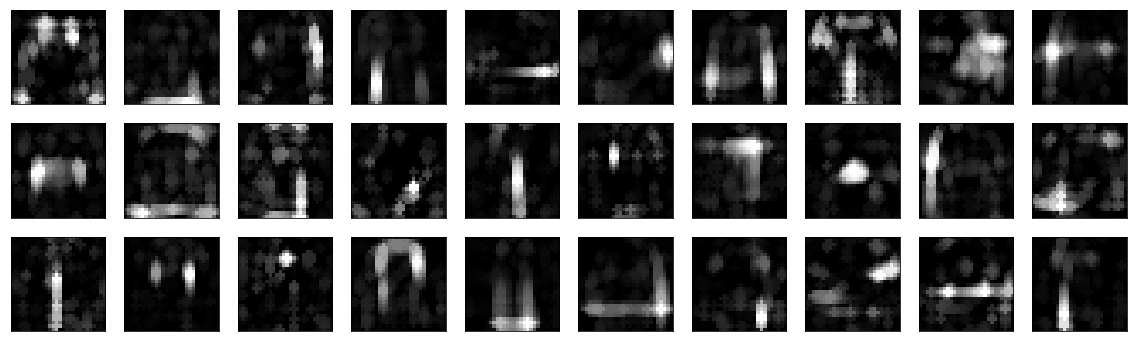

In [65]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.3 Sparsity_weight = 0.001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.010167393749952316


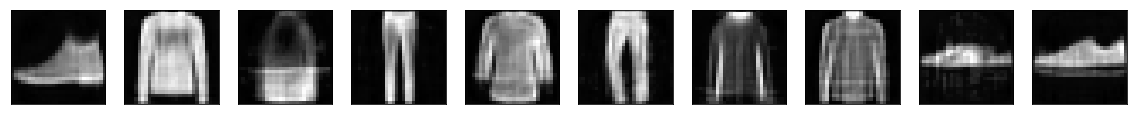

Histograms of the encodings - Sparsity (Hoyer):  0.2504695057868957


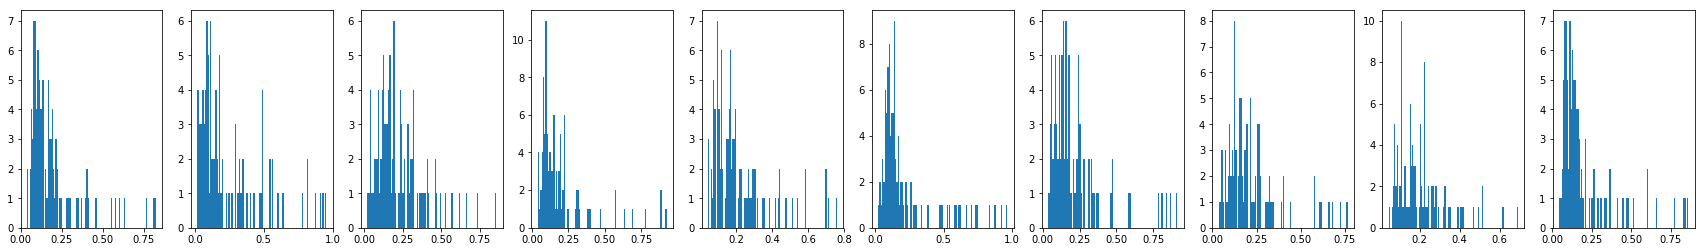

Atom images of the decoder


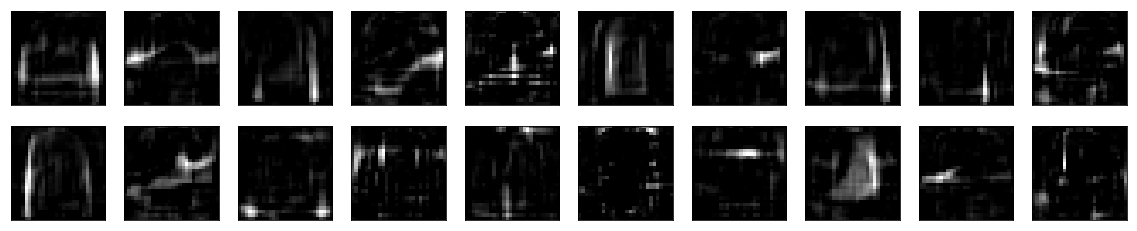

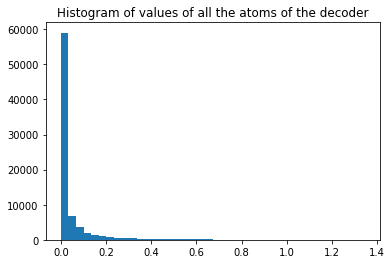

In [4]:
sp_o = 0.2
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


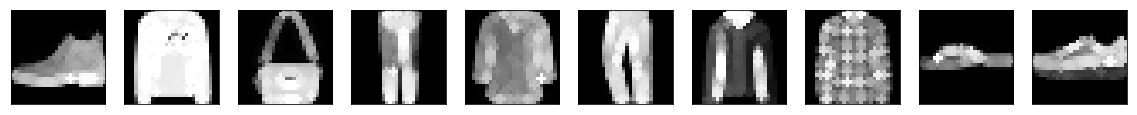

Dilatation of the reconstructions


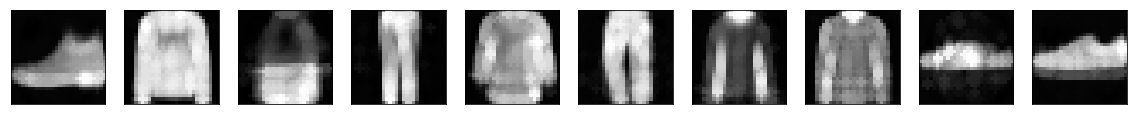

Original images and max-approximation to dilatation
Max-approx error to original:  1.1788829639434815  - Max-approx error to reconstruction:  1.212640919113159


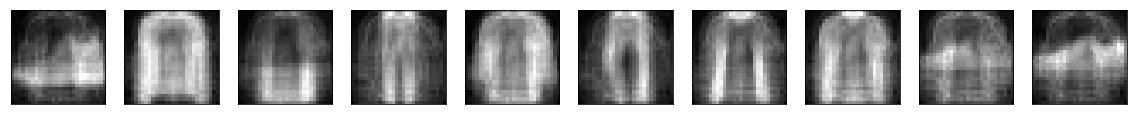

Dilated of the atom images of the decoder


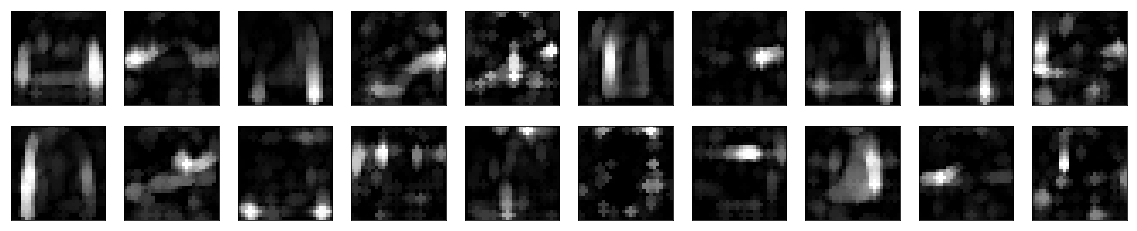

In [102]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

In [5]:
AE.best_linearSVM_classification_score(x_test, y_test, nb_values_C=30)

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........................................... C=0.01, total=   0.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.5s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.03290344562312668, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.4s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.7s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.3s
[CV] C=0.04893900918477494 ...........................................
[CV] .

[CV] ............................ C=0.16102620275609392, total=   1.1s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.1s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.1s
[CV] C=0.2395026619987486 ............................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.2s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.3s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.2s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=3.856620421163472, total=   1.3s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.3s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.3s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.3s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.3s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.3s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.3s
[CV] C=5.736152510448681 .............................................
[CV] .

[CV] ............................. C=18.873918221350976, total=   1.4s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.4s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.4s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.3s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.5s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.4s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.4s
[CV] C=18.873918221350976 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   1.4s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.4s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.4s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.3s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.4s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.3s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.4s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................... C=452.035365636025, total=   1.4s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.4s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.3s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.4s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.3s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.4s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.5s
[CV] C=452.035365636025 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  9.7min finished


(0.7812, 0.03881443030626625, {'C': 303.91953823132013})

## 4.4 Sparsity_weight = 0.005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.010304008470475674


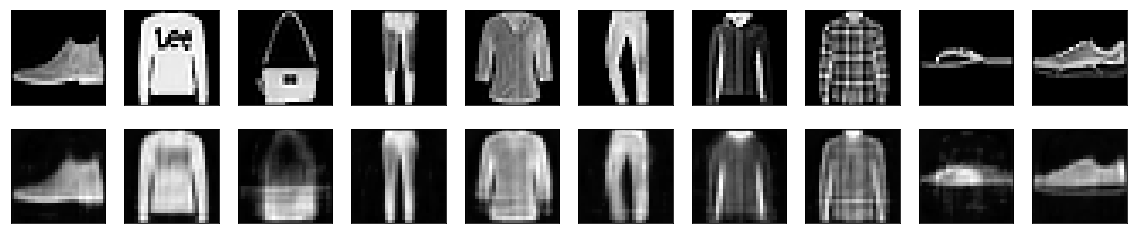

Histograms of the encodings - Sparsity (Hoyer):  0.24258606135845184


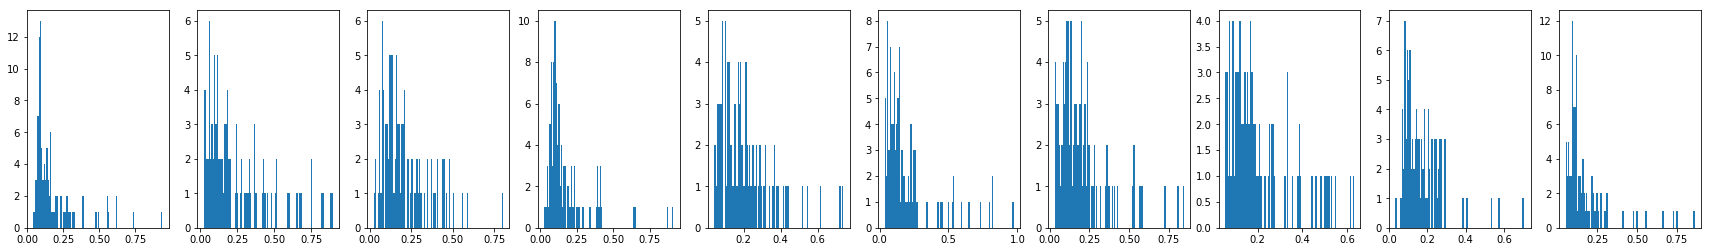

Atom images of the decoder


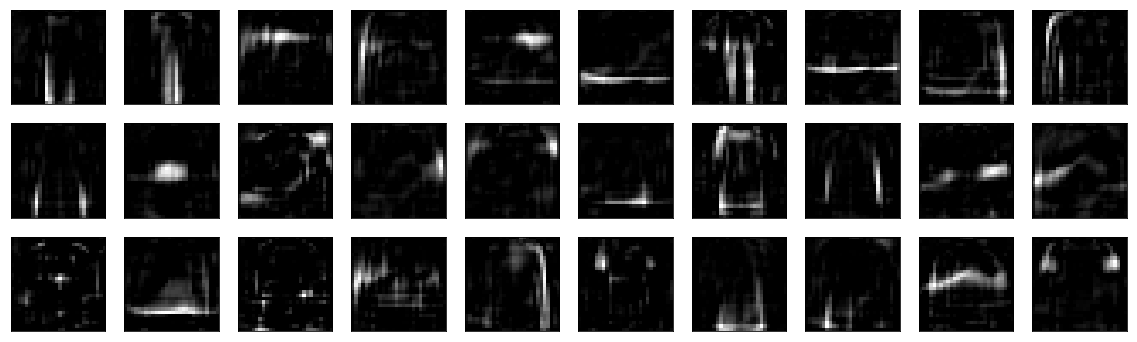

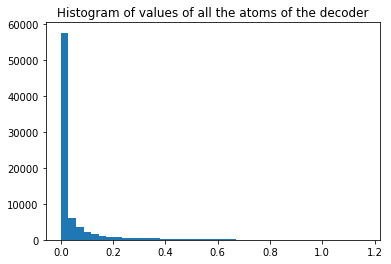

In [83]:
sp_o = 0.2
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


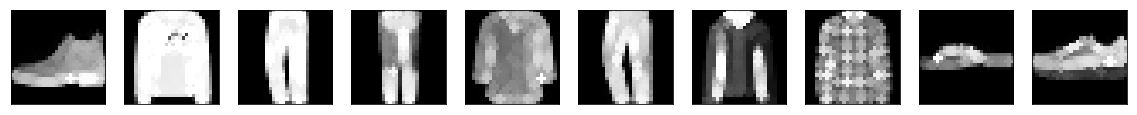

Dilatation of the reconstructions


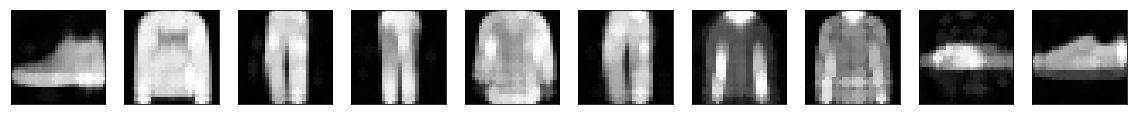

Original images and max-approximation to dilatation
Max-approx error to original:  1.0512951182365418  - Max-approx error to reconstruction:  1.084931243133545


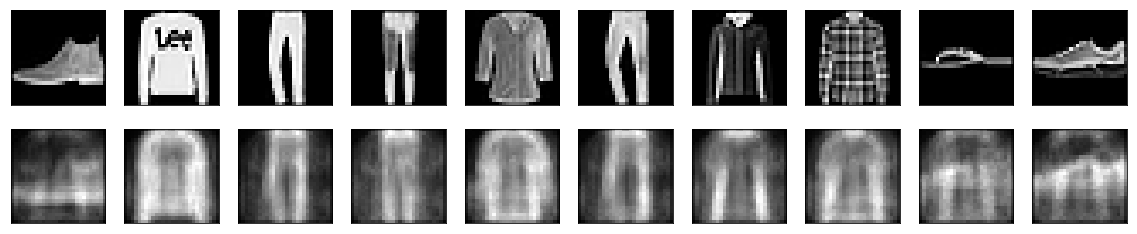

Dilated of the atom images of the decoder


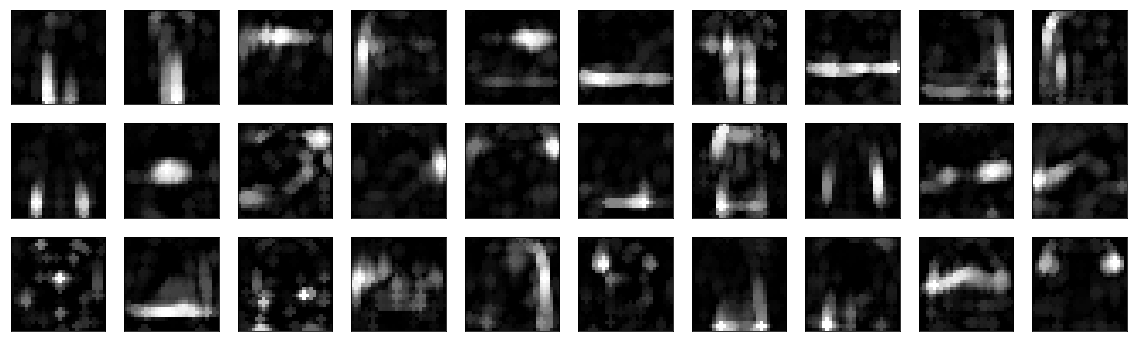

In [69]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.5 Sparsity_weight = 0.01 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.010226113757491112


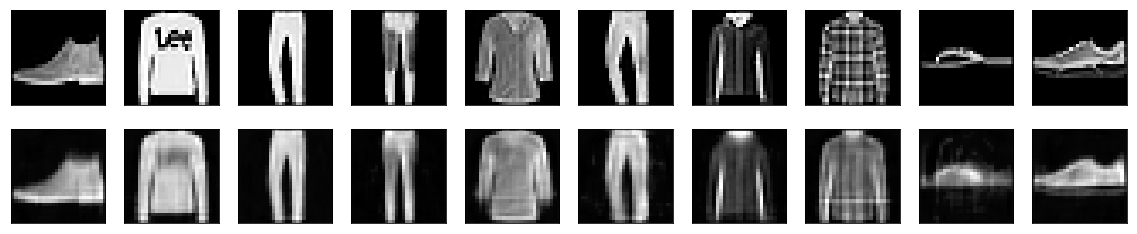

Histograms of the encodings - Sparsity (Hoyer):  0.2243933528661728


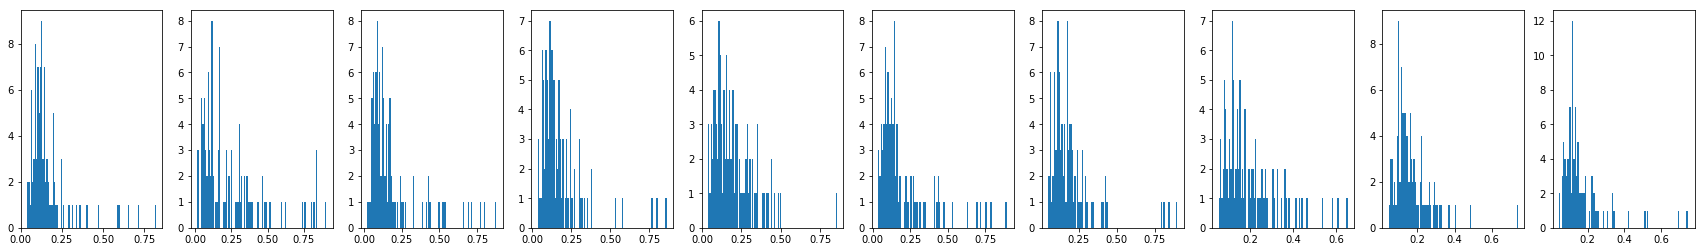

Atom images of the decoder


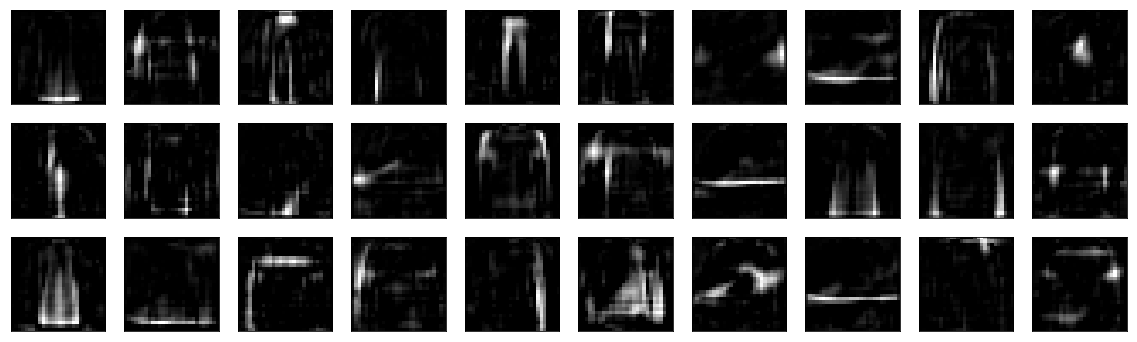

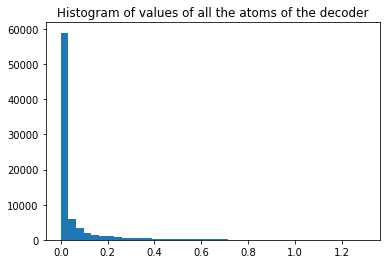

In [70]:
sp_o = 0.2
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


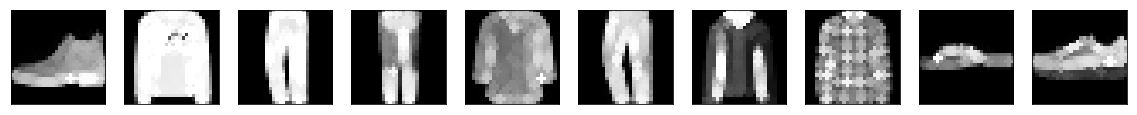

Dilatation of the reconstructions


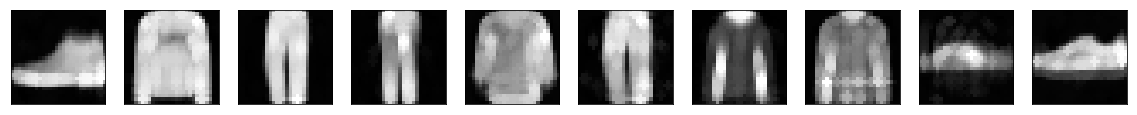

Original images and max-approximation to dilatation
Max-approx error to original:  1.0788195092201234  - Max-approx error to reconstruction:  1.1220529580116272


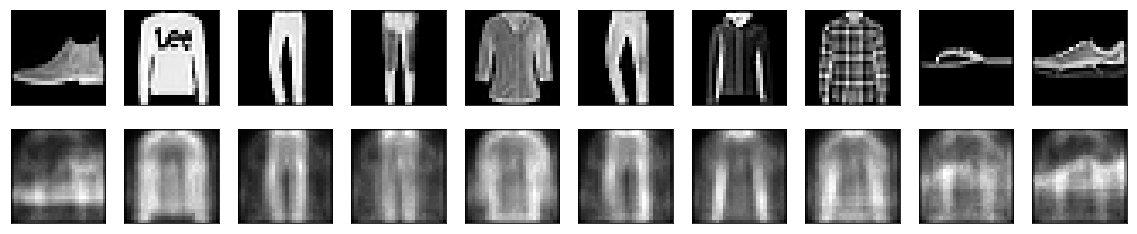

Dilated of the atom images of the decoder


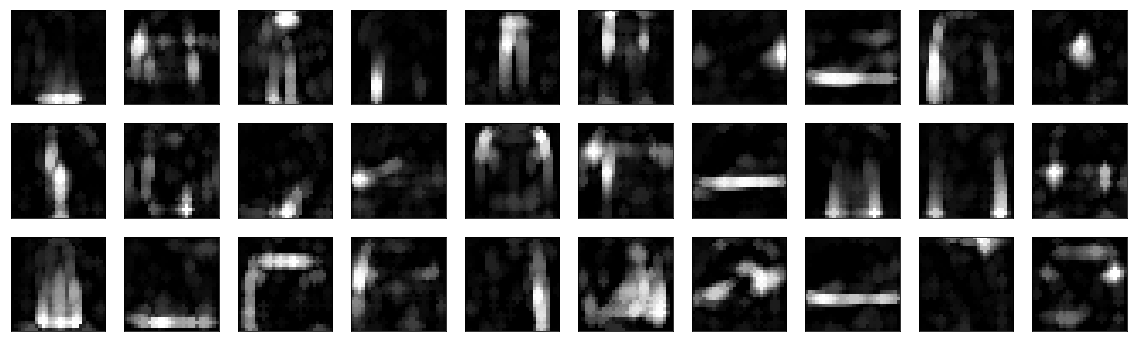

In [71]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.6 Sparsity_weight = 0.05 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.0


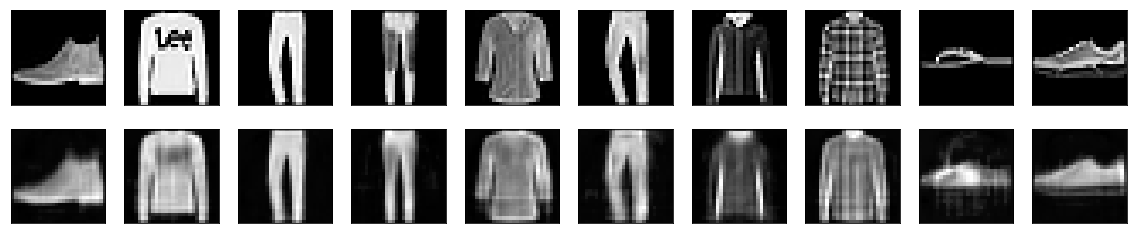

Histograms of the encodings - Sparsity (Hoyer):  0.0


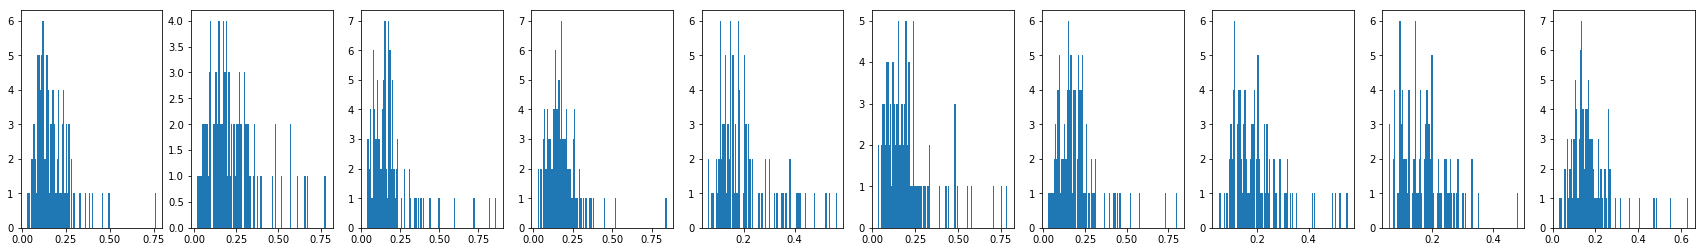

Atom images of the decoder


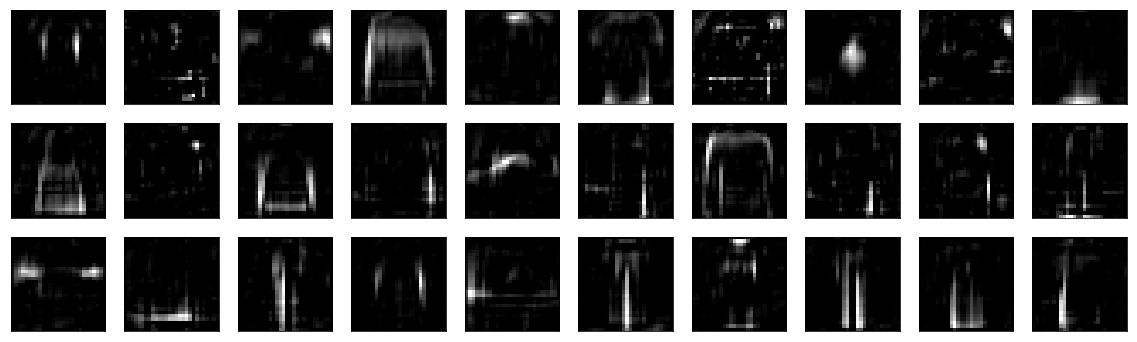

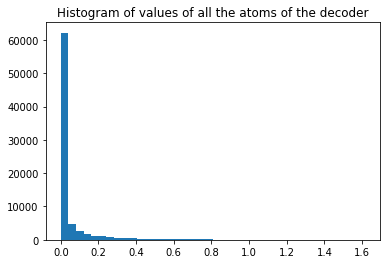

In [72]:
sp_o = 0.2
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


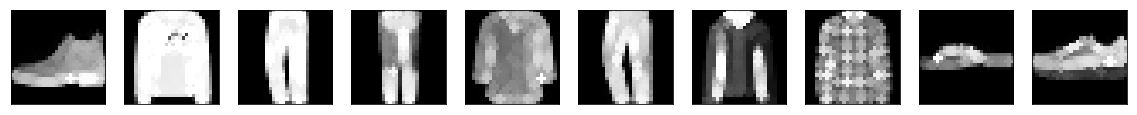

Dilatation of the reconstructions


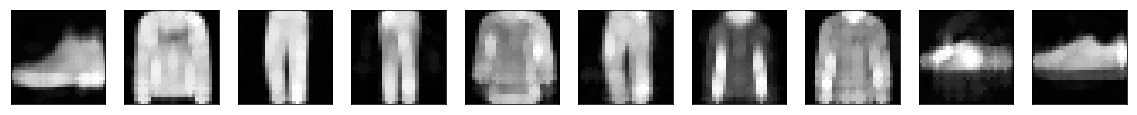

Original images and max-approximation to dilatation
Max-approx error to original:  0.0  - Max-approx error to reconstruction:  0.0


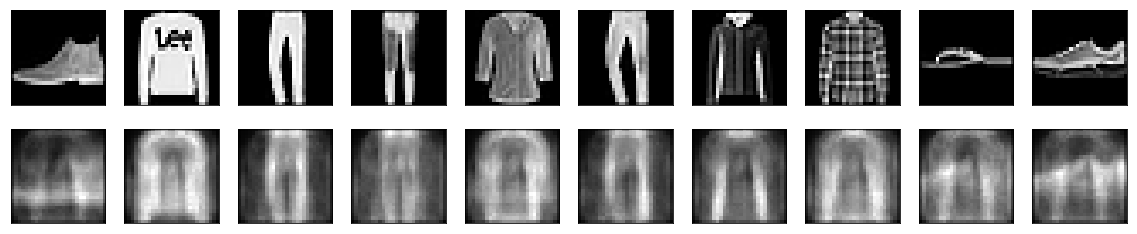

Dilated of the atom images of the decoder


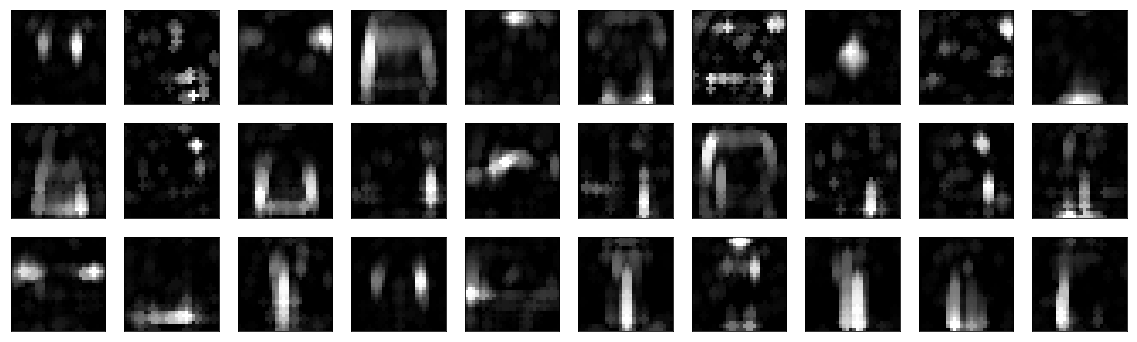

In [73]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.7 Sparsity_weight = 0.1 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.0


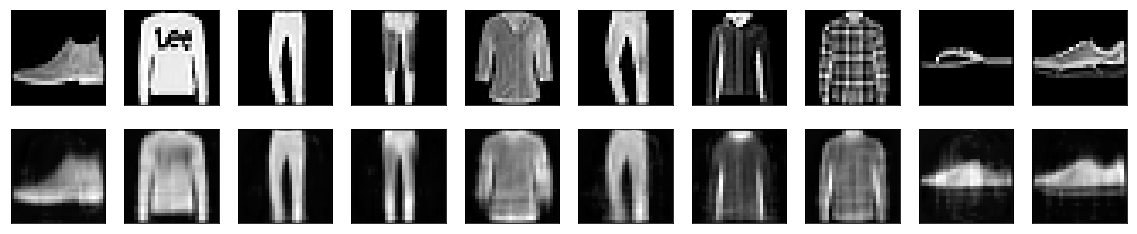

Histograms of the encodings - Sparsity (Hoyer):  0.0


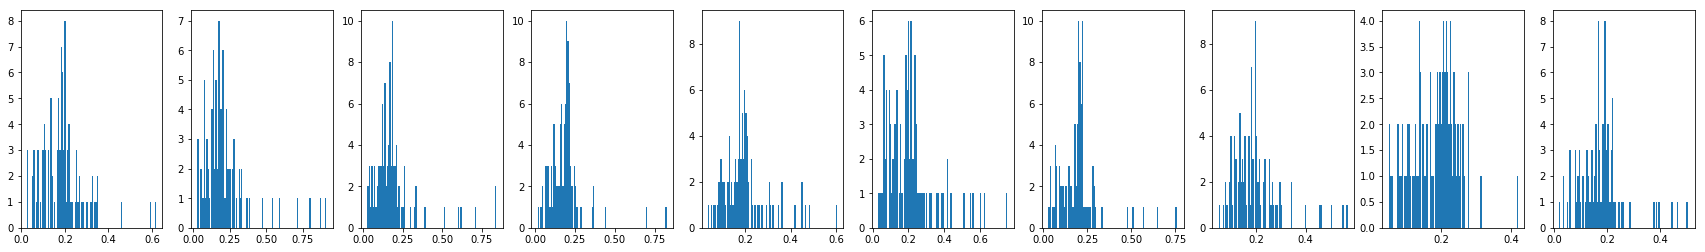

Atom images of the decoder


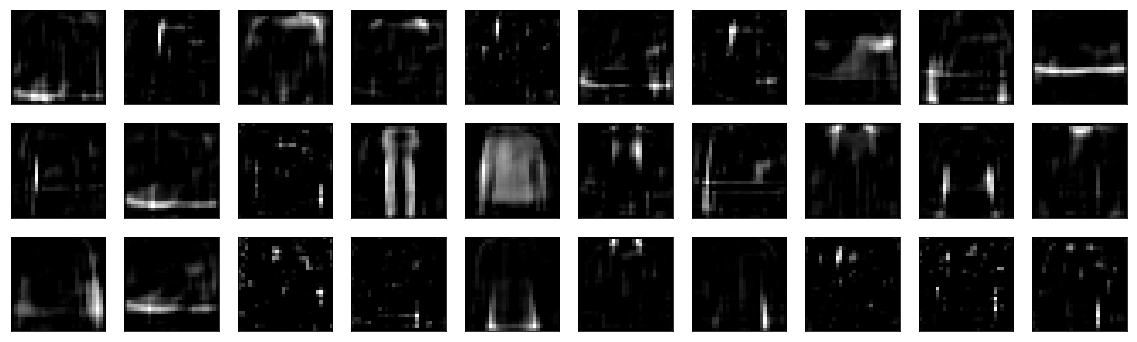

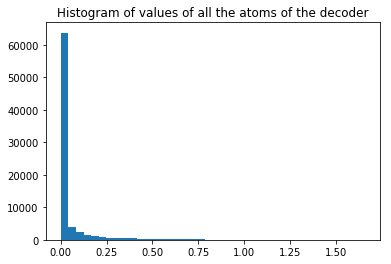

In [74]:
sp_o = 0.2
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


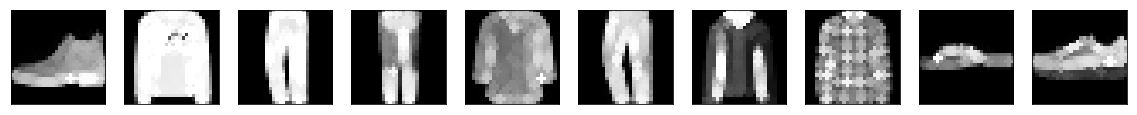

Dilatation of the reconstructions


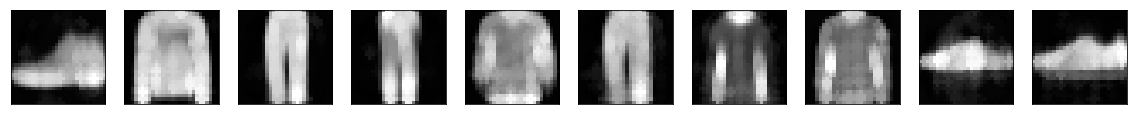

Original images and max-approximation to dilatation
Max-approx error to original:  0.0  - Max-approx error to reconstruction:  0.0


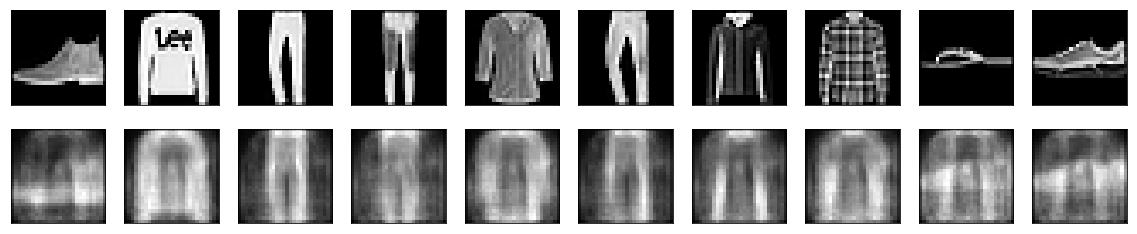

Dilated of the atom images of the decoder


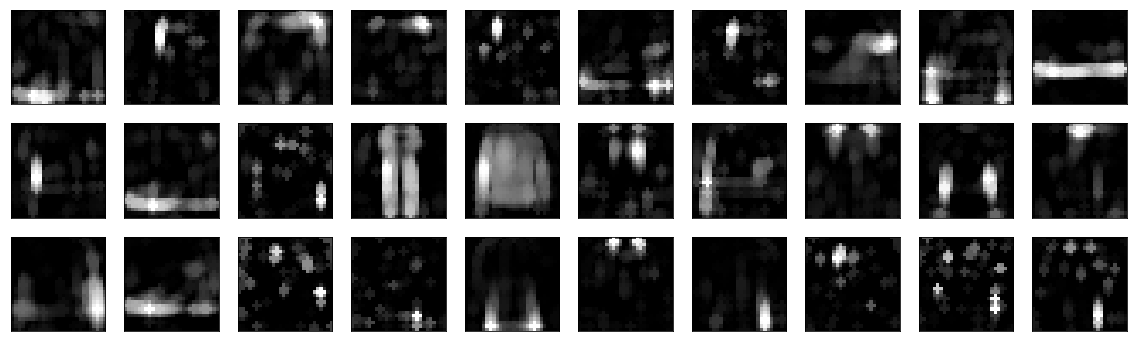

In [75]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.8 Sparsity_weight = 0.5 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.0


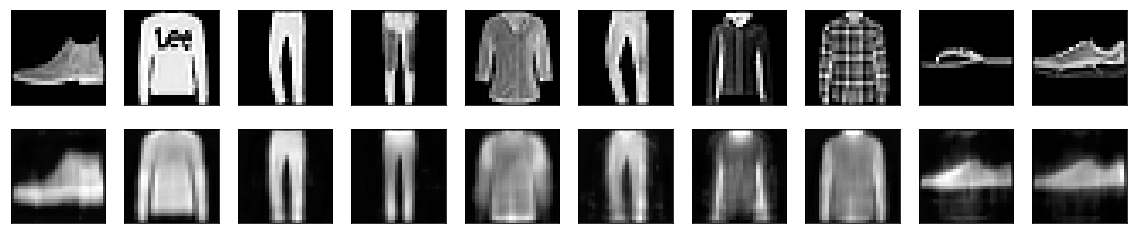

Histograms of the encodings - Sparsity (Hoyer):  0.0


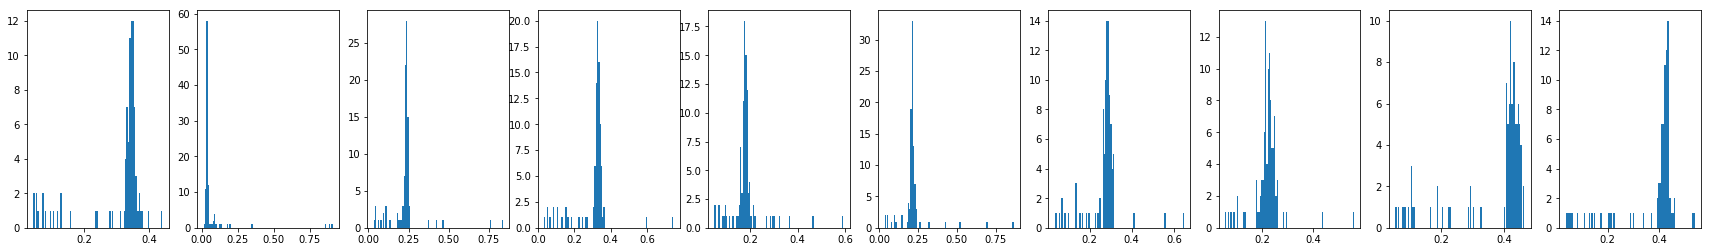

Atom images of the decoder


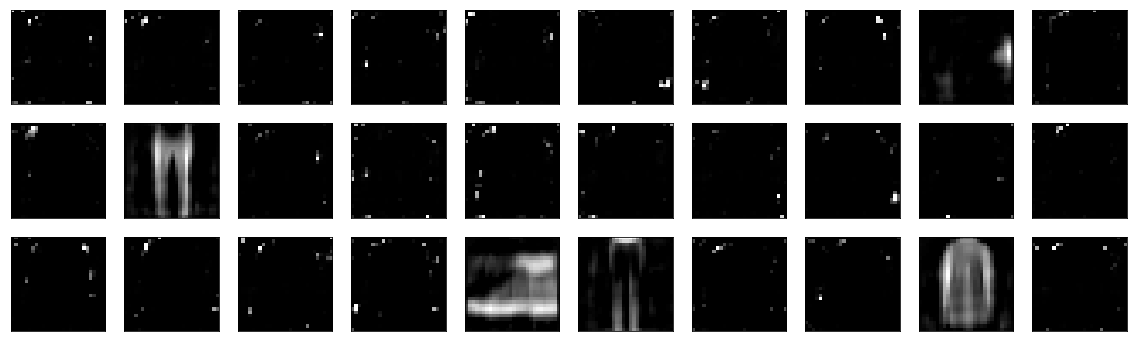

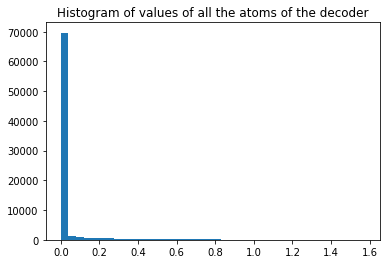

In [76]:
sp_o = 0.2
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_08_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


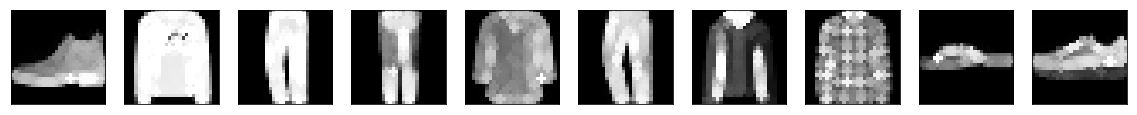

Dilatation of the reconstructions


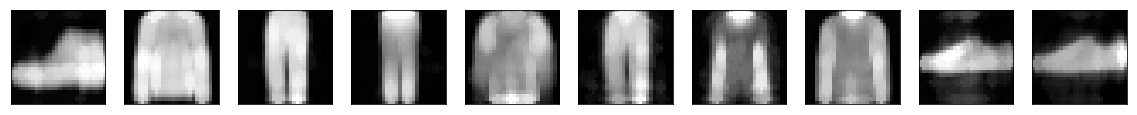

Original images and max-approximation to dilatation
Max-approx error to original:  0.0  - Max-approx error to reconstruction:  0.0


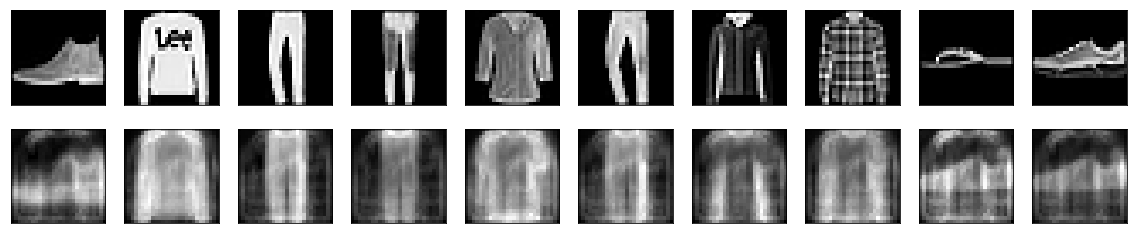

Dilated of the atom images of the decoder


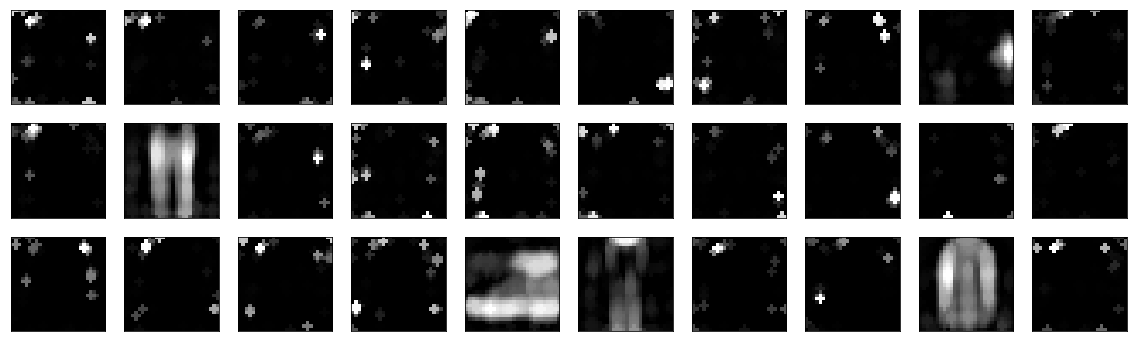

In [77]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)